In [320]:
import os
import fnmatch
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import lombscargle
import pandas as pd

data_path = "../data/"

In [309]:
# Photometry data files contain 5 columns: Hel.JD, I magnitude, magnitude error, seeing estimation (in pixels - 0.26"/pixel) and sky level

# save data as csv, merging OGLE III and IV if both are available
sources={}
dir_list = []

# search for photometry data in OGLE IV folder
for root, dirnames, filenames in os.walk(data_path+"/ogle4"):
    for filename in fnmatch.filter(filenames, "phot.dat"):
        source_name = root.split("/")[-1]
        lc_path_4 = os.path.join(root, filename)
        lc_path_3 = os.path.join(root.replace("ogle4", "ogle3"), filename)
        try: # try to merge OGLE III and IV data
            ogle3 = np.loadtxt(lc_path_3, usecols=(0,1,2))
            ogle4 = np.loadtxt(lc_path_4, usecols=(0,1,2))
            data = np.vstack((ogle3, ogle4))
            sources[root.split("/")[-1]] = "{} measurements, start: {} end: {}".format(len(data), data[0][0]-2450000,data[-1][0]-2450000)
            np.savetxt(data_path+"/ogle_merged/{}.csv".format(source_name), data, delimiter=",")
            dir_list.append(source_name)
        except: # if merging doesn't work, save only OGLE IV
            ogle4 = np.loadtxt(lc_path_4, usecols=(0,1,2))
            sources[root.split("/")[-1]] = "{} measurements, start: {} end: {}".format(len(data), data[0][0]-2450000,data[-1][0]-2450000)
            np.savetxt(data_path+"/ogle_merged/{}.csv".format(source_name), ogle4, delimiter=",")
            dir_list.append(source_name)

# save any OGLE III data that does not have an OGLE IV counterpart
for root, dirnames, filenames in os.walk(data_path+"/ogle3"):
    for filename in fnmatch.filter(filenames, "phot.dat"):
        source_name = root.split("/")[-1]
        if source_name not in dir_list:
            lc_path_3 = os.path.join(root, filename)
            ogle3 = np.loadtxt(lc_path_3, usecols=(0,1,2))
            sources[root.split("/")[-1]] = "{} measurements, start: {} end: {}".format(len(data), data[0][0]-2450000,data[-1][0]-2450000)
            np.savetxt(data_path+"/ogle_merged/{}.csv".format(source_name), ogle3, delimiter=",")
            dir_list.append(source_name)

# Get orbital periods

In [378]:
# load Mehtap's table of info for SMC objects with confirmed status
source_info = pd.read_csv("../SMC_confirmed.csv")

# data file names matching sources from Mehtap's table
ordered_file_names = [ 'sxp2.37.csv','','sxp3.34.csv','','sxp6.85.csv' ,'sxp7.78.csv', 'sxp8.80.csv', 'sxp9.13.csv','sxp11.5.csv', 'sxp15.3.csv',
                     '', 'sxp25.5.csv','sxp31.0.csv', 'sxp46.6.csv', 'sxp59.0.csv','sxp65.8.csv', 'sxp74.7.csv','sxp82.4.csv','sxp91.1.csv', 'sxp138.csv', 'sxp140.csv','',
                      '',  'sxp172.csv',  '','sxp214.csv','sxp264.csv', '', 'sxp293.csv', 'sxp323.csv','','sxp455.csv', 'sxp504.csv', 'sxp565.csv',
                      'sxp701.csv', 'sxp756.csv', 'sxp967.csv','sxp1062.csv', 'sxp1323.csv',]

# build data frame with object name, orbital period and data file name
names_period = source_info[["Object", 'P_orb (d)','P_orb (d) II']]
names_period = names_period.join(pd.DataFrame({"file": ordered_file_names}))

In [379]:
names_period

Object  P_orb (d) P_orb (d) II         file
0        SXP2.37     18.600            0  sxp2.37.csv
1        SXP2.76     82.400            0             
2        SXP3.34     10.720            0  sxp3.34.csv
3        SXP5.05     17.200            0             
4        SXP6.85     21.900            0  sxp6.85.csv
5        SXP7.78     44.900            0  sxp7.78.csv
6   SXP8.80-8.88     28.500            0  sxp8.80.csv
7        SXP9.13     77.200            0  sxp9.13.csv
8        SXP11.5     36.300            0  sxp11.5.csv
9        SXP15.3     74.300            0  sxp15.3.csv
10       SXP22.1     75.970            0             
11       SXP25.5     22.500            0  sxp25.5.csv
12       SXP31.0     90.500            0  sxp31.0.csv
13       SXP46.6    137.360     (143.29)  sxp46.6.csv
14       SXP59.0     62.150            0  sxp59.0.csv
15       SXP65.8    110.600            0  sxp65.8.csv
16       SXP74.7     33.400            0  sxp74.7.csv
17       SXP82.4    362.300            0  sxp82.4.csv
18  SXP89.0&91.1     88.370         88.4  sxp91.1.csv
19        SXP138    125.100            0   sxp138.csv
20        SXP140    197.000            0   sxp140.csv
21        SXP153    100.300            0             
22        SXP169     68.600            0             
23        SXP172     67.900            0   sxp172.csv
24       SXP202A     71.900            0             
25        SXP214     29.900            0   sxp214.csv
26        SXP264     49.200            0   sxp264.csv
27        SXP280    127.500            0             
28        SXP293     59.726      (59.62)   sxp293.csv
29        SXP323    116.600            0   sxp323.csv
30        SXP343     94.400            0             
31        SXP455     75.000            0   sxp455.csv
32        SXP504    272.000            0   sxp504.csv
33        SXP565    152.400            0   sxp565.csv
34        SXP701    412.000            0   sxp701.csv
35        SXP756    393.100          390   sxp756.csv
36        SXP967    101.900            0   sxp967.csv
37       SXP1062    668.000        (656)  sxp1062.csv
38       SXP1323     26.188            0  sxp1323.csv

Source: SXP2.37 prophet model Period: 18.6


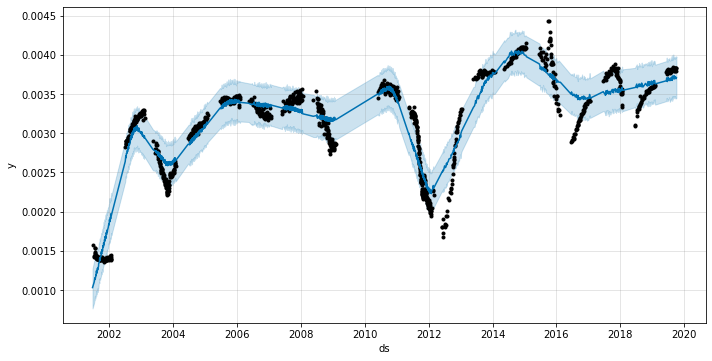

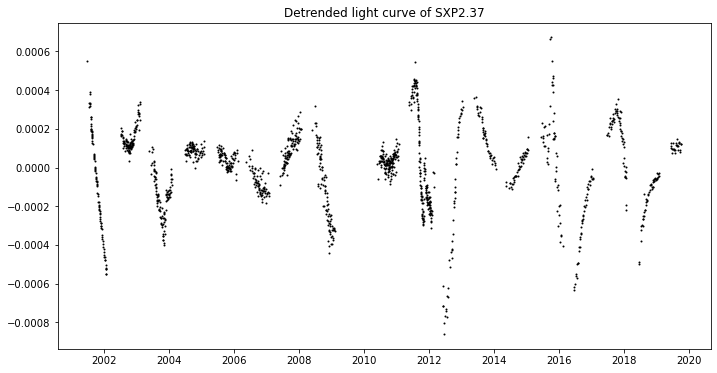

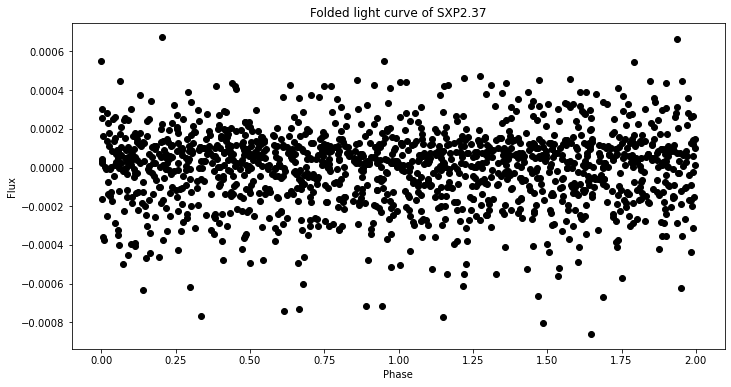

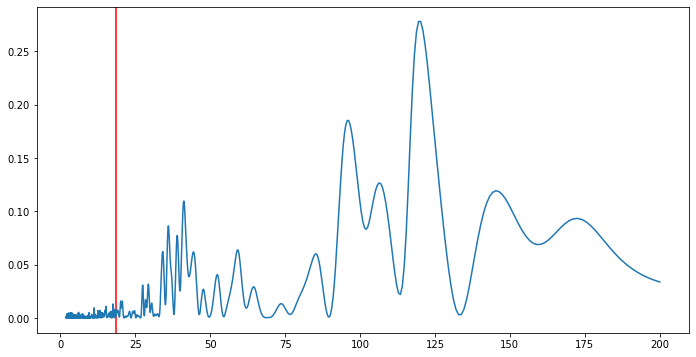

Source: SXP3.34 prophet model Period: 10.72


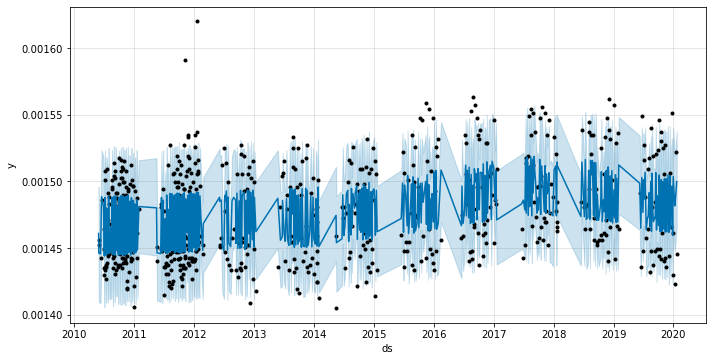

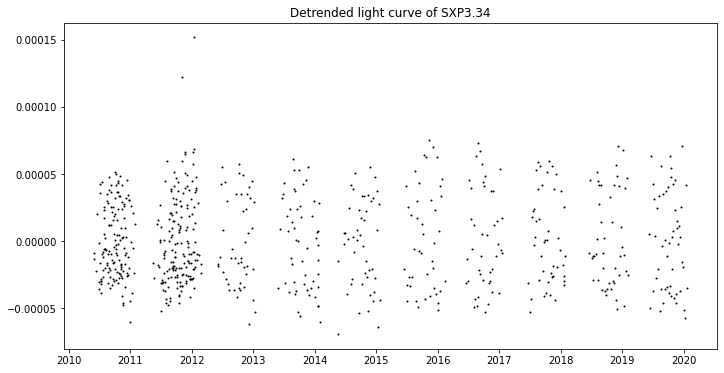

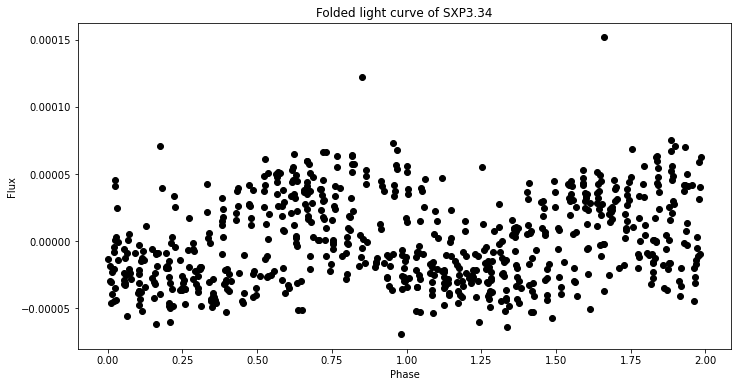

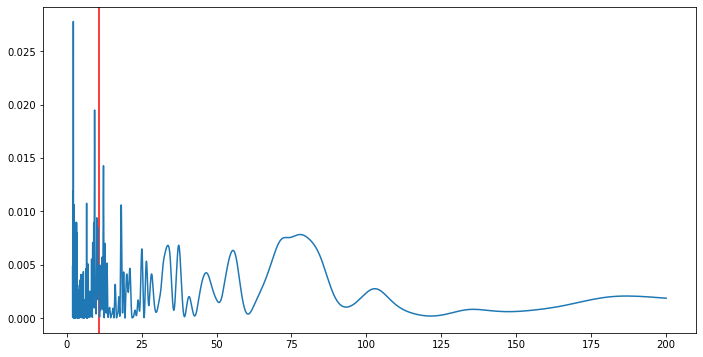

Source: SXP6.85 prophet model Period: 21.9


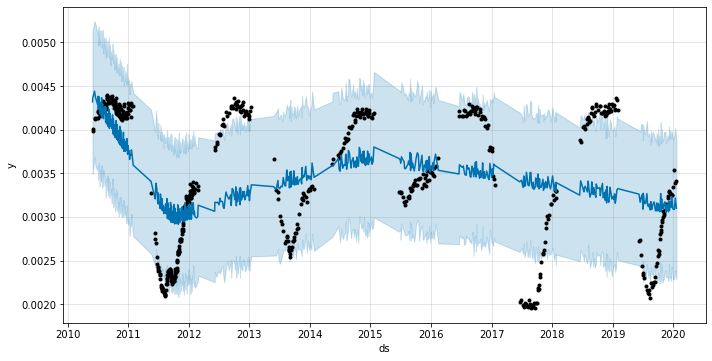

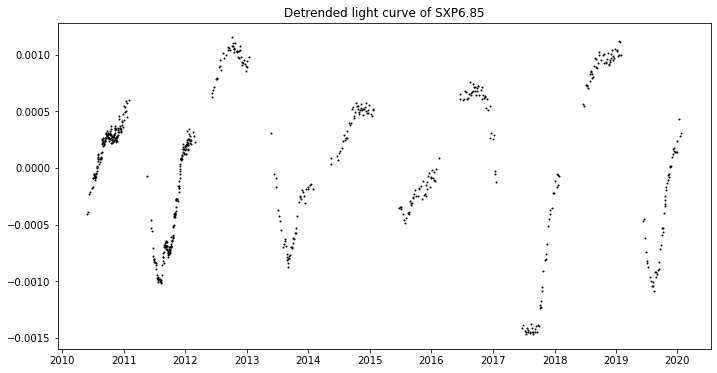

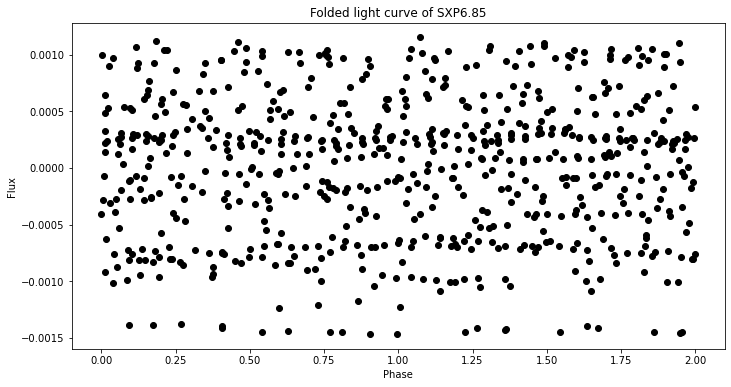

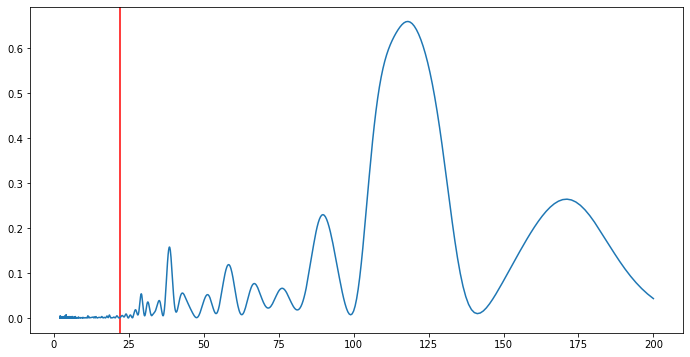

Source: SXP7.78 prophet model Period: 44.9


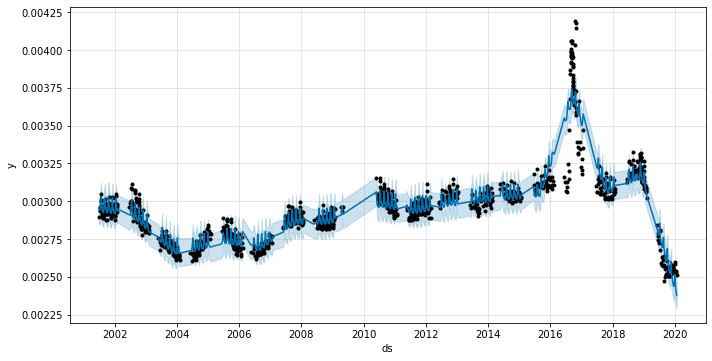

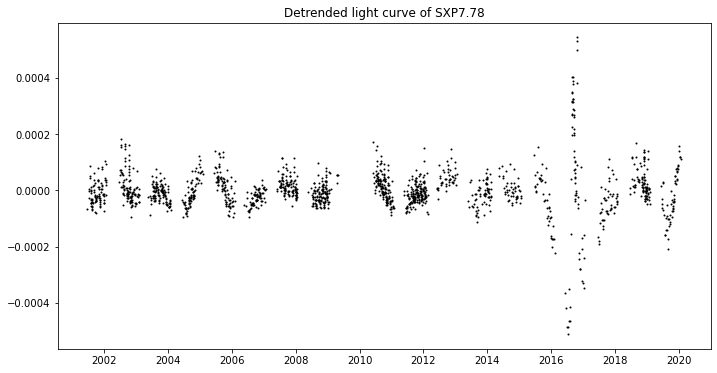

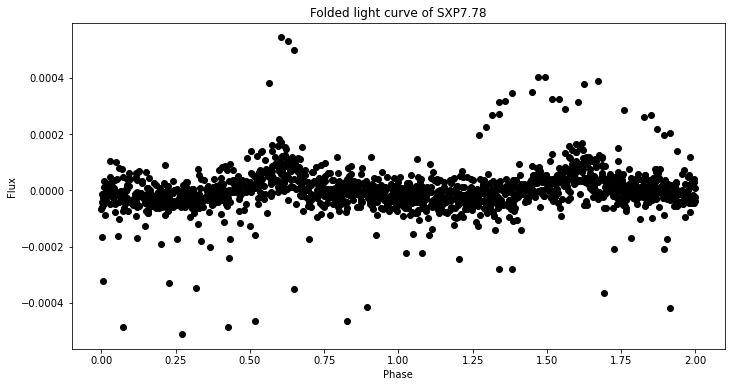

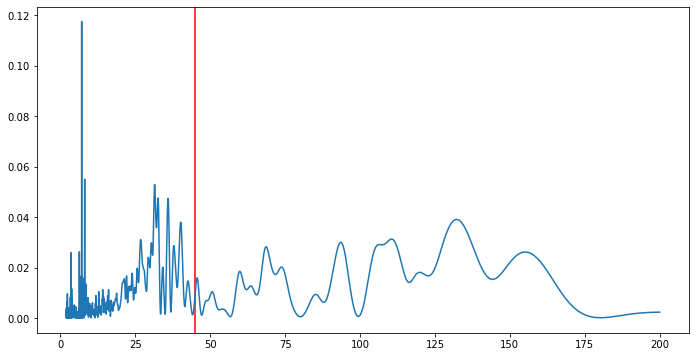

Source: SXP8.80-8.88 prophet model Period: 28.5


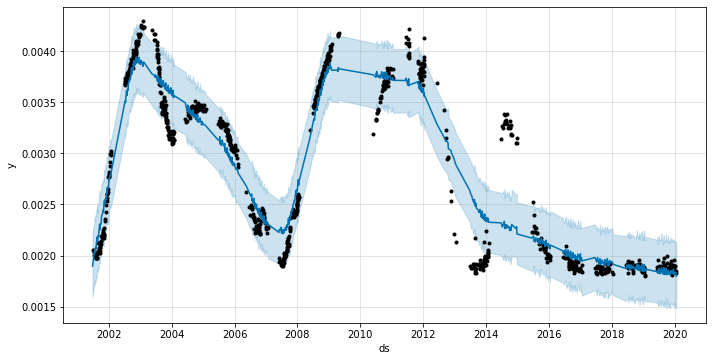

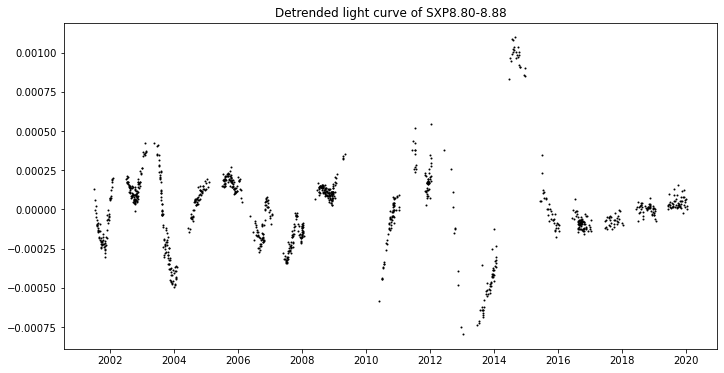

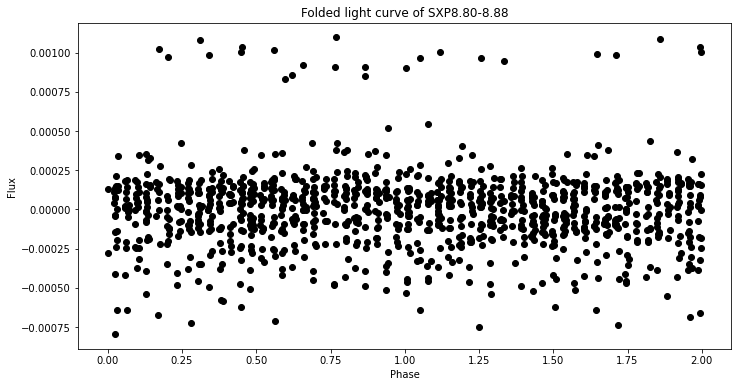

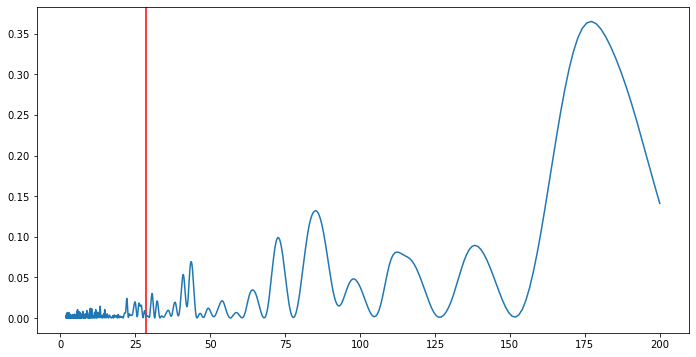

Source: SXP9.13 prophet model Period: 77.2


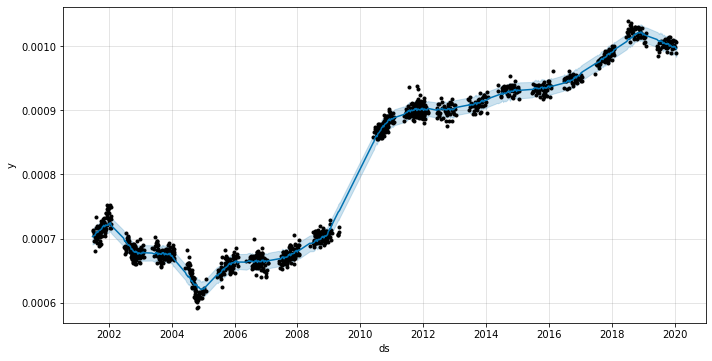

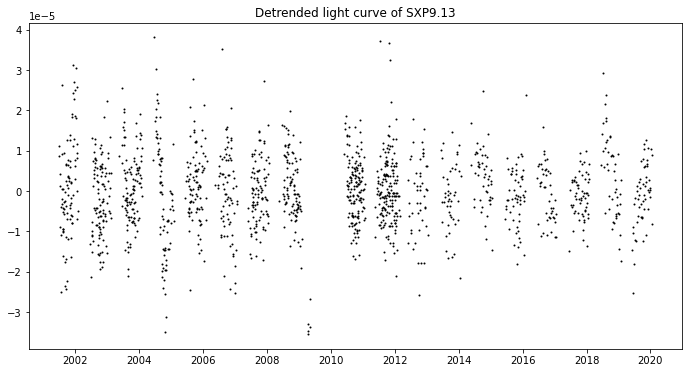

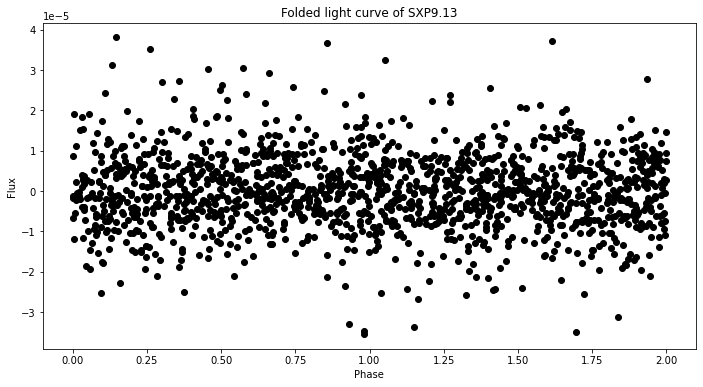

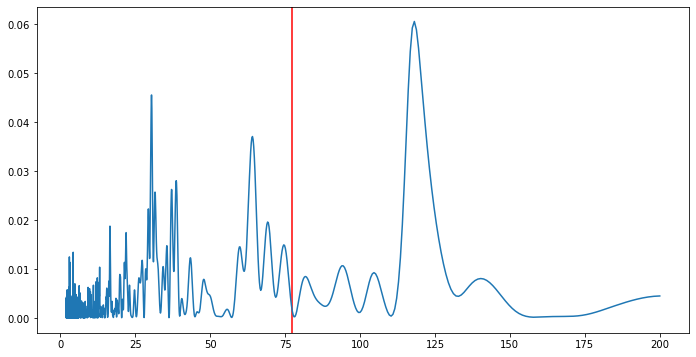

Source: SXP11.5 prophet model Period: 36.3


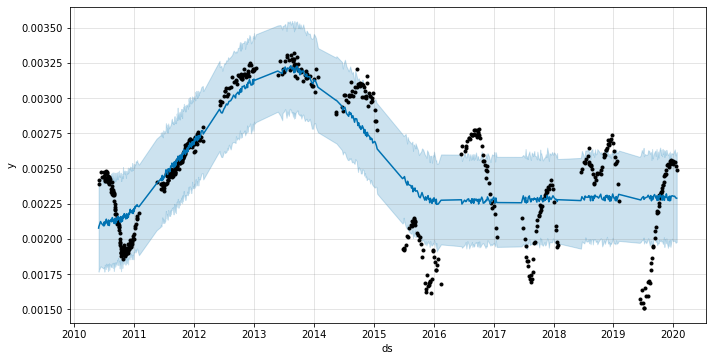

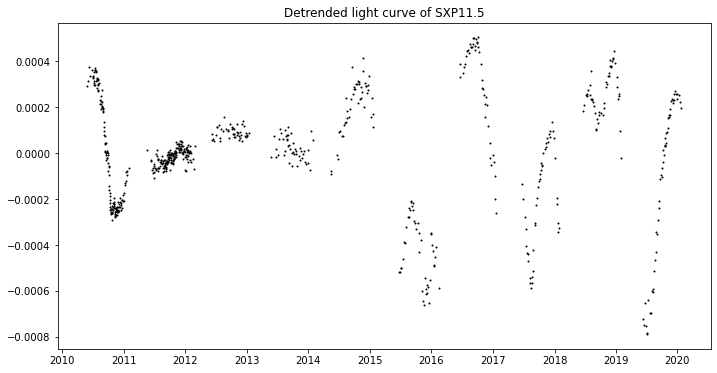

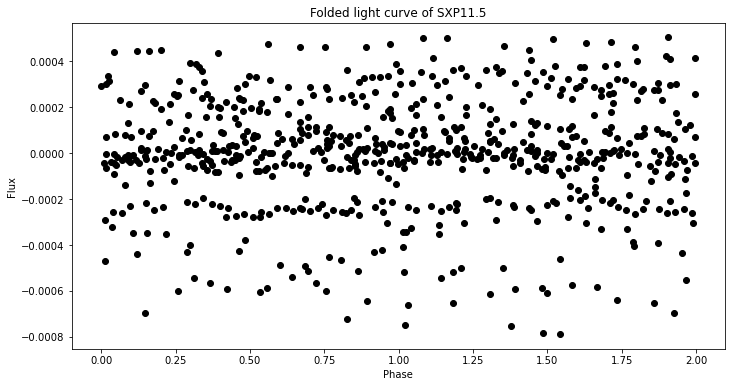

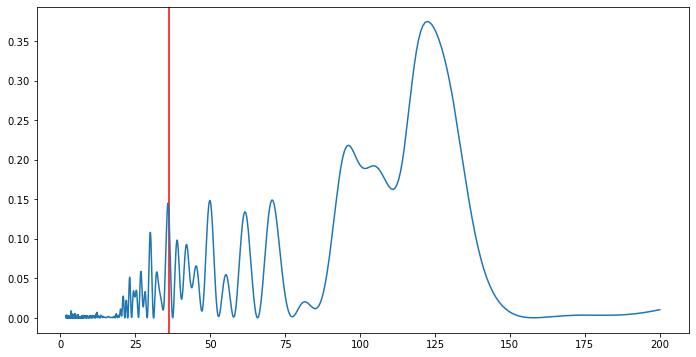

Source: SXP15.3 prophet model Period: 74.3


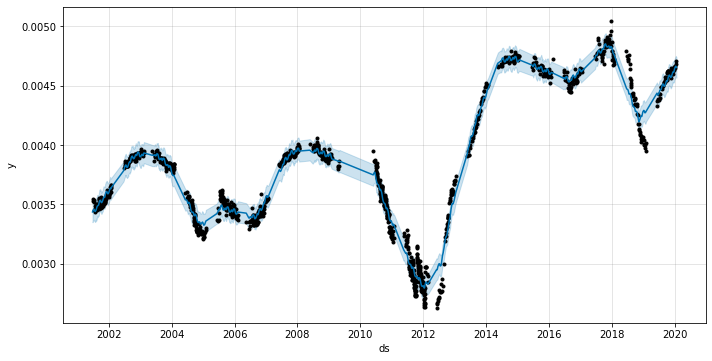

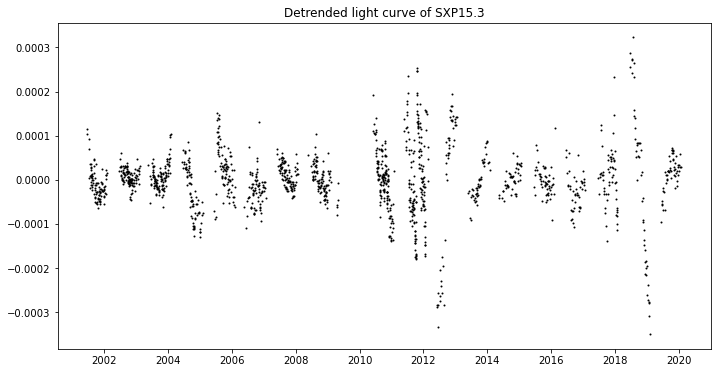

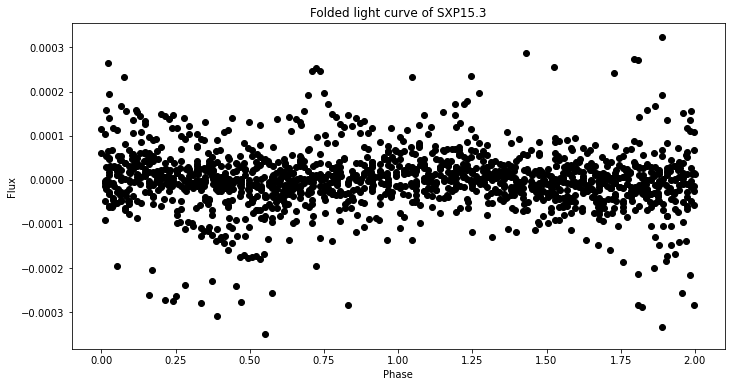

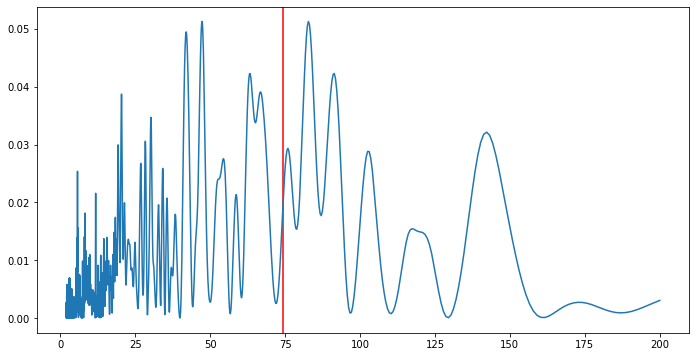

Source: SXP25.5 prophet model Period: 22.5


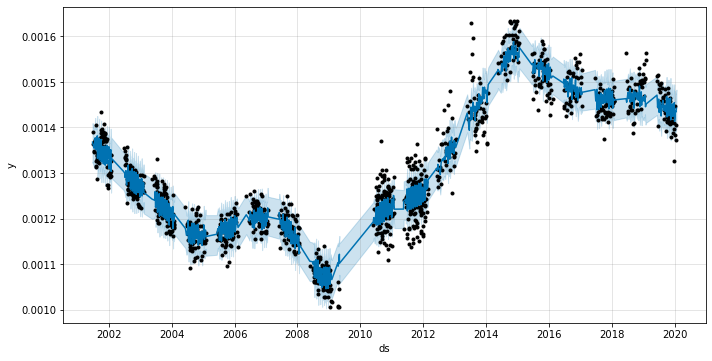

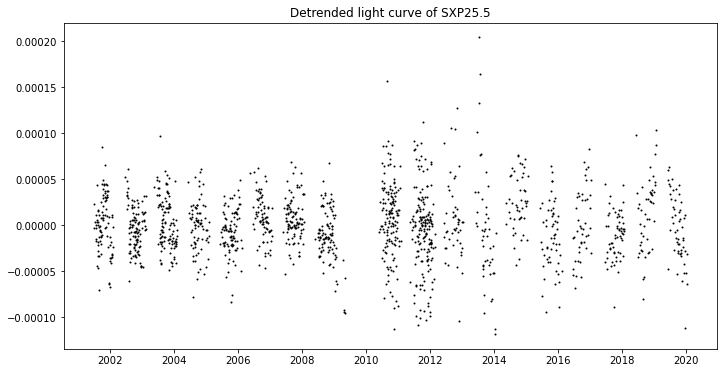

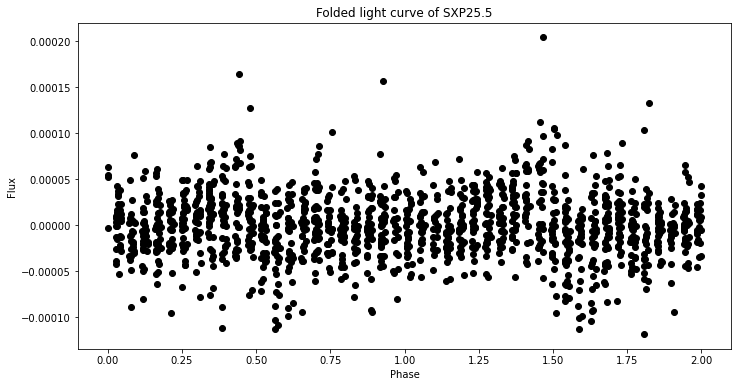

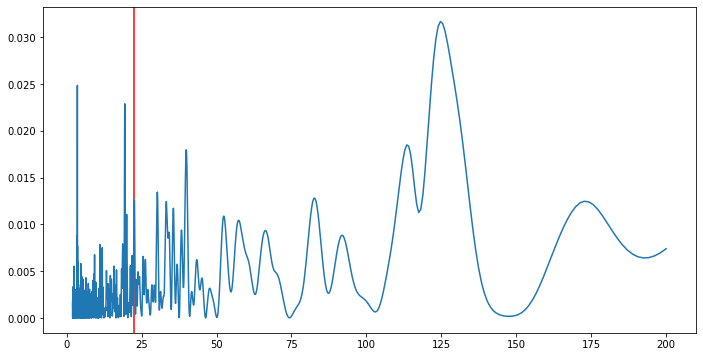

Source: SXP31.0 prophet model Period: 90.5


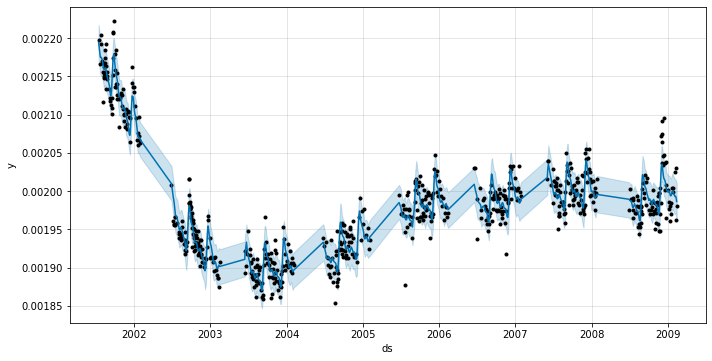

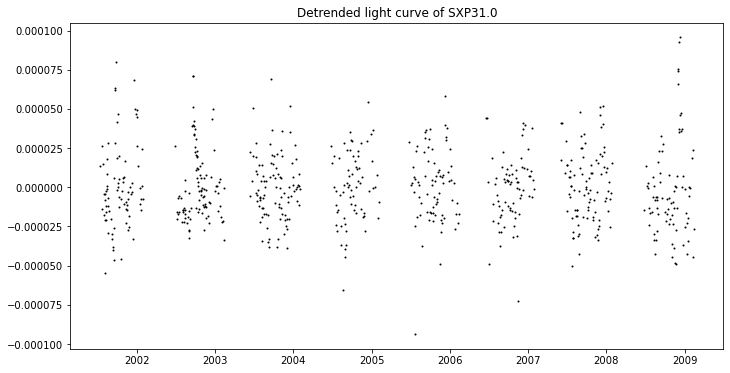

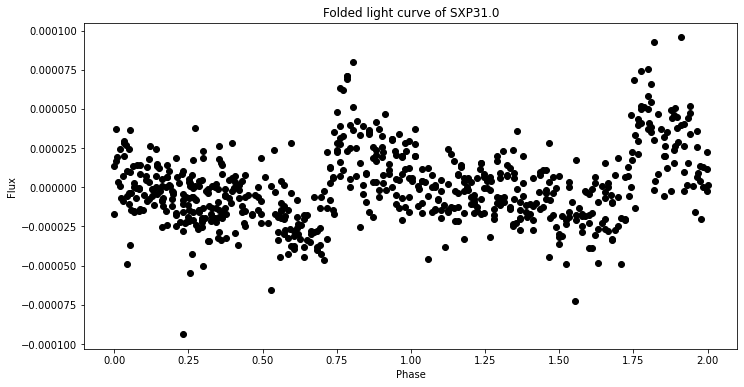

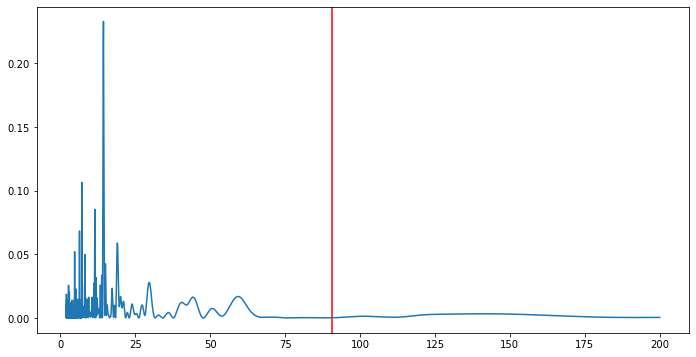

Source: SXP46.6 prophet model Period: 137.36


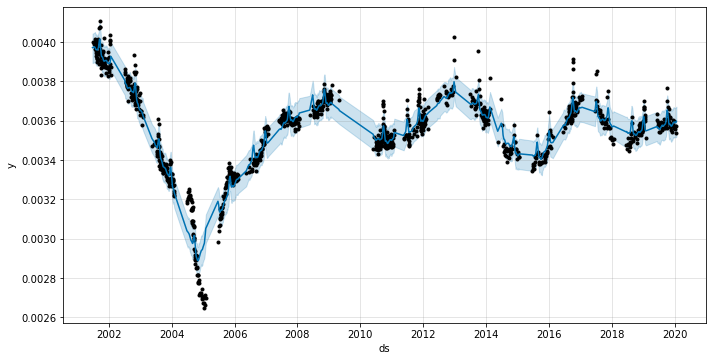

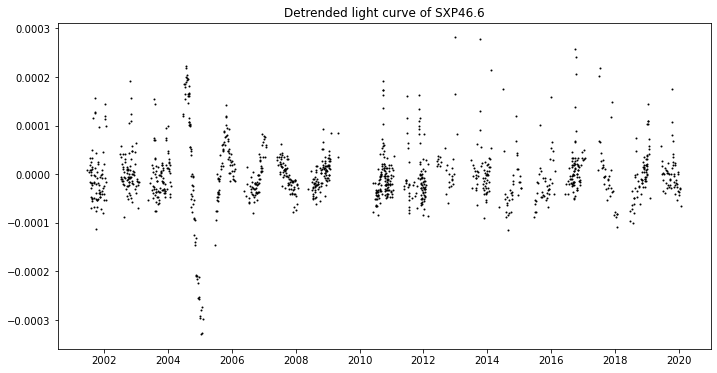

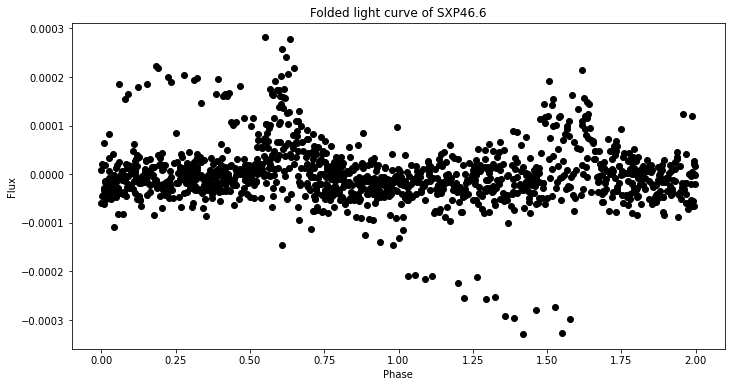

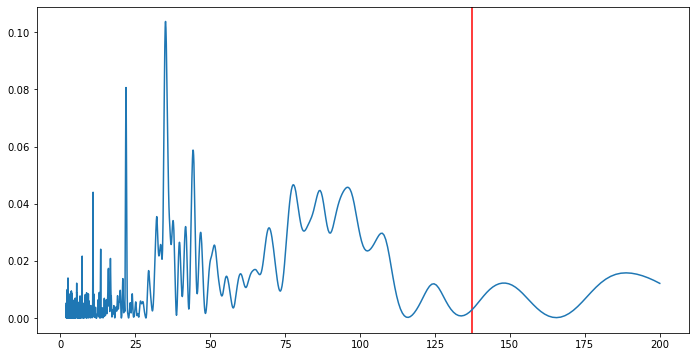

Source: SXP59.0 prophet model Period: 62.15


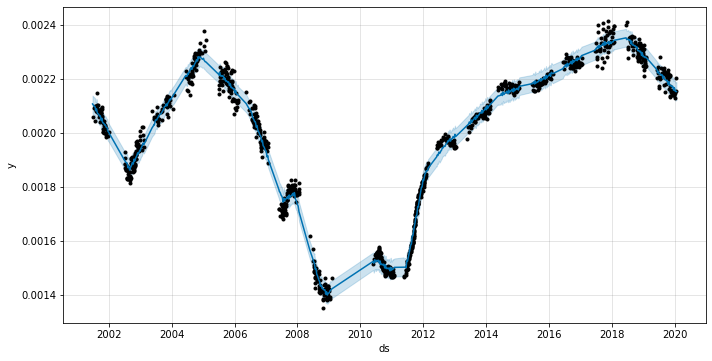

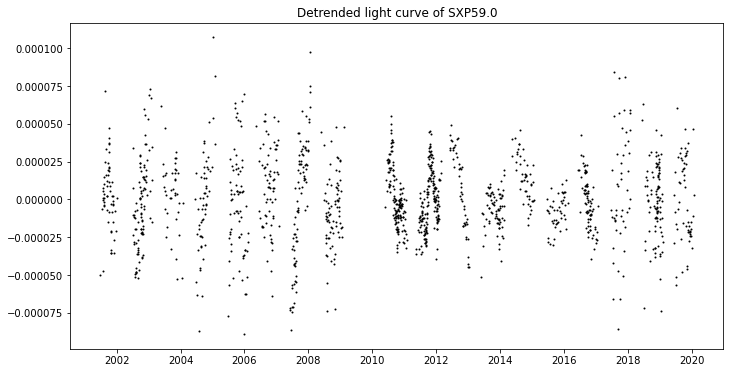

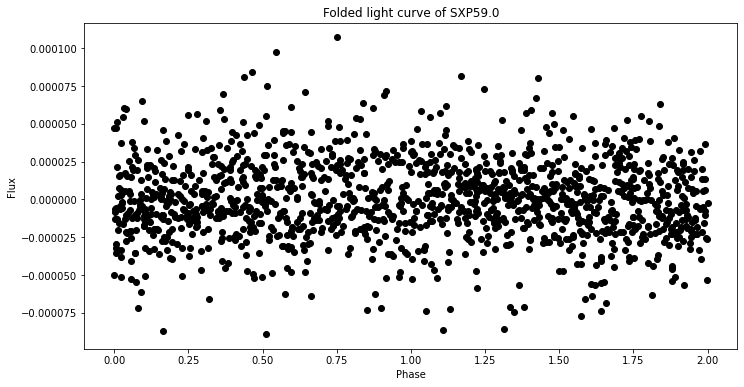

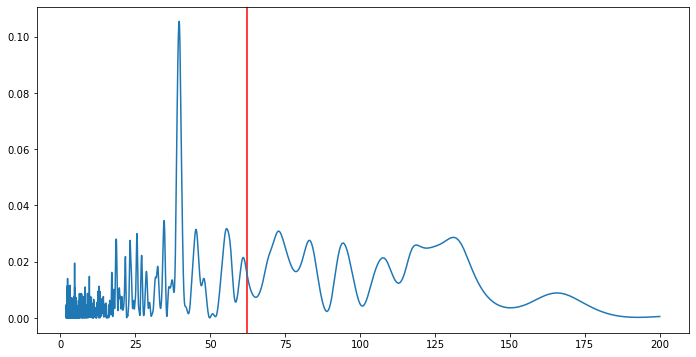

Source: SXP65.8 prophet model Period: 110.6


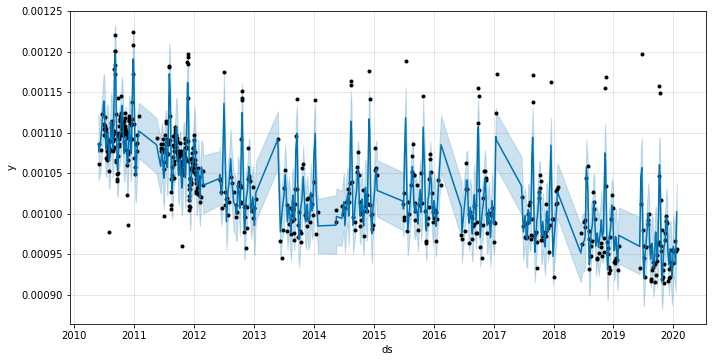

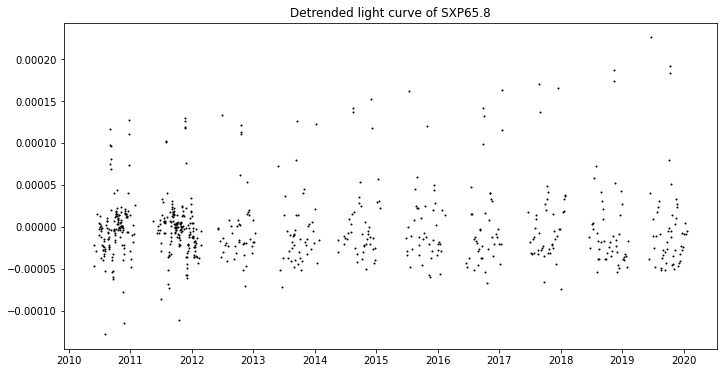

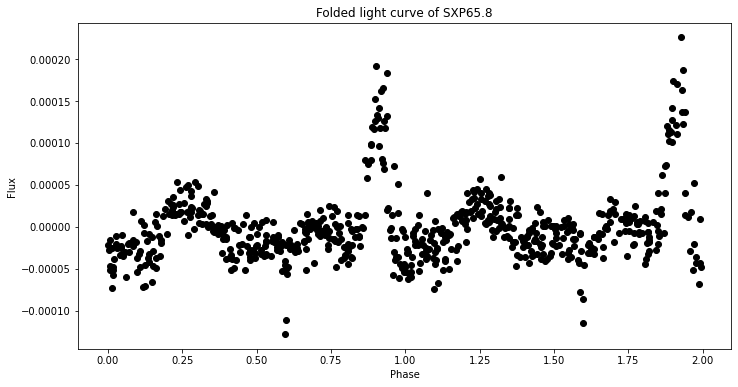

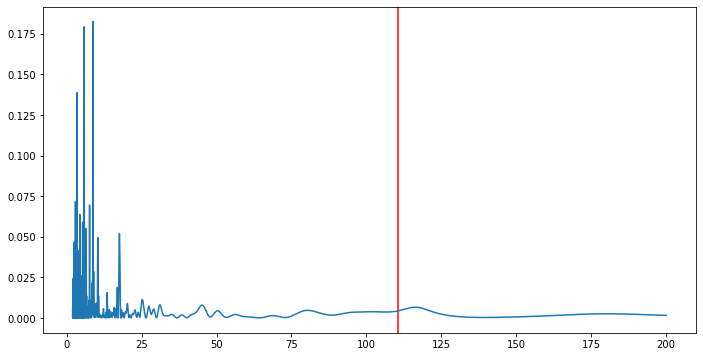

Source: SXP74.7 prophet model Period: 33.4


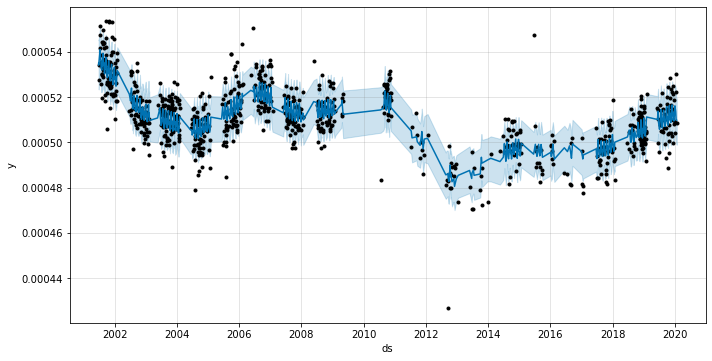

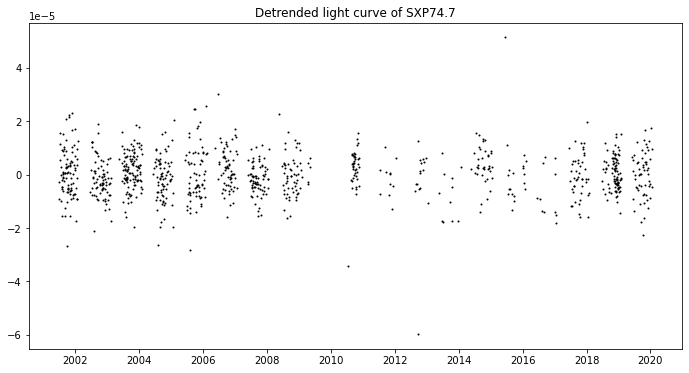

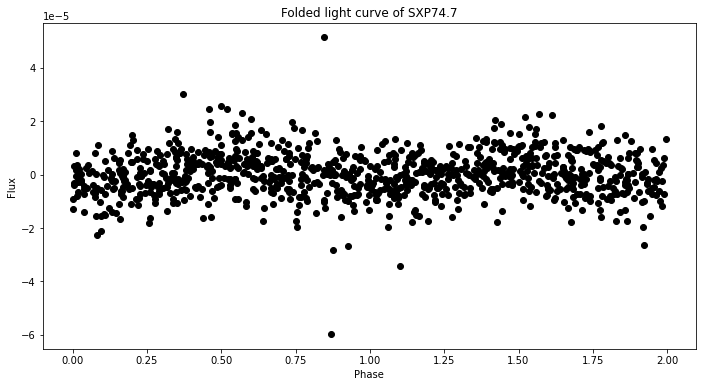

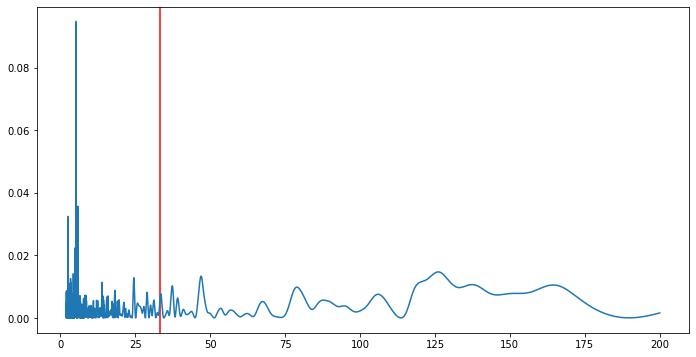

Source: SXP82.4 prophet model Period: 362.3


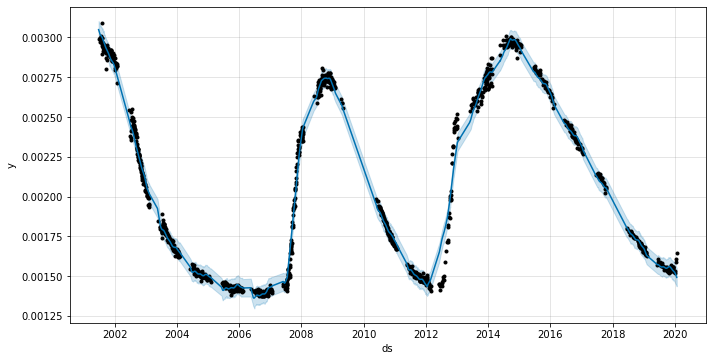

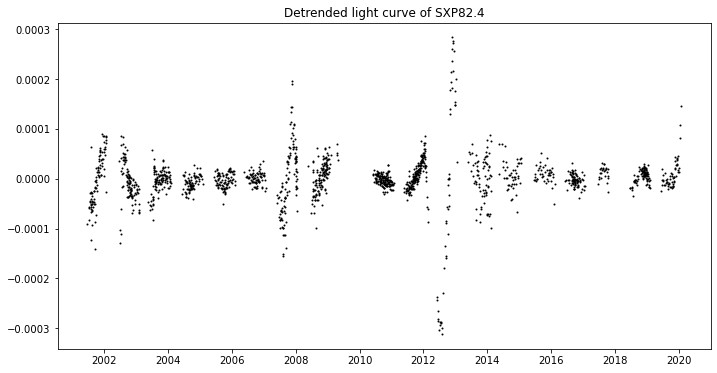

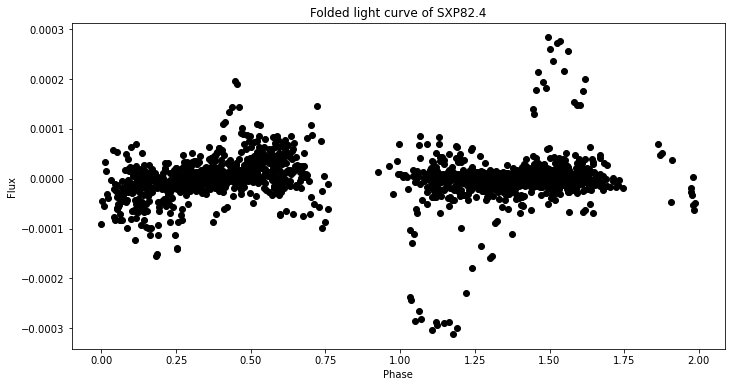

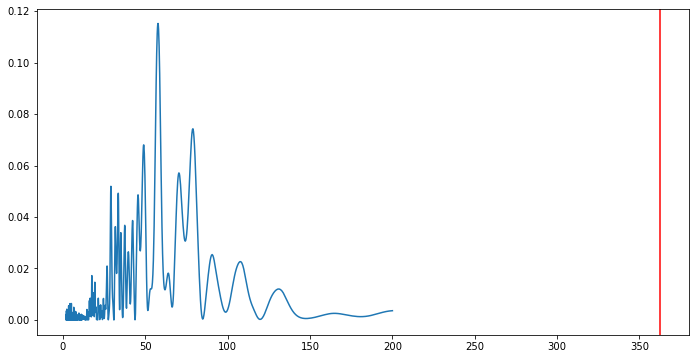

Source: SXP89.0&91.1 prophet model Period: 88.37


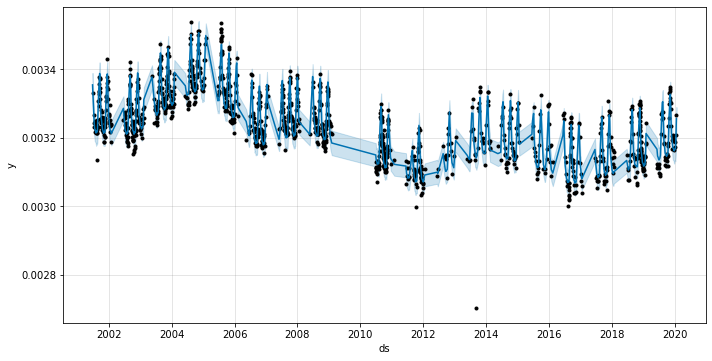

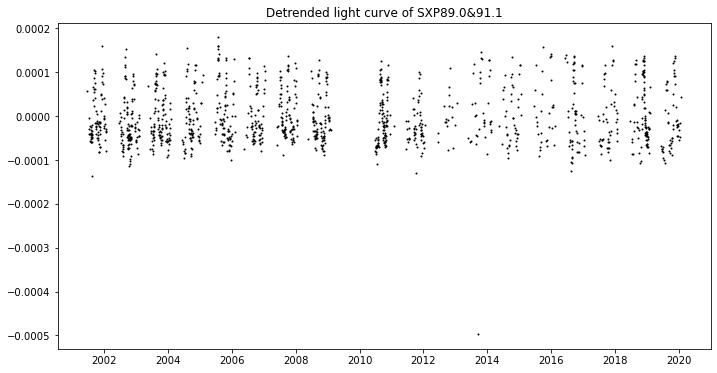

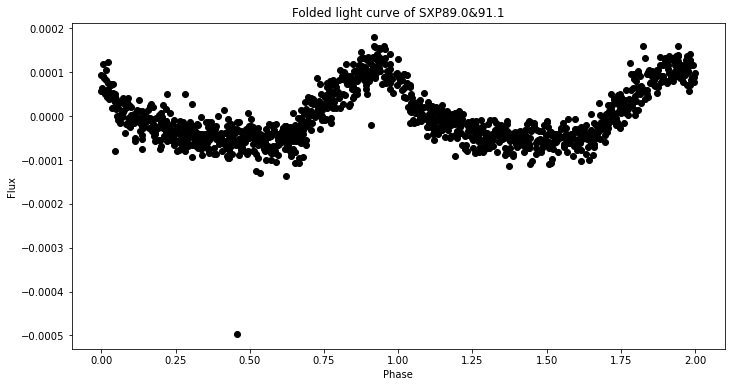

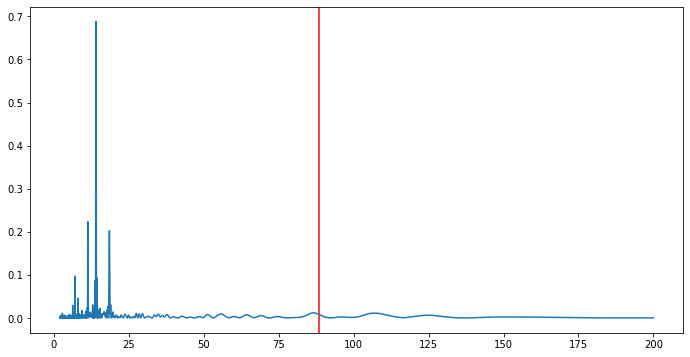

Source: SXP138 prophet model Period: 125.1


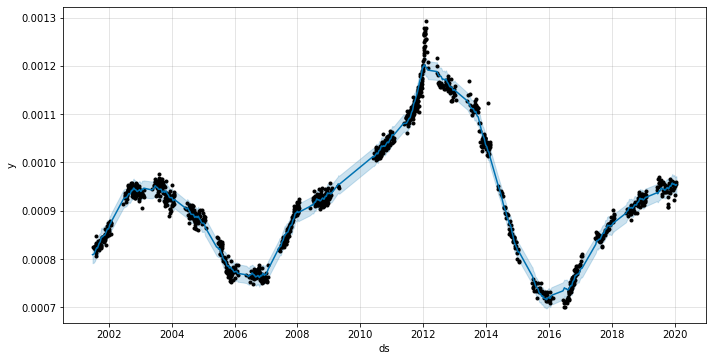

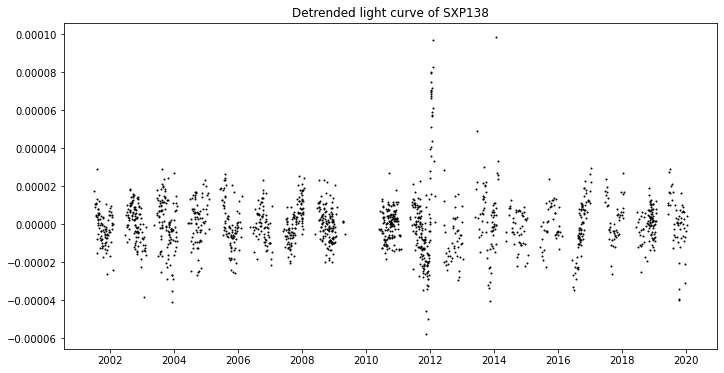

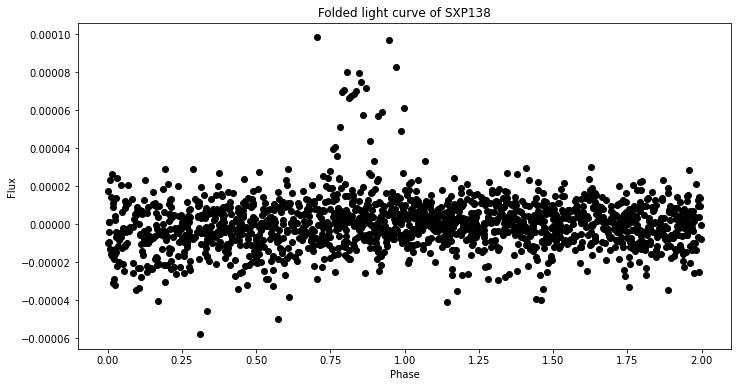

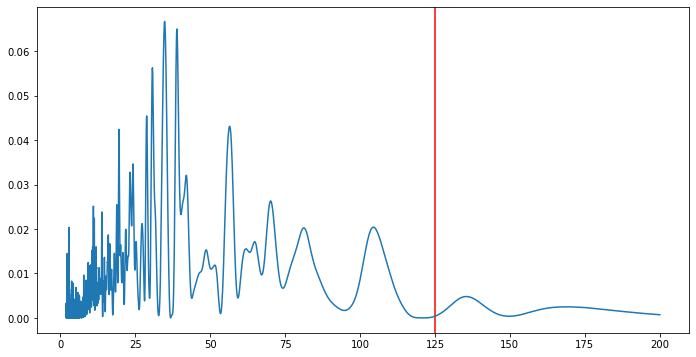

Source: SXP140 prophet model Period: 197.0


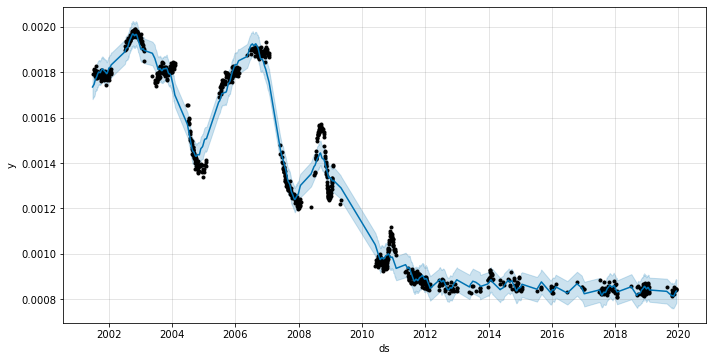

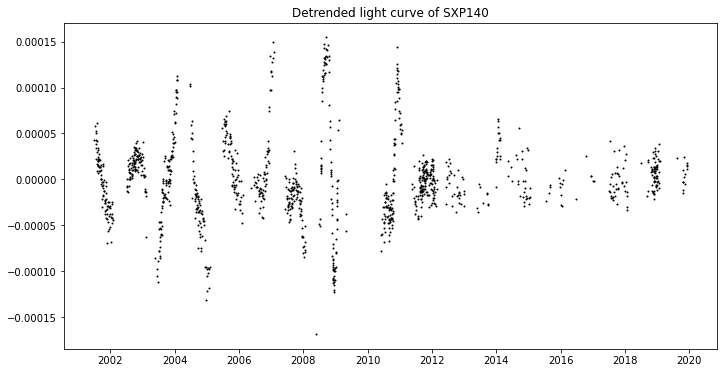

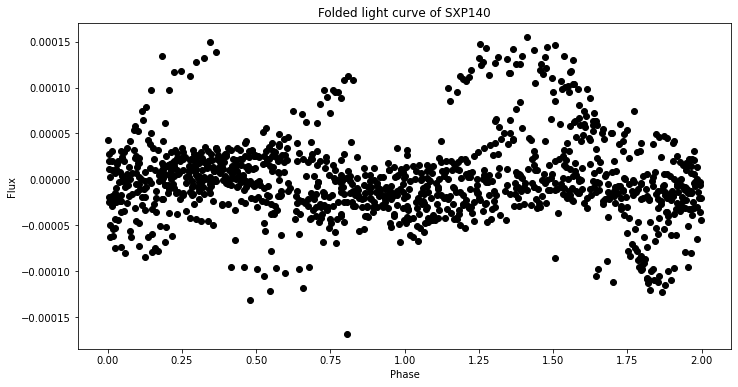

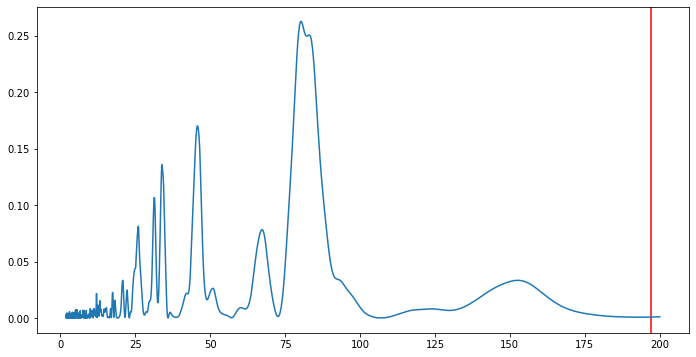

Source: SXP172 prophet model Period: 67.9


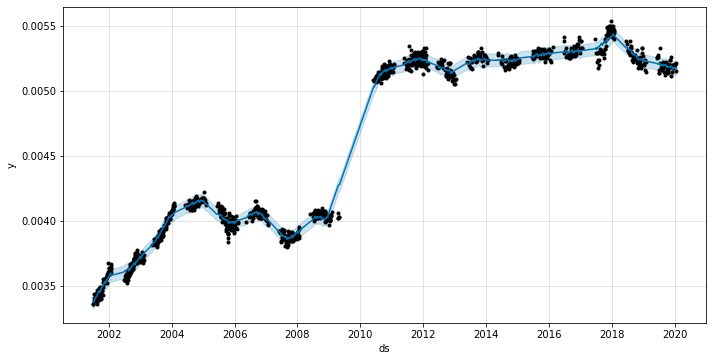

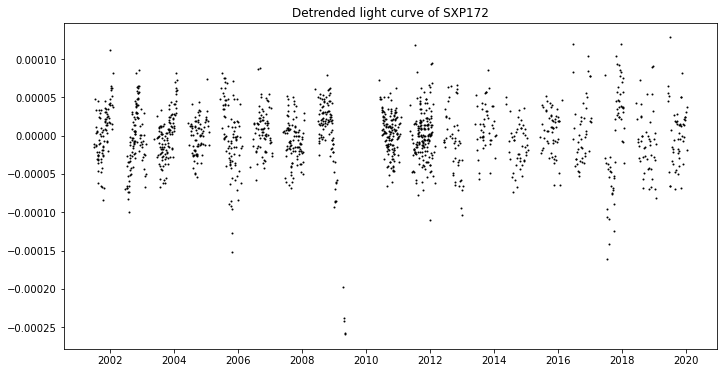

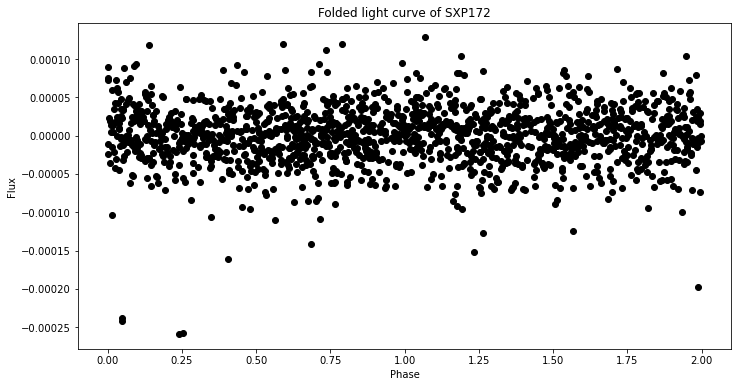

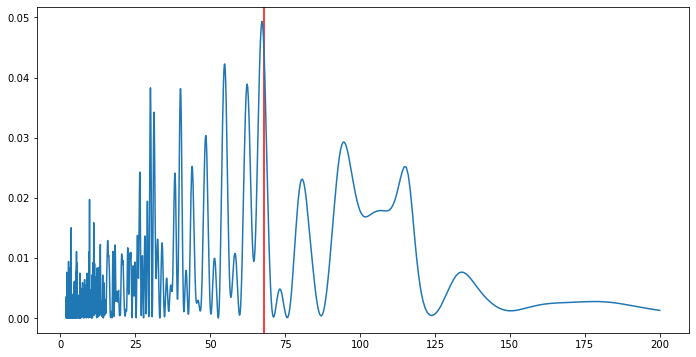

Source: SXP214 prophet model Period: 29.9


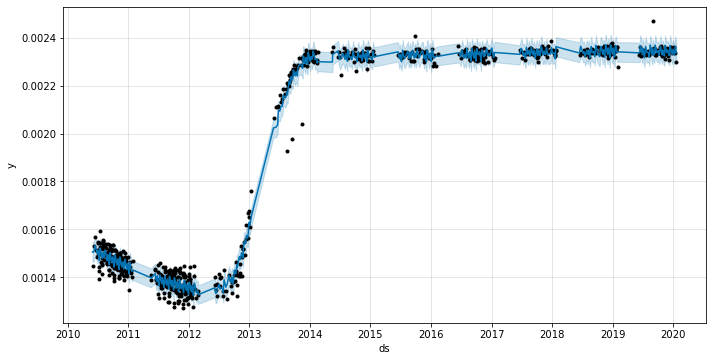

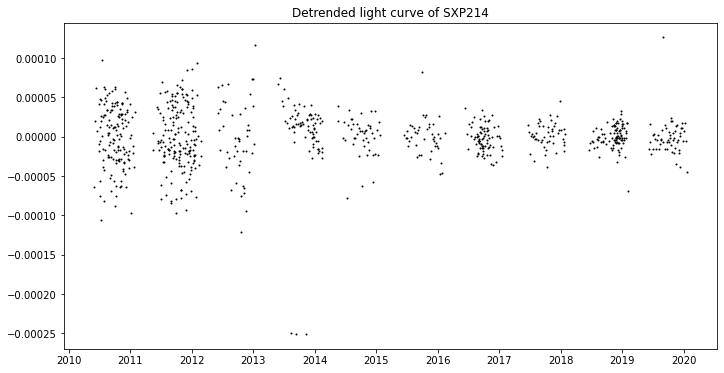

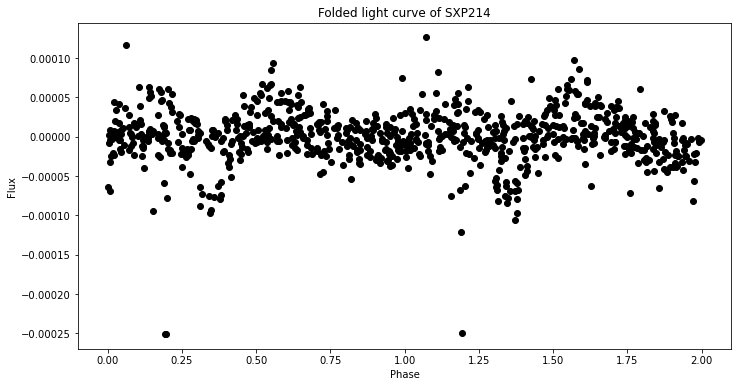

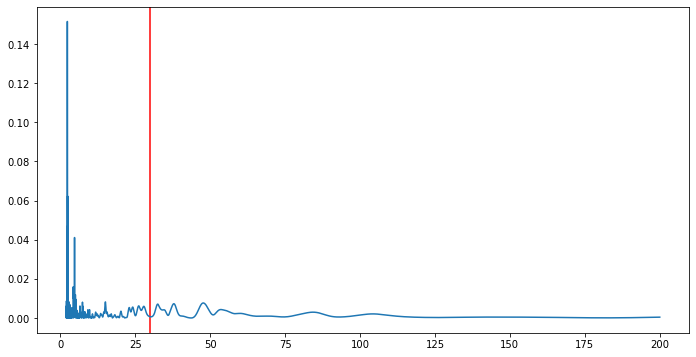

Source: SXP264 prophet model Period: 49.2


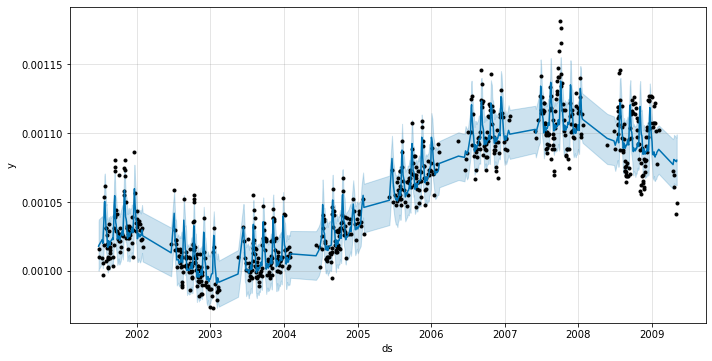

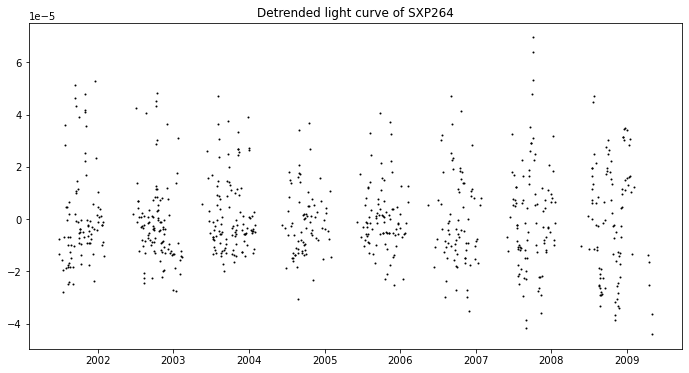

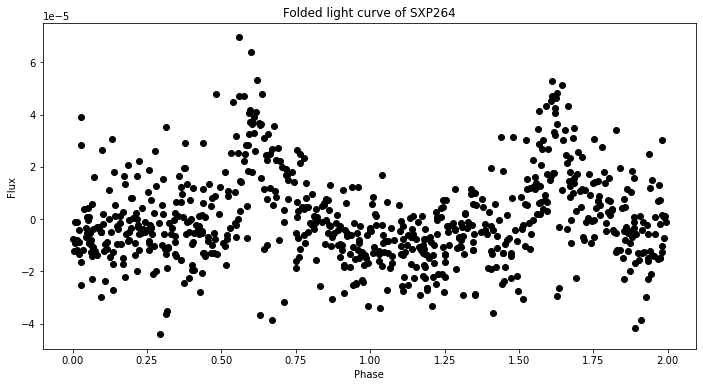

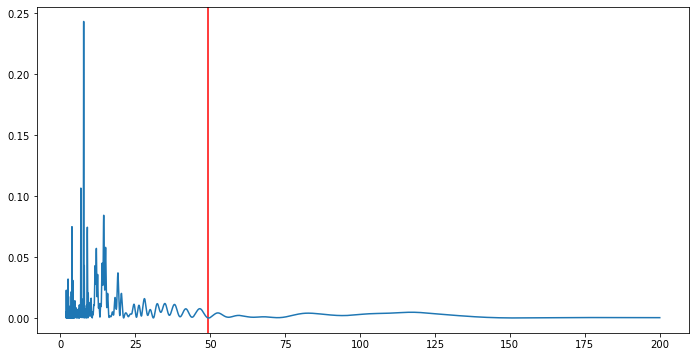

Source: SXP293 prophet model Period: 59.726000000000006


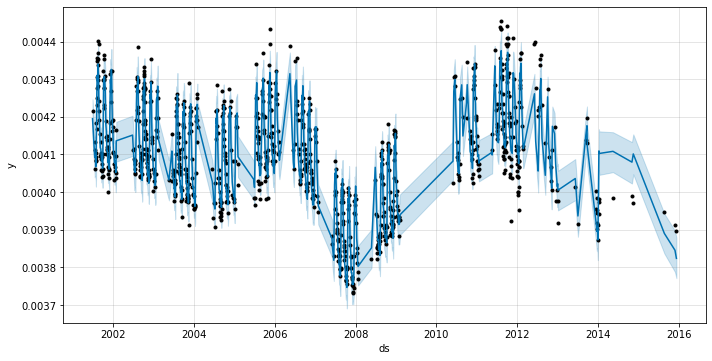

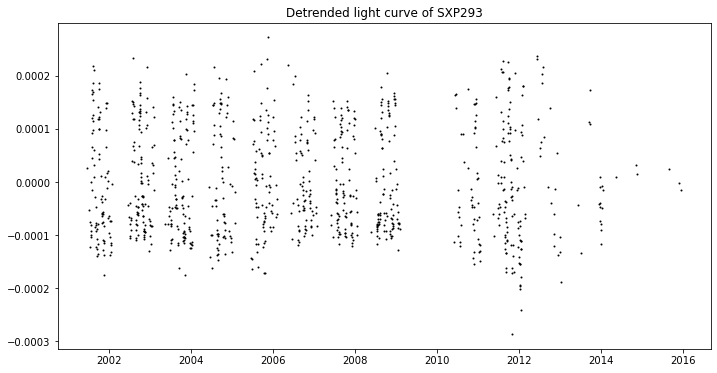

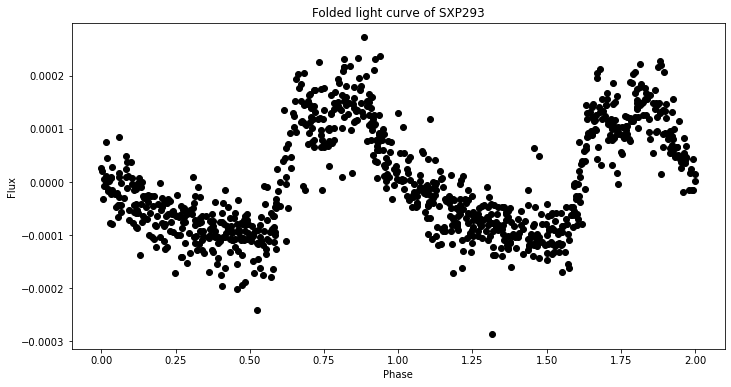

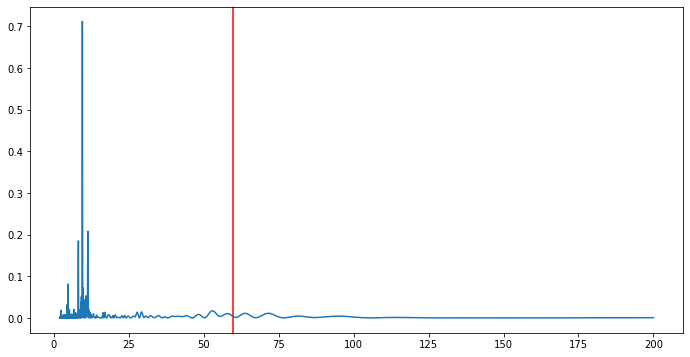

Source: SXP323 prophet model Period: 116.6


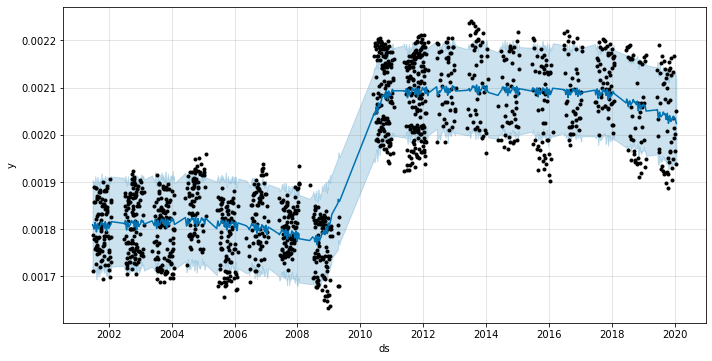

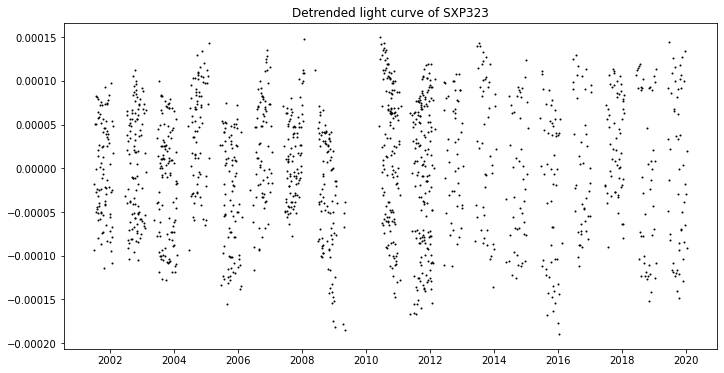

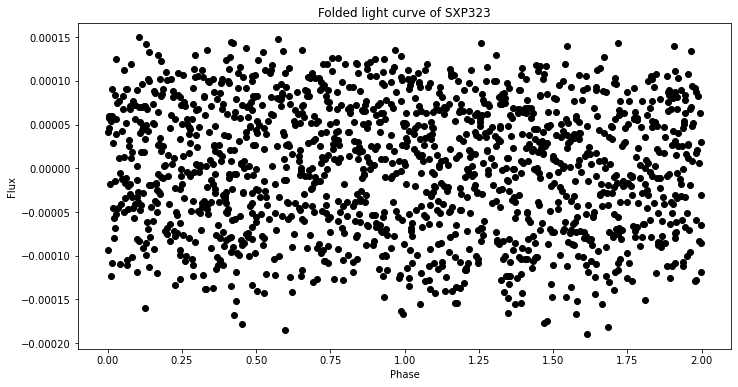

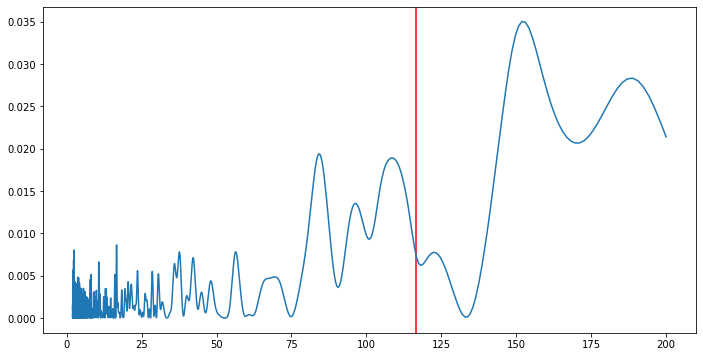

Source: SXP455 prophet model Period: 75.0


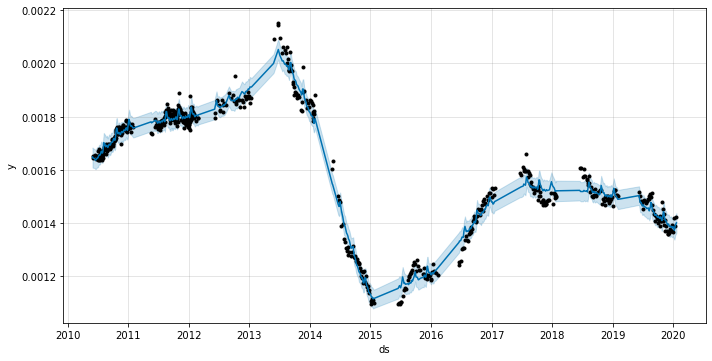

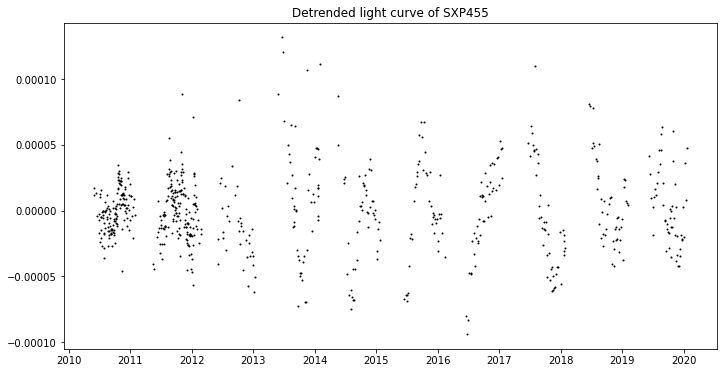

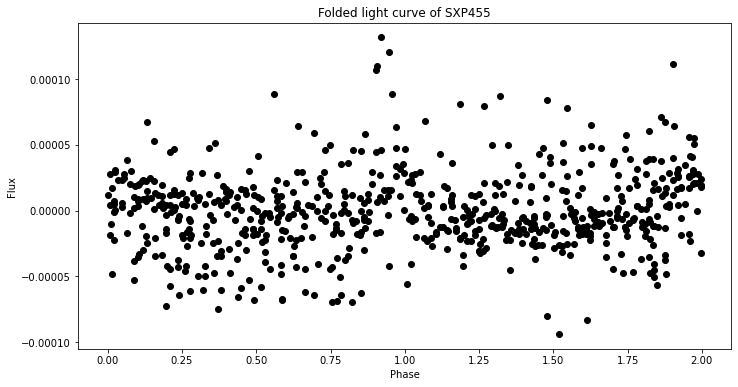

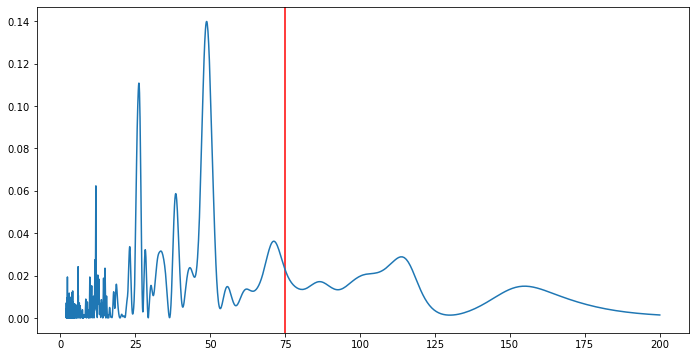

Source: SXP504 prophet model Period: 272.0


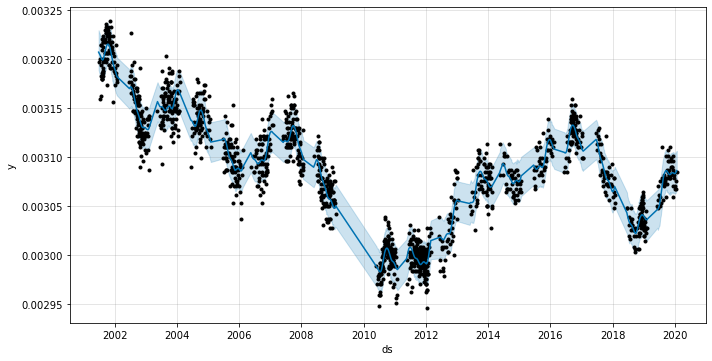

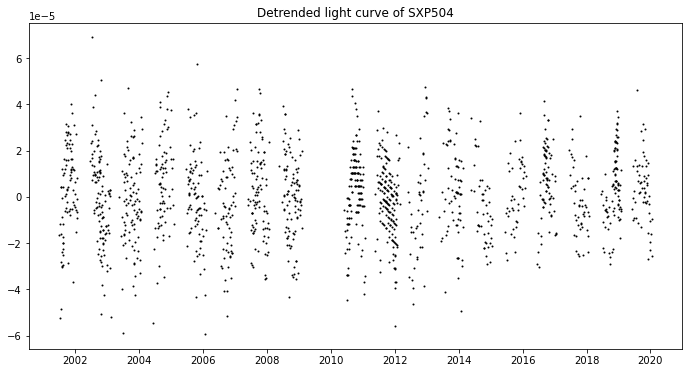

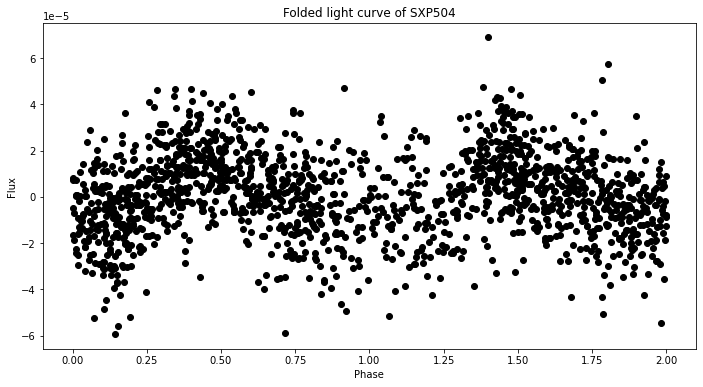

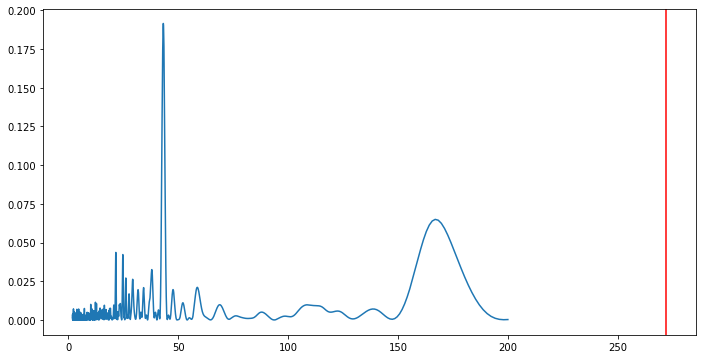

Source: SXP565 prophet model Period: 152.4


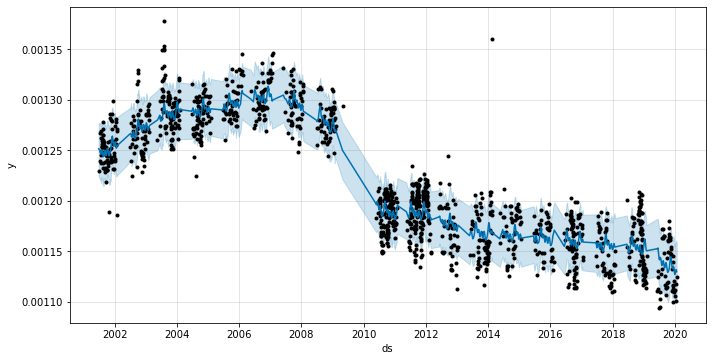

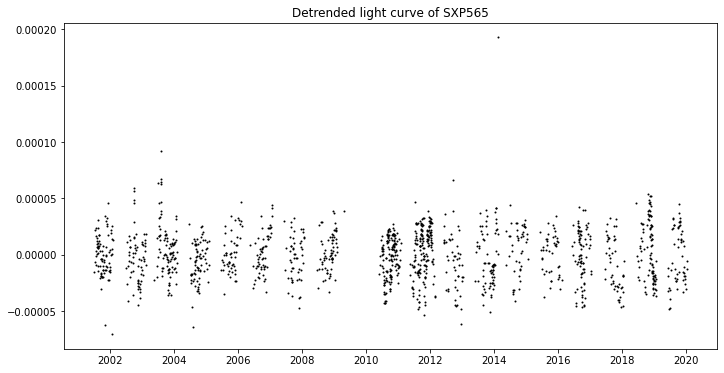

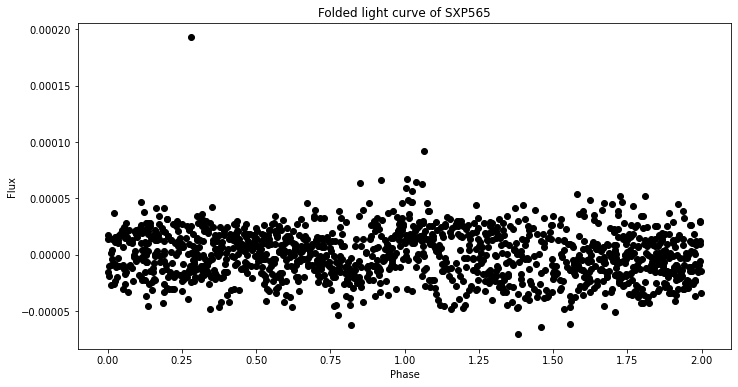

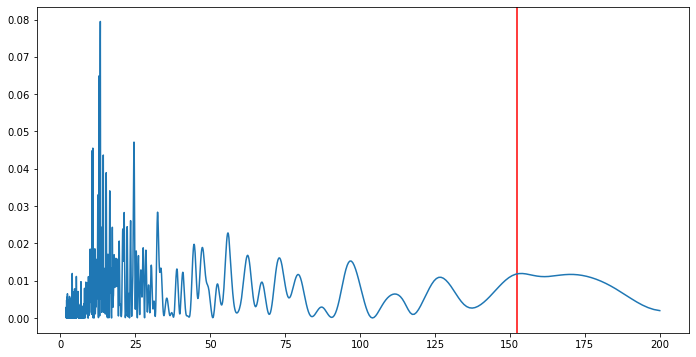

Source: SXP701 prophet model Period: 412.0


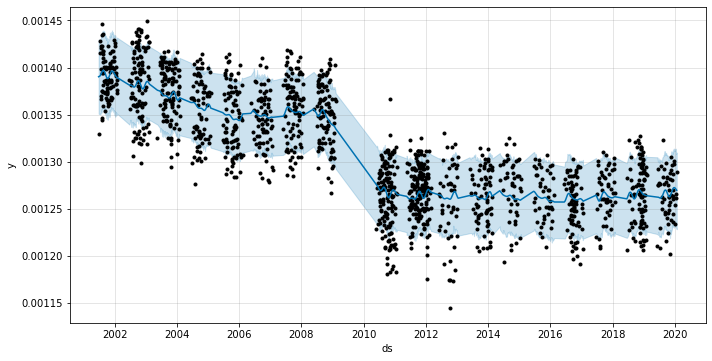

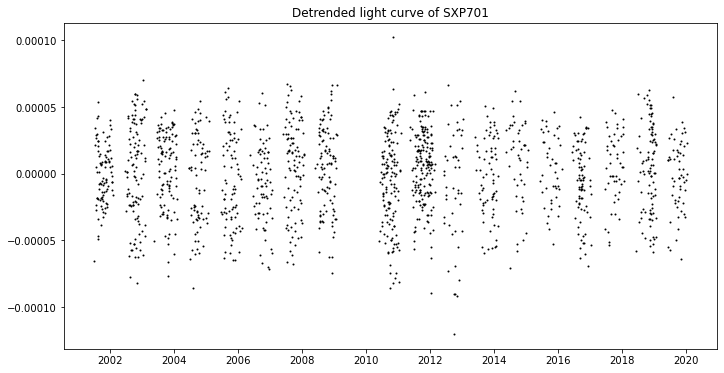

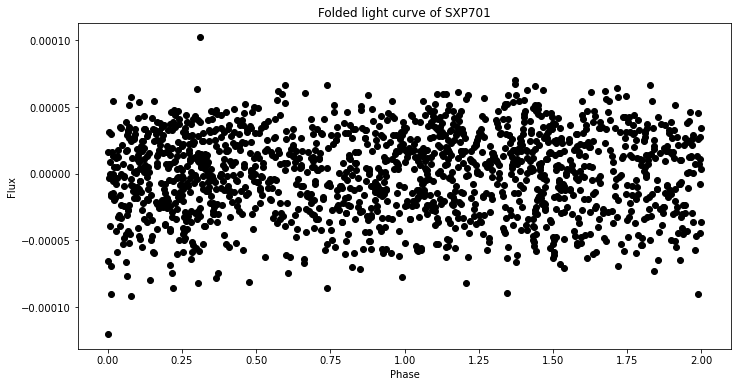

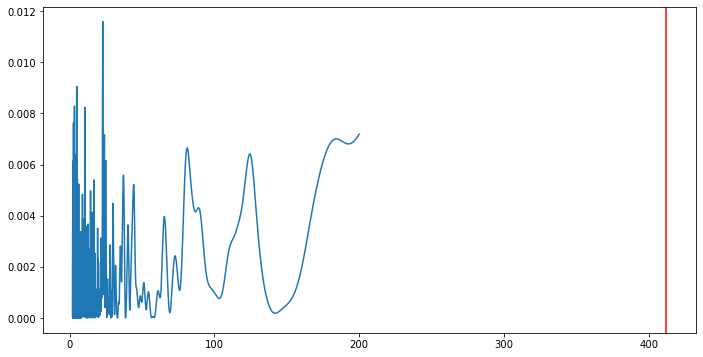

Source: SXP756 prophet model Period: 393.1


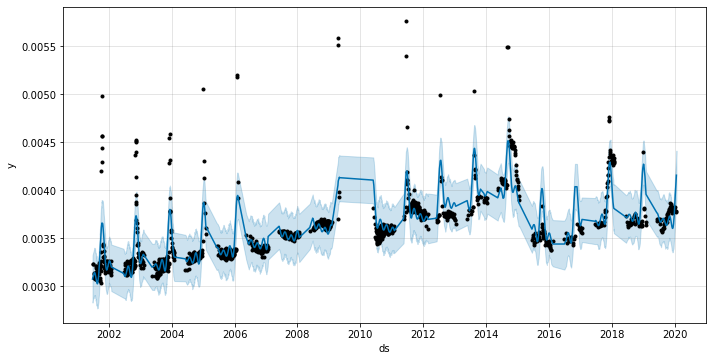

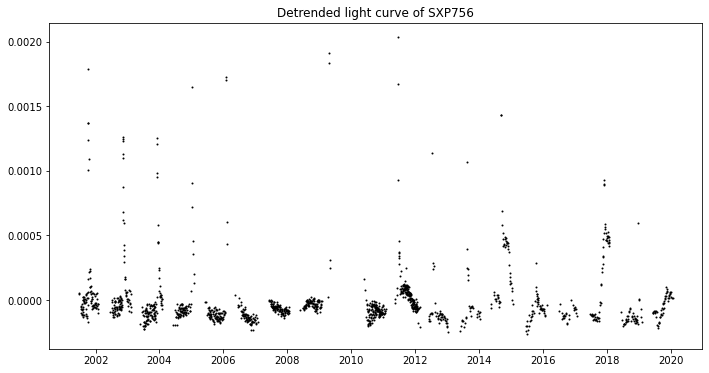

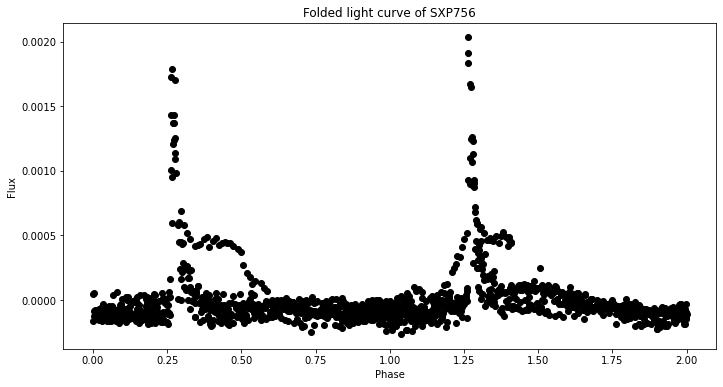

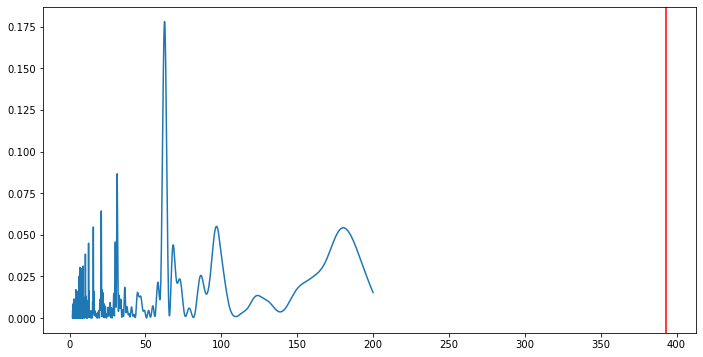

Source: SXP967 prophet model Period: 101.9


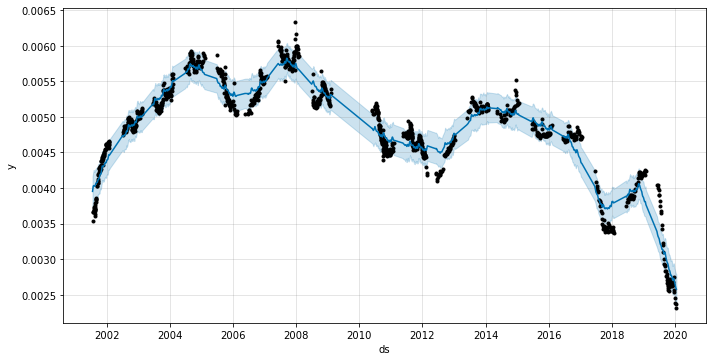

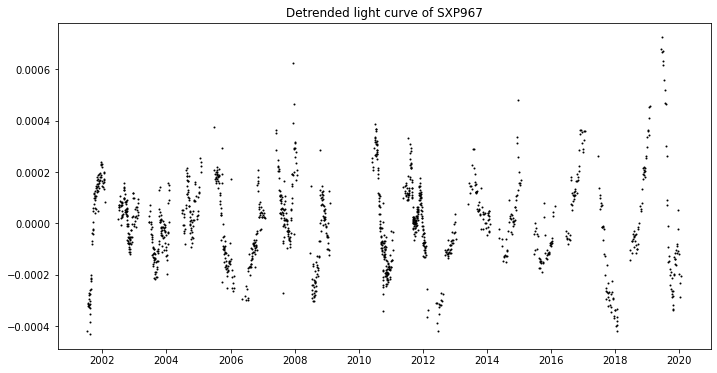

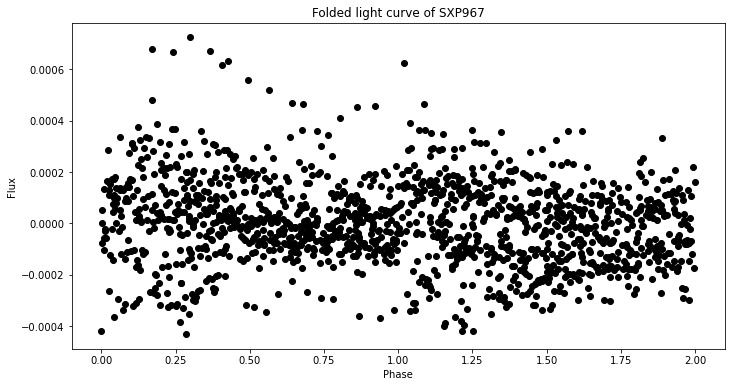

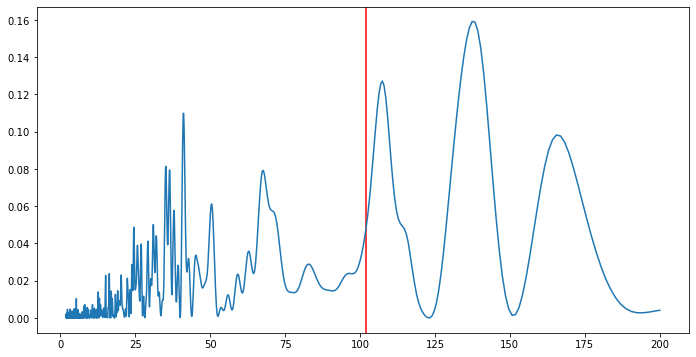

Source: SXP1062 prophet model Period: 668.0


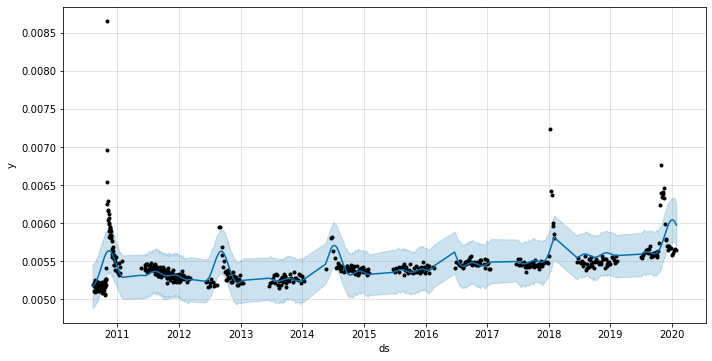

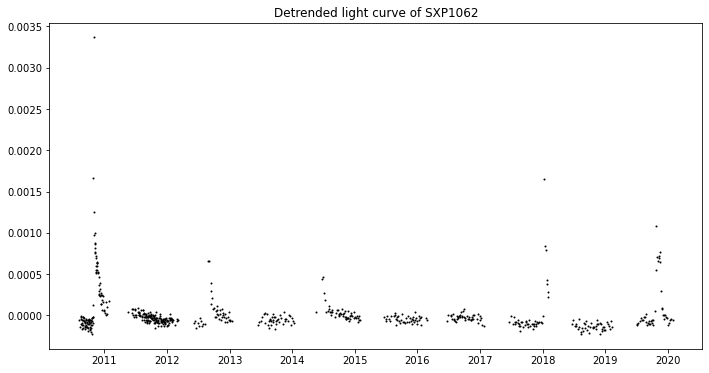

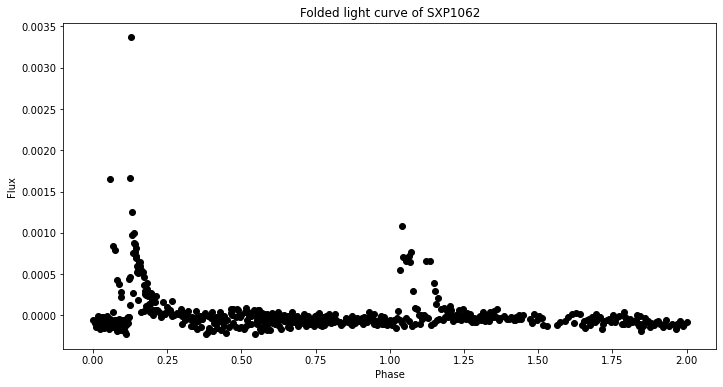

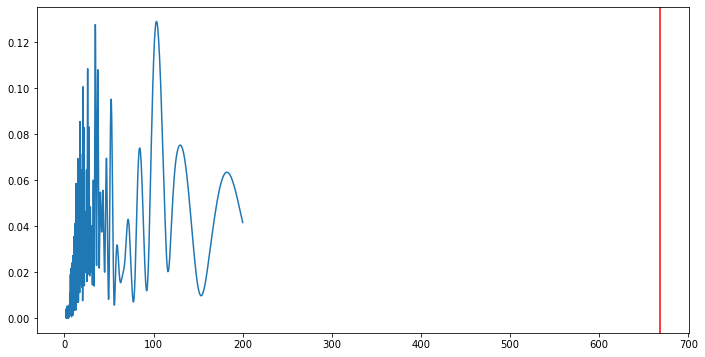

Source: SXP1323 prophet model Period: 26.188000000000002


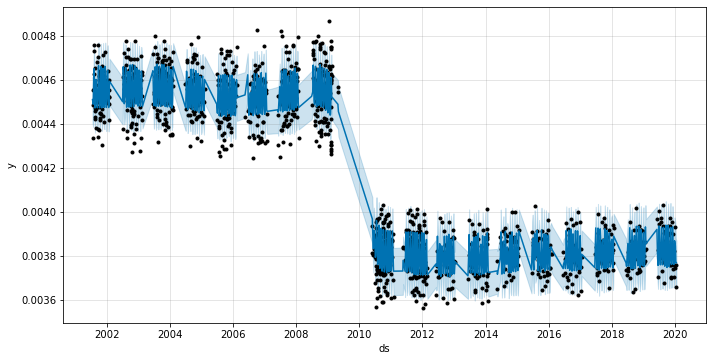

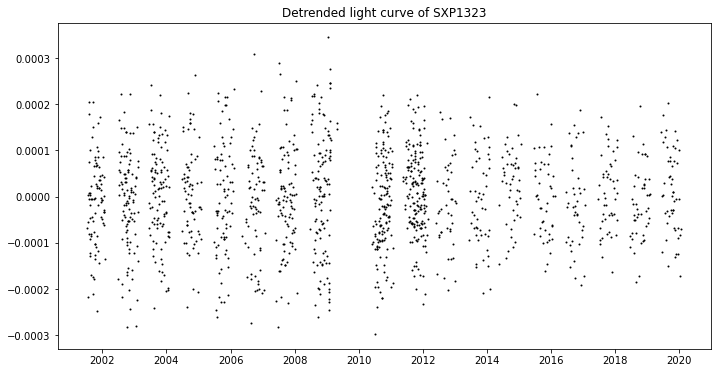

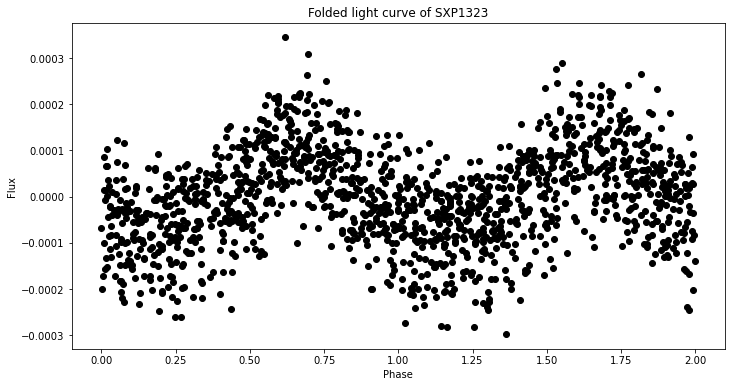

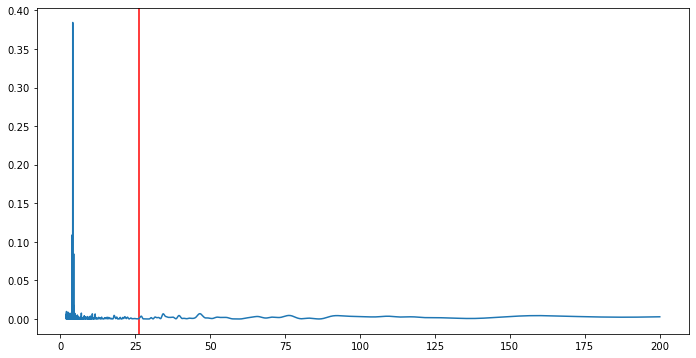

In [938]:
plt.rcParams['figure.figsize'] = (11.7, 6.0)
f = np.linspace(1/200, 1/2, 10000)
import scipy.signal as signal


for source_index, source in names_period.iterrows():
    if len(source["file"])>0:
        data = np.loadtxt(data_path+"ogle_merged/"+source["file"], delimiter=",", dtype=float)
        #     plt.plot([2455081.5,2455081.5], np.array([np.min(data[:,1]), np.max(data[:,1])])*-1, color="r")
        data_df = pd.DataFrame({"ds": data[:,0],"y": data[:,1]})
        
        data_df = pd.DataFrame({"ds": data[:,0],"y": data[:,1]})
        data_df["ds"] = pd.to_datetime(data_df["ds"], origin="julian", unit="D")
        data_df["y"] = float(2430)*10**(-1.0*data_df["y"]/2.5)

        # fit prophet model with orbital periodicity component
        m = Prophet(
            growth='linear',
            changepoints=None,
            n_changepoints=50,
            changepoint_range=0.99,
            yearly_seasonality=False,
            weekly_seasonality=False,
            daily_seasonality=False,
            holidays=None,
            seasonality_mode='additive',
            seasonality_prior_scale=10.0,
            holidays_prior_scale=10.0,
            changepoint_prior_scale=0.05,
            mcmc_samples=0,
            interval_width=0.8,
            uncertainty_samples=1000,
            stan_backend=None,
        ) #"07-09-2009"
        m.add_seasonality(name='orbital', period=source["P_orb (d)"], fourier_order=5)
        m.fit(data_df)
        
        forecast = m.predict(pd.DataFrame(data_df["ds"]))
        forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()
        
        # plot data with prophet model
        print("Source: {}".format(source["Object"]) + " prophet model" + " Period: {}".format(source["P_orb (d)"]))
        fig1 = m.plot(forecast)
        fig = plt.gcf()
        fig.set_size_inches(10,5)
        plt.show()
        # plot data with trend subtracted
        detrended = data_df.copy(deep=True)
        detrended["y"] = data_df["y"].values-forecast['trend'].values
        plt.scatter(data_df["ds"].values,detrended["y"], s=1, c="black")
        plt.title("Detrended light curve of {}".format(source["Object"]))
        plt.show()
        
#         data_df["ds"] = pd.to_datetime(data_df["ds"], origin="julian", unit="D")
#         data_df["y"] = float(2430)*10**(-1.0*data[:,1]/2.5)
#         data_df["y"][data_df["ds"]<2455081.5] = data_df["y"][data_df["ds"]<2455081.5]- np.median(data_df["y"][data_df["ds"]<2455081.5])
#         data_df["y"][data_df["ds"]>2455081.5] = data_df["y"][data_df["ds"]>2455081.5]- np.median(data_df["y"][data_df["ds"]>2455081.5])
        
        # fold detrended lightcurve
        foldTimes=(data[:,0]-data[:,0][0])/source["P_orb (d)"]
        foldTimes=foldTimes%2
        plt.scatter(foldTimes, detrended["y"], color="black")
    #     plt.axvline(2455081.5-data[:,0][0], color="r")
#         plt.gca().invert_yaxis()
        #     plt.ylim([10,20])
        plt.xlabel("Phase")
        plt.ylabel("Flux")
        plt.title("Folded light curve of {}".format(source["Object"]))
        # plt.ylim([-17,-13])
        plt.show()
        
        # 

        pgram = signal.lombscargle(data[:,0], detrended["y"].values, f, normalize=True)
        plt.plot(1/f, pgram, zorder=2)
        plt.axvline(x=source["P_orb (d)"], color="red", zorder=1)
        plt.show()
    #     break
    
#     foldTimes=time/period# divide by period to convert to phase
#     foldTimes=foldTimes%1# take fractional part of phase only (i.e. discard whole number part)

In [939]:
# future = m.make_future_dataframe(periods=1)
# future.tail()

In [318]:
list(os.listdir(data_path+"/ogle_merged"))

['sxp82.4.csv',
 'rx-j0052.1-7319.csv',
 'sxp455b.csv',
 'sxp565.csv',
 'sxp3.34.csv',
 'sxp323.csv',
 'sxp280.4.csv',
 'sxp202.csv',
 'sxp967.csv',
 'sxp152.1a.csv',
 'lxp4.4b.csv',
 'sxp202ba.csv',
 'lxp169.csv',
 'xmmuj010743.1-715953.csv',
 'sxp264.csv',
 'rx-j0516.0-6916.csv',
 'lxp272.csv',
 'sxp31.0.csv',
 'sxp6.88.csv',
 'sxp348.csv',
 'sxp25.5.csv',
 'sxp0.92.csv',
 'swift_j0208.4-7428.csv',
 'sxp1323.csv',
 'rx-j0513.9-6951.csv',
 'lxp4.10.csv',
 'sxp9.13.csv',
 'lxp69.5.csv',
 'ma93-798.csv',
 'igr_j015712-7259a.csv',
 'sxp202b.csv',
 'sxp455a.csv',
 'sxp8.80.csv',
 'sxp523.csv',
 'sxp74.7.csv',
 'lxp4.40.csv',
 'rx-j0544.1-7100.csv',
 'sxp2.763.csv',
 'sxp31.0b.csv',
 'sxp65.8.csv',
 'lin_358.csv',
 'srga_j124404.1-632232.csv',
 'sxp2.763b.csv',
 'rx_j0513.9-6951.csv',
 'sxp138.csv',
 'erasst_j100130.9-614021.csv',
 'sxp304.csv',
 'sxp2.37.csv',
 'sxp202bb.csv',
 'igr_j015712-7259b.csv',
 'igr_j00569-7226.csv',
 'swift_j0513.4-6547.csv',
 'sxp893.csv',
 'cal83.csv',
 '1a053

TJD = MJD - 40000, assuming you know the MJD. If you only know the JD, TJD = JD - 2440000.5

In [13]:
# candidate sources from Bird+2012 that I could try to analyse
candidates = ['sxp2.37', 'sxp2.763', 'sxp7.78', 'sxp22.07', 'sxp31.0',
              'sxp46.6', 'sxp91.1', 'sxp101', 'sxp169.3', 'sxp280.4', 'sxp327', 'sxp967']

for root, dirnames, filenames in os.walk(data_path+"/ogle3"):
#     for filename in fnmatch.filter(filenames, "phot.astronomical Julian day numberdat"):
    source_name = root.split("/")[-1]
    if source_name in candidates:
        lc_path = os.path.join(root, filename)
        lc = np.loadtxt(lc_path)
        print(source_name)

NameError: name 'filename' is not defined

In [6]:
lc_path_4 = os.path.join(root, filename)
        lc_path_3 = os.path.join(root.replace("ogle4", "ogle3"), filename)
        try:
            ogle3 = np.loadtxt(lc_path_3)
            ogle4 = np.loadtxt(lc_path_4)
            data = np.vstack((ogle3, ogle4))
            sources[root.split("/")[-1]] = len(data)
#             np.savetxt(data_path+"/ogle_merge/{}.csv".format(source_name), data, delimiter=",")
        except:
            pass

IndentationError: unexpected indent (<ipython-input-6-39d42b5cf08e>, line 2)

In [38]:
print(candidates*12)

['sxp2.37', 'sxp2.37', 'sxp2.37', 'sxp2.37', 'sxp2.37', 'sxp2.37', 'sxp2.37', 'sxp2.37', 'sxp2.37', 'sxp2.37', 'sxp2.37', 'sxp2.37']


In [28]:
#data[0][0] - 2440000.5 #+0.5-10000 # need to subtract 9999.5 from TJD to get Tony's first timestamp for SXP2.37
# 2086.9 TJD is 08-02-1974, 12086.4 is 26-06-2001
# it's actually AJD - 2450000
data[0][0] - 2450000

2086.892119999975

In [38]:
data = np.loadtxt(data_path+"/ogle_merge/sxp0.92.csv", delimiter=",")
ogle3_sxp092 = data[np.where(data[:,0]<2455081.5)[0]]
ogle4_sxp092 = data[np.where(data[:,0]>2455081.5)[0]]
# plt.hist(ogle3_sxp092[:,1])
# plt.hist(ogle4_sxp092[:,1], alpha=0.5)
plt.show()

16.202 16.202


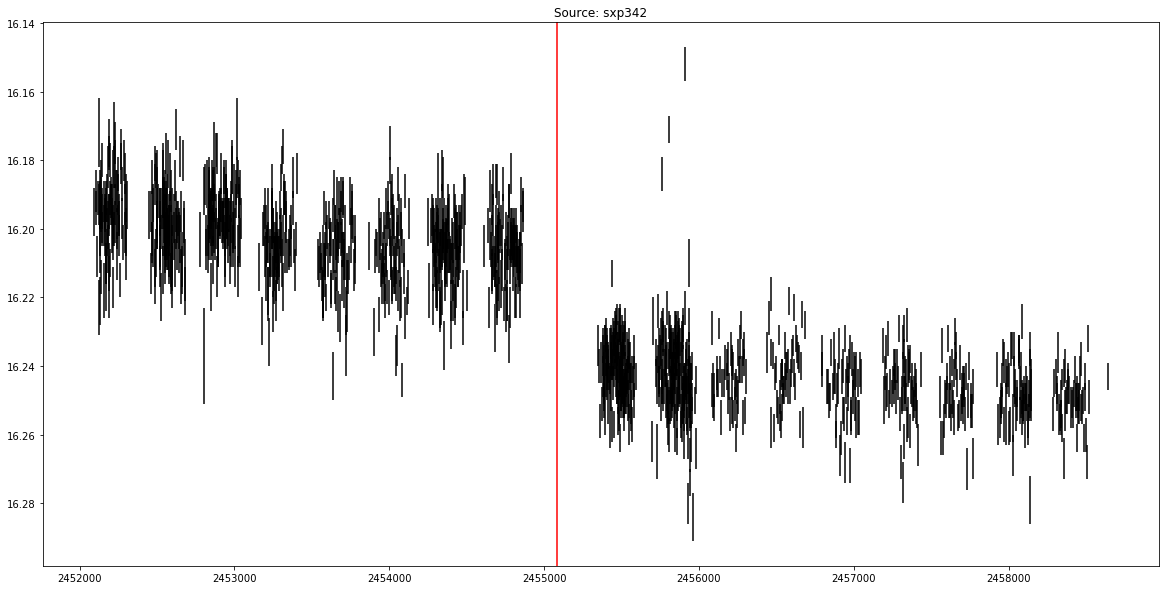

In [25]:
data = np.loadtxt(data_path+"/ogle_merge/"+"sxp0.92.csv", delimiter=",")
plt.axvline(2455081.5, color="r")
#     plt.plot([2455081.5,2455081.5], np.array([np.min(data[:,1]), np.max(data[:,1])])*-1, color="r")
plt.errorbar(data[:,0], data[:,1], yerr=data[:,2], ecolor="black", fmt=" ")
plt.gca().invert_yaxis()
#     plt.ylim([10,20])
plt.title("Source: {}".format(filename[:-4]))
# plt.ylim([-17,-13])
plt.show()

In [34]:
data[:,0][:722][-1]

2454866.55206

In [38]:
print(np.mean(data[:,1][:722]), np.std(data[:,1][:722]))

16.202376731301936 0.01135583666819506


In [37]:
print(np.mean(data[:,1][722:]), np.std(data[:,1][722:]))

16.244159817351598 0.010765397749424765


In [41]:
(np.mean(data[:,1][722:])-np.mean(data[:,1][:722]))/np.std(data[:,1][:722])

3.679437039340876

# get orbital info

In [2]:
source_info = pd.read_csv(data_path+"SMC_confirmed.csv")

In [3]:
# data file names matching sources from Mehtap's table
ordered_file_names = [ 'sxp2.37.csv','','','','' ,'sxp7.78.csv', 'sxp8.80.csv', 'sxp9.13.csv','', 'sxp15.3.csv',
                     '', 'sxp25.5.csv','', 'sxp46.6.csv', 'sxp59.0.csv','', 'sxp74.7.csv','sxp82.4.csv','sxp91.1.csv', 'sxp138.csv', 'sxp140.csv','',
                      'sxp169.3.csv',  'sxp172.csv',  'sxp202.csv','','', 'sxp280.4.csv', 'sxp293.csv', 'sxp323.csv','','', 'sxp504.csv', 'sxp565.csv',
                      'sxp701.csv', 'sxp756.csv', 'sxp967.csv','', 'sxp1323.csv',]

In [56]:
len(ordered_file_names)

39

In [53]:
len(source_info.Object.values)

39

In [49]:
source_info.Object.values

array(['SXP2.37', 'SXP2.76', 'SXP3.34', 'SXP5.05', 'SXP6.85', 'SXP7.78',
       'SXP8.80-8.88', 'SXP9.13', 'SXP11.5', 'SXP15.3', 'SXP22.1',
       'SXP25.5', 'SXP31.0', 'SXP46.6', 'SXP59.0', 'SXP65.8', 'SXP74.7',
       'SXP82.4', 'SXP89.0&91.1', 'SXP138', 'SXP140', 'SXP153', 'SXP169',
       'SXP172', 'SXP202A', 'SXP214', 'SXP264', 'SXP280', 'SXP293',
       'SXP323', 'SXP343', 'SXP455', 'SXP504', 'SXP565', 'SXP701',
       'SXP756', 'SXP967', 'SXP1062', 'SXP1323'], dtype=object)

In [9]:
names_period = source_info[["Object", 'P_orb (d)','P_orb (d) II']]
names_period = names_period.join(pd.DataFrame({"file": ordered_file_names}))

Object  P_orb (d) P_orb (d) II          file
0        SXP2.37     18.600            0   sxp2.37.csv
1        SXP2.76     82.400            0              
2        SXP3.34     10.720            0              
3        SXP5.05     17.200            0              
4        SXP6.85     21.900            0              
5        SXP7.78     44.900            0   sxp7.78.csv
6   SXP8.80-8.88     28.500            0   sxp8.80.csv
7        SXP9.13     77.200            0   sxp9.13.csv
8        SXP11.5     36.300            0              
9        SXP15.3     74.300            0   sxp15.3.csv
10       SXP22.1     75.970            0              
11       SXP25.5     22.500            0   sxp25.5.csv
12       SXP31.0     90.500            0              
13       SXP46.6    137.360     (143.29)   sxp46.6.csv
14       SXP59.0     62.150            0   sxp59.0.csv
15       SXP65.8    110.600            0              
16       SXP74.7     33.400            0   sxp74.7.csv
17       SXP82.4    362.300            0   sxp82.4.csv
18  SXP89.0&91.1     88.370         88.4   sxp91.1.csv
19        SXP138    125.100            0    sxp138.csv
20        SXP140    197.000            0    sxp140.csv
21        SXP153    100.300            0              
22        SXP169     68.600            0  sxp169.3.csv
23        SXP172     67.900            0    sxp172.csv
24       SXP202A     71.900            0    sxp202.csv
25        SXP214     29.900            0              
26        SXP264     49.200            0              
27        SXP280    127.500            0  sxp280.4.csv
28        SXP293     59.726      (59.62)    sxp293.csv
29        SXP323    116.600            0    sxp323.csv
30        SXP343     94.400            0              
31        SXP455     75.000            0              
32        SXP504    272.000            0    sxp504.csv
33        SXP565    152.400            0    sxp565.csv
34        SXP701    412.000            0    sxp701.csv
35        SXP756    393.100          390    sxp756.csv
36        SXP967    101.900            0    sxp967.csv
37       SXP1062    668.000        (656)              
38       SXP1323     26.188            0   sxp1323.csv

In [14]:
source[1]

Object              SXP2.37
P_orb (d)              18.6
P_orb (d) II              0
file            sxp2.37.csv
Name: 0, dtype: object

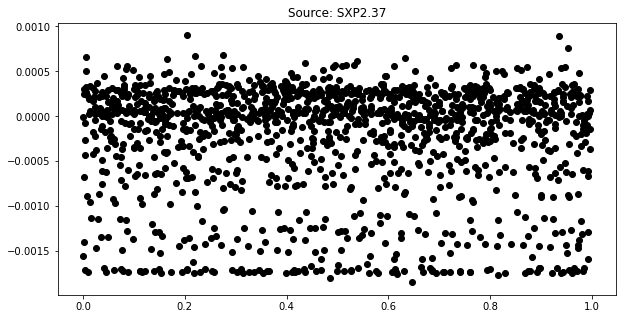

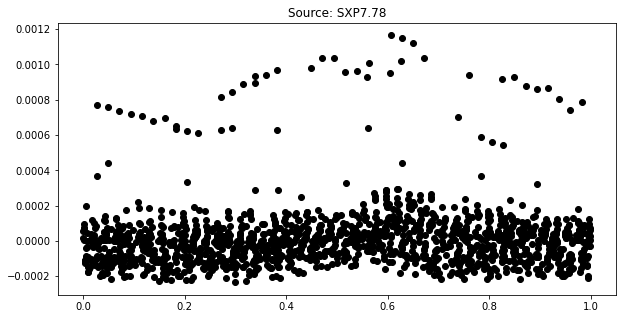

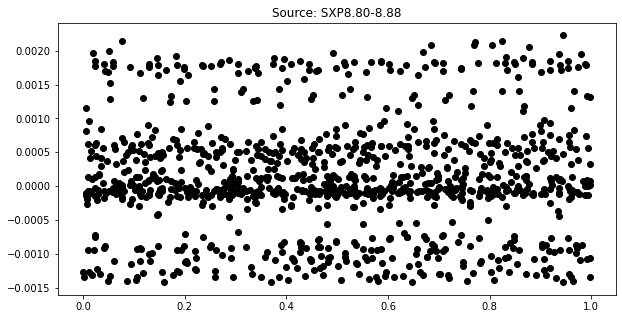

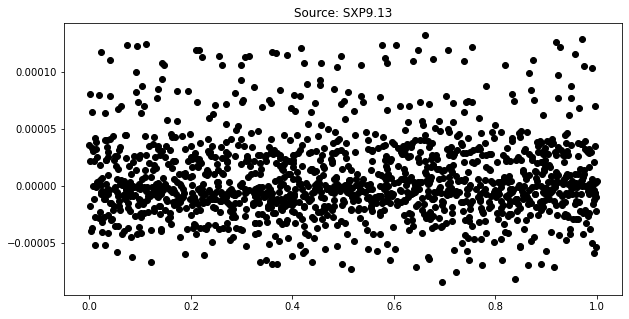

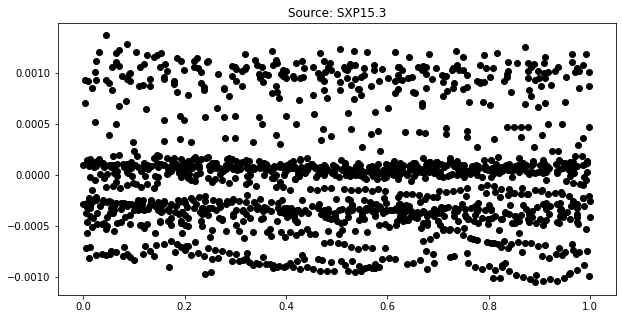

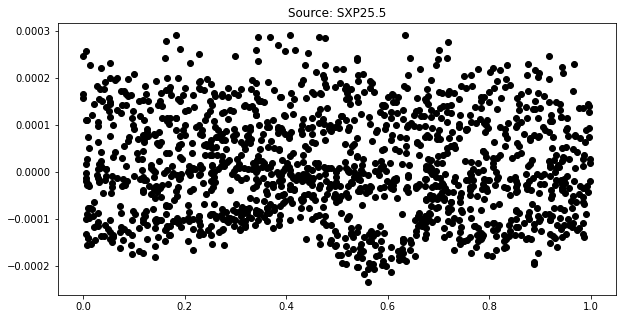

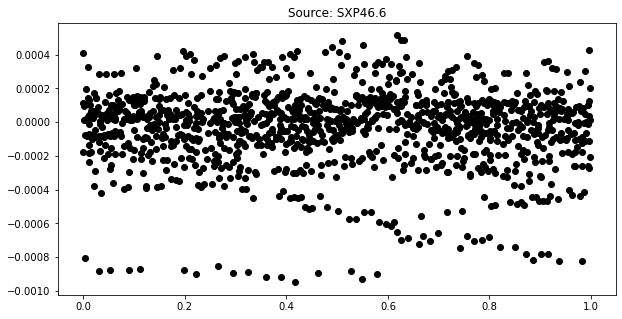

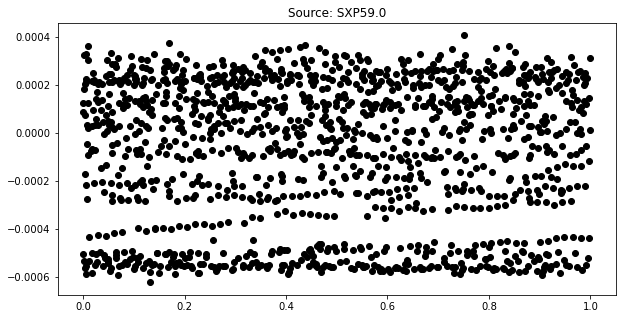

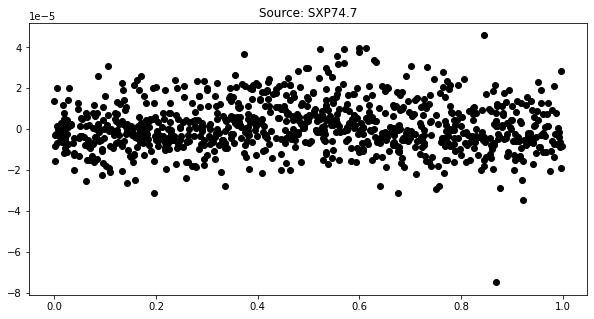

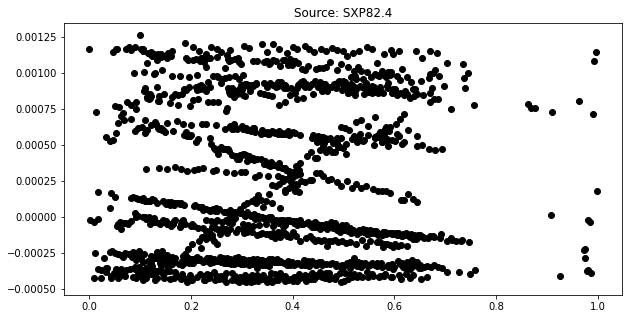

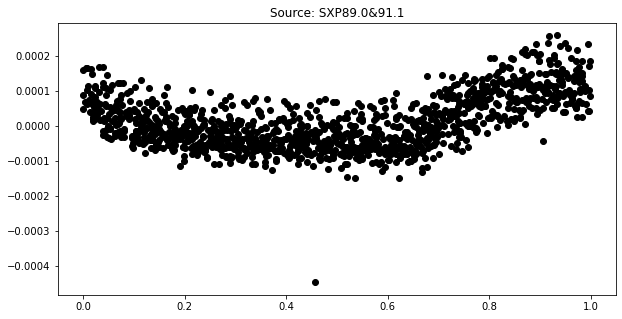

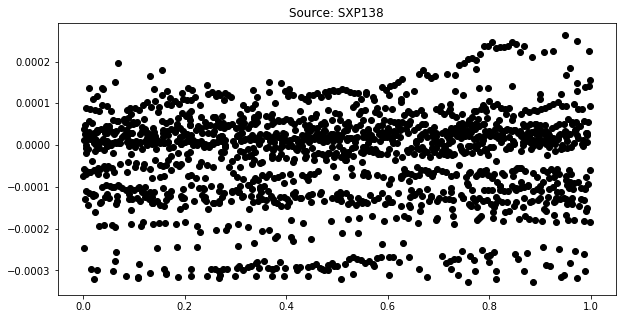

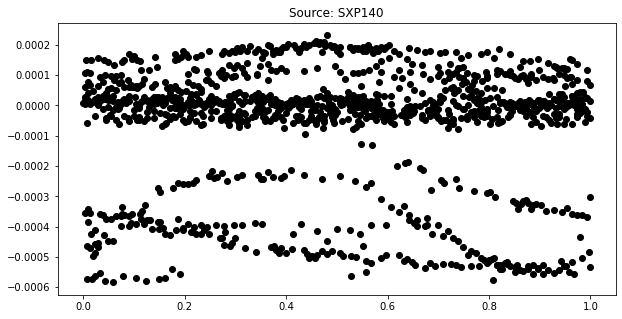

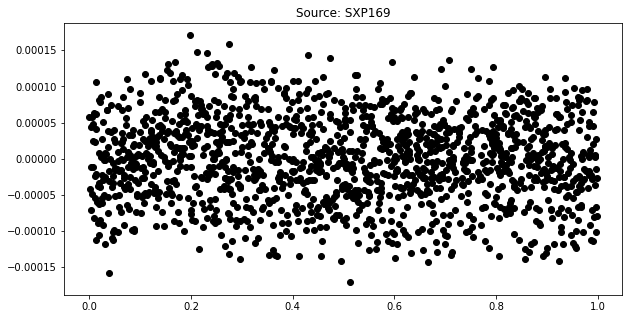

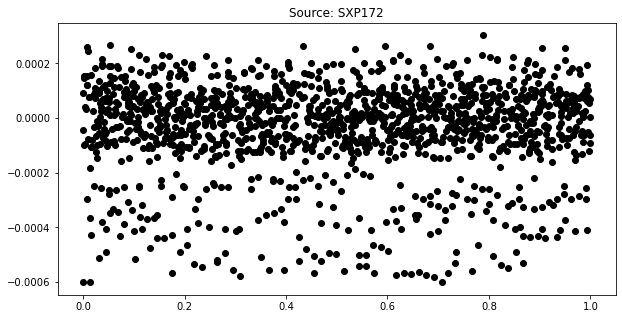

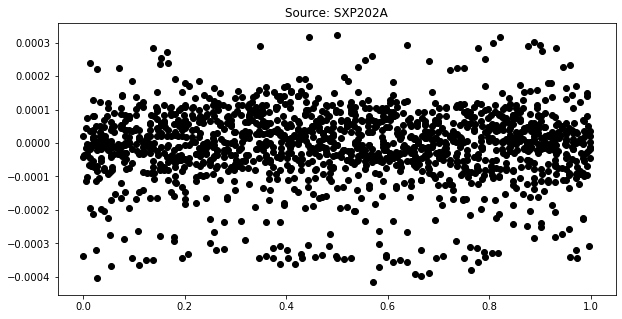

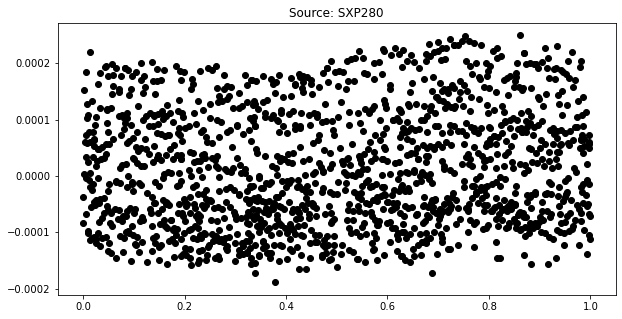

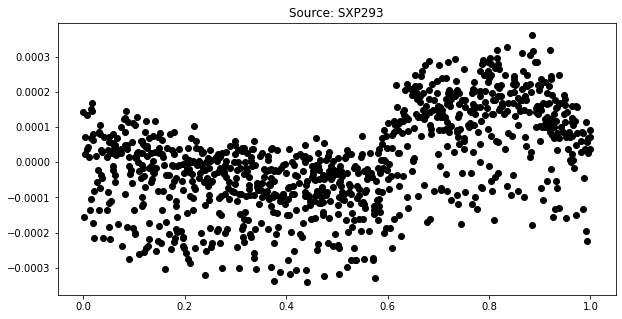

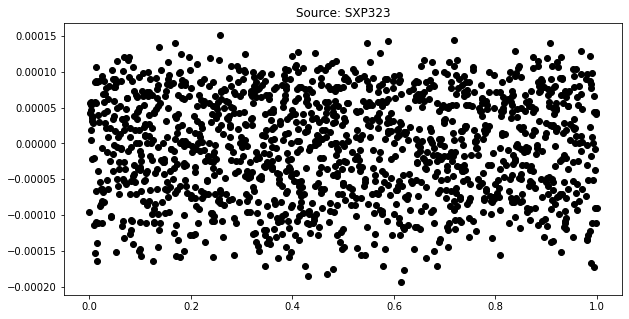

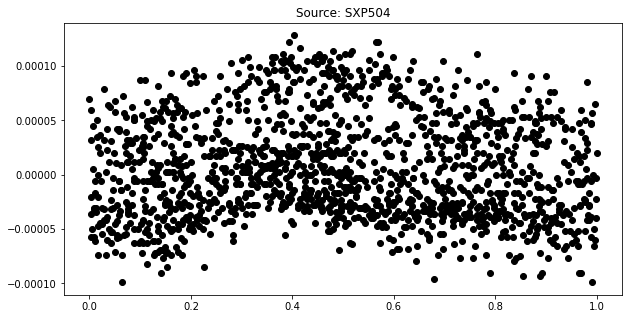

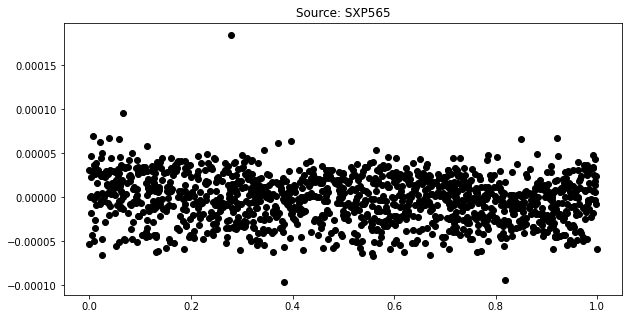

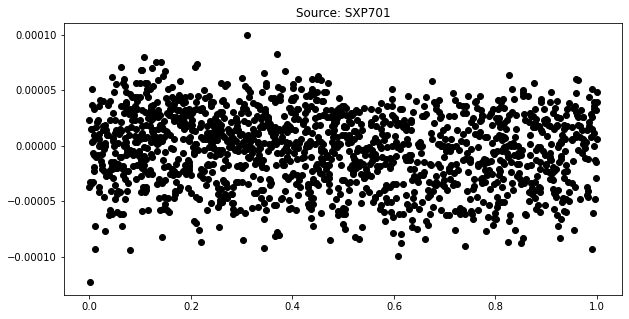

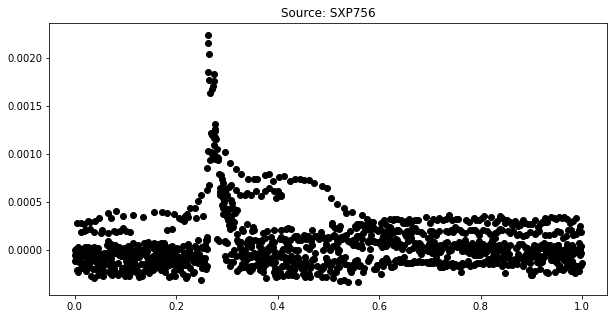

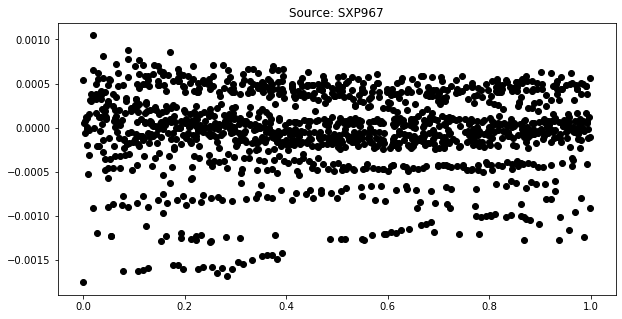

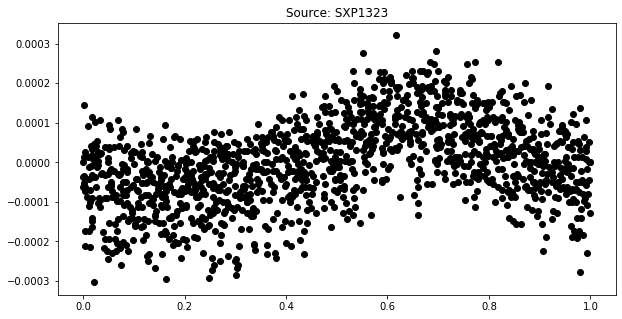

In [145]:
for source_?    RXTE pulsar – sky location unclear, source in names_period.iterrows():
    if len(source["file"])>0:
        data = np.loadtxt(data_path+"ogle_merge/"+source["file"], delimiter=",", dtype=float)
        #     plt.plot([2455081.5,2455081.5], np.array([np.min(data[:,1]), np.max(data[:,1])])*-1, color="r")
        data_df = pd.DataFrame({"ds": data[:,0],"y": data[:,1]})
#         data_df["ds"] = pd.to_datetime(data_df["ds"], origin="julian", unit="D")
        data_df["y"] = float(2430)*10**(-1.0*data[:,1]/2.5)
        data_df["y"][data_df["ds"]<2455081.5] = data_df["y"][data_df["ds"]<2455081.5]- np.median(data_df["y"][data_df["ds"]<2455081.5])
        data_df["y"][data_df["ds"]>2455081.5] = data_df["y"][data_df["ds"]>2455081.5]- np.median(data_df["y"][data_df["ds"]>2455081.5])
        
        foldTimes=(data_df["ds"]-data_df["ds"][0])/source["P_orb (d)"]
        foldTimes=foldTimes%1
        plt.scatter(foldTimes, data_df["y"], color="black")
    #     plt.axvline(2455081.5-data[:,0][0], color="r")
#         plt.gca().invert_yaxis()
        #     plt.ylim([10,20])
        plt.title("Source: {}".format(source["Object"]))
        # plt.ylim([-17,-13])
        plt.show()
    #     break
    
#     foldTimes=time/period# divide by period to convert to phase
#     foldTimes=foldTimes%1# take fractional part of phase only (i.e. discard whole number part)

In [ ]:
for source_index, source in names_period.iterrows():
    if len(source["file"])>0:
        data = np.loadtxt(data_path+"ogle_merge/"+source["file"], delimiter=",")
        #     plt.plot([2455081.5,2455081.5], np.array([np.min(data[:,1]), np.max(data[:,1])])*-1, color="r")
        foldTimes=(data[:,0]-data[:,0][0])/source["P_orb (d)"]
        foldTimes=foldTimes%1
        plt.errorbar(foldTimes, data[:,1], yerr=data[:,2], ecolor="black", fmt=" ")
    #     plt.axvline(2455081.5-data[:,0][0], color="r")
        plt.gca().invert_yaxis()
        #     plt.ylim([10,20])
        plt.title("Source: {}".format(source["Object"]))
        # plt.ylim([-17,-13])
        plt.show()
    #     break
    
#     foldTimes=time/period# divide by period to convert to phase
#     foldTimes=foldTimes%1# take fractional part of phase only (i.e. discard whole number part)

In [ ]:
# Photometry data files contain 5 columns: Hel.JD, I magnitude, magnitude error, seeing estimation (in pixels - 0.26"/pixel) and sky level

sources={}

data_path = "../"


for root, dirnames, filenames in os.walk(data_path+"/ogle4"):
    for filename in fnmatch.filter(filenames, "phot.dat"):
        source_name = root.split("/")[-1]
        lc_path_4 = os.path.join(root, filename)
        lc_path_3 = os.path.join(root.replace("ogle4", "ogle3"), filename)
        try:
            ogle3 = np.loadtxt(lc_path_3)
            ogle4 = np.loadtxt(lc_path_4)
            data = np.vstack((ogle3, ogle4))
            sources[root.split("/")[-1]] = len(data)
#             np.savetxt(data_path+"/ogle_merge/{}.csv".format(source_name), data, delimiter=",")
        except:
            pass

In [32]:
# Python
import pandas as pd
from fbprophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [41]:
data = np.loadtxt(data_path+"/ogle_merge/"+"sxp756.csv", delimiter=",")

In [42]:
data[0][0]

2452085.90914

<ErrorbarContainer object of 3 artists>

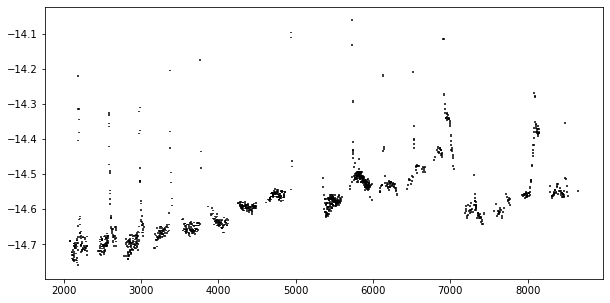

In [44]:
plt.errorbar(data[:,0]-2450000, data[:,1]*-1, yerr=data[:,2], ecolor="black", fmt=" ")

In [40]:
2452086.92527 - 2440000.5

12086.425270000007

In [ ]:
# ogle date is HJD
#data[0][0] - 2440000.5 #+0.5-10000 # need to subtract 9999.5 from TJD to get Tony's first timestamp for SXP2.37 (data[0][0] is 2452086.92527)
# 2086.9 TJD is 08-02-1974, 12086.4 is 26-06-2001
# it's actually AJD - 2450000
# TJD=Floor [ JD[mo,day,yr] ] - 2440000.5
data[0][0] - 2450000

In [353]:
data = np.loadtxt(data_path+"ogle_merged/"+"sxp91.1.csv", delimiter=",") # "rx-j0052.1-7319.csv"

In [354]:
data_df = pd.DataFrame({"ds": data[:,0],"y": data[:,1]})
data_df["ds"] = pd.to_datetime(data_df["ds"], origin="julian", unit="D")
data_df["y"] = float(2430)*10**(-1.0*data_df["y"]/2.5)
# data_df["y"][data_df["ds"]<"2010-01-01"] = data_df["y"][data_df["ds"]<"2010-01-01"]- np.median(data_df["y"][data_df["ds"]<"2010-01-01"])
# data_df["y"][data_df["ds"]>"2010-01-01"] = data_df["y"][data_df["ds"]>"2010-01-01"]- np.median(data_df["y"][data_df["ds"]>"2010-01-01"])
# data_df["y"] = data_df["y"]+15

In [355]:
# Python
m = Prophet(
    growth='linear',
    changepoints=None,
    n_changepoints=25,
    changepoint_range=0.8,
    yearly_seasonality=False,
    weekly_seasonality=False,
    daily_seasonality=False,
    holidays=None,
    seasonality_mode='additive',
    seasonality_prior_scale=10.0,
    holidays_prior_scale=10.0,
    changepoint_prior_scale=0.05,
    mcmc_samples=0,
    interval_width=0.8,
    uncertainty_samples=1000,
    stan_backend=None,
) #"07-09-2009"
m.add_seasonality(name='orbital', period=88.4, fourier_order=5)
m.fit(data_df)

In [356]:
# future = m.make_future_dataframe(periods=1)
# future.tail()

In [357]:
forecast = m.predict(pd.DataFrame(data_df["ds"]))
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds      yhat  yhat_lower  yhat_upper
1270 2019-12-27 01:27:08.928  0.003141    0.003104    0.003173
1271 2019-12-31 02:14:15.936  0.003145    0.003109    0.003184
1272 2020-01-09 01:52:08.832  0.003143    0.003104    0.003181
1273 2020-01-14 02:11:13.632  0.003159    0.003122    0.003195
1274 2020-01-21 01:45:21.024  0.003222    0.003187    0.003260

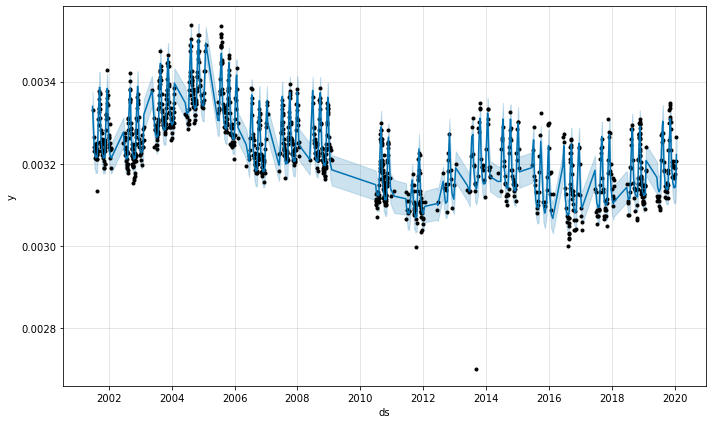

In [358]:
fig1 = m.plot(forecast)

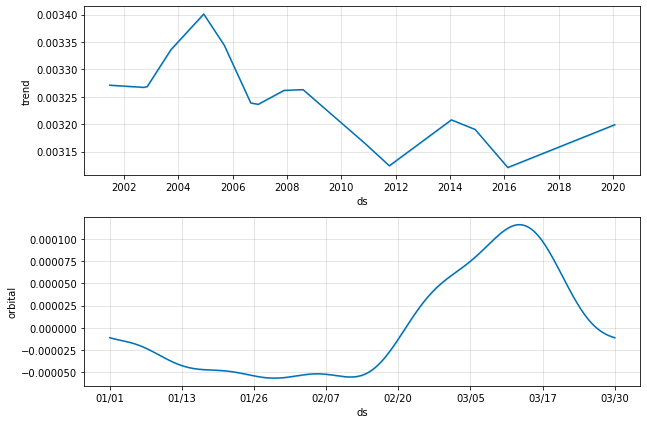

In [359]:
fig = m.plot_components(forecast)

In [360]:
forecast['trend'].values.shape

(1275,)

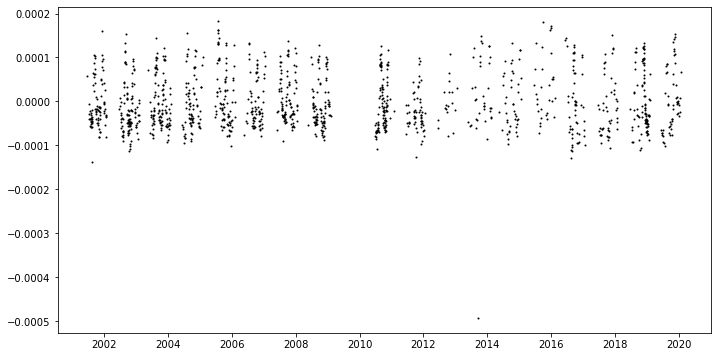

In [361]:
plt.scatter(data_df["ds"].values,data_df["y"].values-forecast['trend'].values, s=1, c="black")
plt.show()

In [362]:
print(forecast['trend'])

0       0.003271
1       0.003271
2       0.003271
3       0.003271
4       0.003271
          ...   
1270    0.003198
1271    0.003198
1272    0.003198
1273    0.003199
1274    0.003199
Name: trend, Length: 1275, dtype: float64


Init signature:
Prophet(
    growth='linear',
    changepoints=None,
    n_changepoints=25,
    changepoint_range=0.8,
    yearly_seasonality='auto',
    weekly_seasonality='auto',
    daily_seasonality='auto',
    holidays=None,
    seasonality_mode='additive',
    seasonality_prior_scale=10.0,
    holidays_prior_scale=10.0,
    changepoint_prior_scale=0.05,
    mcmc_samples=0,
    interval_width=0.8,
    uncertainty_samples=1000,
    stan_backend=None,
)
Docstring:     
Prophet forecaster.

Parameters
----------
growth: String 'linear' or 'logistic' to specify a linear or logistic
    trend.
changepoints: List of dates at which to include potential changepoints. If
    not specified, potential changepoints are selected automatically.
n_changepoints: Number of potential changepoints to include. Not used
    if input `changepoints` is supplied. If `changepoints` is not supplied,
    then n_changepoints potential changepoints are selected uniformly from
    the first `changepoint_range` proportion of the history.
changepoint_range: Proportion of history in which trend changepoints will
    be estimated. Defaults to 0.8 for the first 80%. Not used if
    `changepoints` is specified.
yearly_seasonality: Fit yearly seasonality.
    Can be 'auto', True, False, or a number of Fourier terms to generate.
weekly_seasonality: Fit weekly seasonality.
    Can be 'auto', True, False, or a number of Fourier terms to generate.
daily_seasonality: Fit daily seasonality.
    Can be 'auto', True, False, or a number of Fourier terms to generate.
holidays: pd.DataFrame with columns holiday (string) and ds (date type)
    and optionally columns lower_window and upper_window which specify a
    range of days around the date to be included as holidays.
    lower_window=-2 will include 2 days prior to the date as holidays. Also
    optionally can have a column prior_scale specifying the prior scale for
    that holiday.
seasonality_mode: 'additive' (default) or 'multiplicative'.
seasonality_prior_scale: Parameter modulating the strength of the
    seasonality model. Larger values allow the model to fit larger seasonal
    fluctuations, smaller values dampen the seasonality. Can be specified
    for individual seasonalities using add_seasonality.
holidays_prior_scale: Parameter modulating the strength of the holiday
    components model, unless overridden in the holidays input.
changepoint_prior_scale: Parameter modulating the flexibility of the
    automatic changepoint selection. Large values will allow many
    changepoints, small values will allow few changepoints.
mcmc_samples: Integer, if greater than 0, will do full Bayesian inference
    with the specified number of MCMC samples. If 0, will do MAP
    estimation.
interval_width: Float, width of the uncertainty intervals provided
    for the forecast. If mcmc_samples=0, this will be only the uncertainty
    in the trend using the MAP estimate of the extrapolated generative
    model. If mcmc.samples>0, this will be integrated over all model
    parameters, which will include uncertainty in seasonality.
uncertainty_samples: Number of simulated draws used to estimate
    uncertainty intervals. Settings this value to 0 or False will disable
    uncertainty estimation and speed up the calculation.
stan_backend: str as defined in StanBackendEnum default: None - will try to
    iterate over all available backends and find the working one
File:           ~/anaconda3/envs/py38/lib/python3.8/site-packages/fbprophet/forecaster.py
Type:           type
Subclasses:     

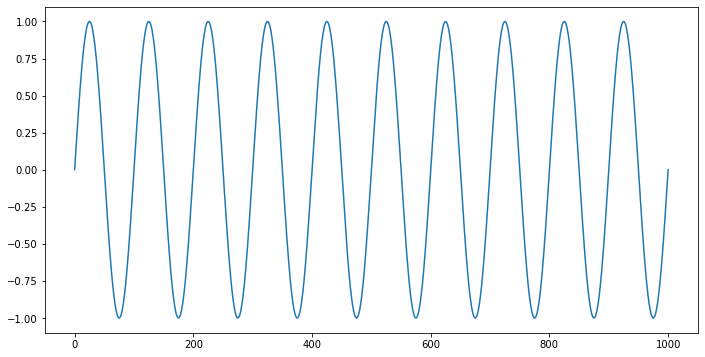

In [443]:
x = np.linspace(0,1000,num=1000)
period = 100
f=1/period
y = np.sin(x*f*np.pi*2)
show=int(len(x))
plt.plot(x[:show],y[:show])
plt.show()

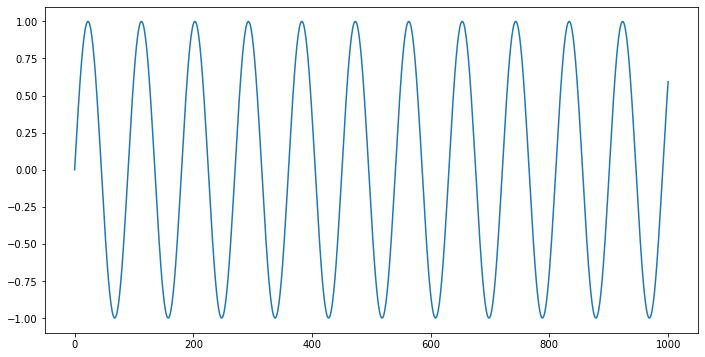

In [902]:
x = np.linspace(0,1000,num=1000)
period = 0.99
f=1/period
y = np.sin(x*f*np.pi*2)
show=int(len(x))
plt.plot(x[:show],y[:show])
plt.show()

In [901]:
0.98

0.98

In [543]:
1000/0.22*2

9090.90909090909

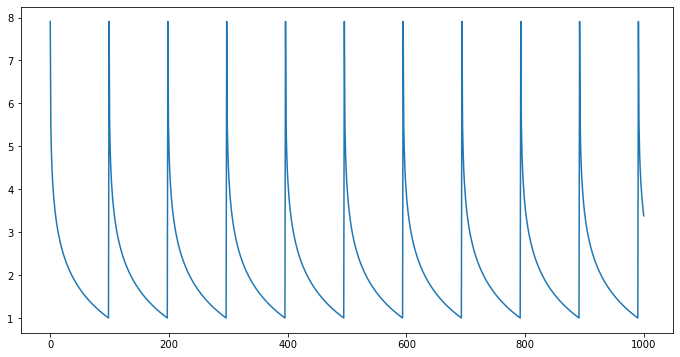

In [899]:
x = np.linspace(0,1000,num=1000)
period = 0.99
f=1/period
log_fix = 0.001
y = np.ones(len(x))-np.log((np.arange(len(x))%period)/period+log_fix)
show=int(len(x)/1)
plt.plot(x[:show],y[:show])
plt.show()

In [ ]:
Signature:
libwwz.wwt(
    timestamps: numpy.ndarray,
    magnitudes: numpy.ndarray,
    time_divisions: int,
    freq_params: list,
    decay_constant: float,
    method: str = 'linear',
    parallel: bool = True,
) -> numpy.ndarray
Docstring:
The code is based on G. Foster's FORTRAN
code as well as eaydin's python 2.7 code. The code is updated to use numpy methods and allow for float value tau.
It returns an array with matrix of new evenly spaced timestamps, frequencies, wwz-power, amplitude, coefficients,
and effective number. Specific equations can be found on Grant Foster's "WAVELETS FOR PERIOD ANALYSIS OF UNEVENLY
SAMPLED TIME SERIES". Some of the equations are labeled in the code with corresponding numbers.

:param timestamps: An array with corresponding times for the magnitude (payload).
:param magnitudes: An array with payload values
:param time_divisions: number of divisions for the new timestamps
:param freq_params: A list containing parameters for making frequency bands to analyze over with given 'method'
        'linear' -> [freq_low, freq_high, freq_step, override]
        'octave' -> [freq_tg, freq_low, freq_high, band_order, log_scale_base, override]
:param decay_constant: decay constant for the Morlet wavelet (should be <0.02) eq. 1-2
        c = 1/(2w), the wavelet decays significantly after a single cycle of 2 * pi / w
:param method: determines method of creating freq ('linear', 'octave') default 'linear'
:param parallel: boolean indicate to use parallel processing or not
:return: Tau, Freq, WWZ, AMP, COEF, NEFF in a numpy array
File:      ~/anaconda3/envs/py38/lib/python3.8/site-packages/libwwz/wwz.py
Type:      function

In [548]:
import libwwz

wwz_result = libwwz.wwt(timestamps = x, magnitudes =y)

TypeError: wwt() missing 3 required positional arguments: 'time_divisions', 'freq_params', and 'decay_constant'

In [720]:
data_df = pd.DataFrame({"ds": data[:,0],"y": data[:,1]})
# data_df["ds"] = pd.to_datetime(data_df["ds"], origin="julian", unit="D")
# data_df["y"] = float(2430)*10**(-1.0*data_df["y"]/2.5)

In [562]:
data_df["ds"].values#,detrended["y"]

array([2452086.89595, 2452103.90274, 2452105.93288, ..., 2458857.57788,
       2458862.59113, 2458869.57316])

In [568]:
detrended["y"].values

array([ 5.82762224e-05, -5.32860688e-06, -2.92830741e-05, ...,
       -4.70145943e-05, -1.55965579e-05,  4.27565888e-05])

# wavelet WWZ

Source: SXP89.0&91.1 prophet model Period: 88.37


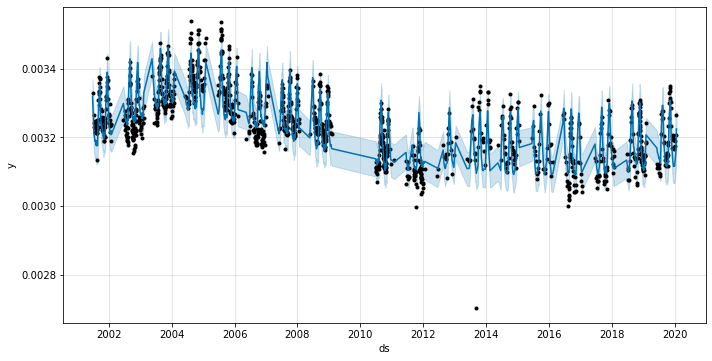

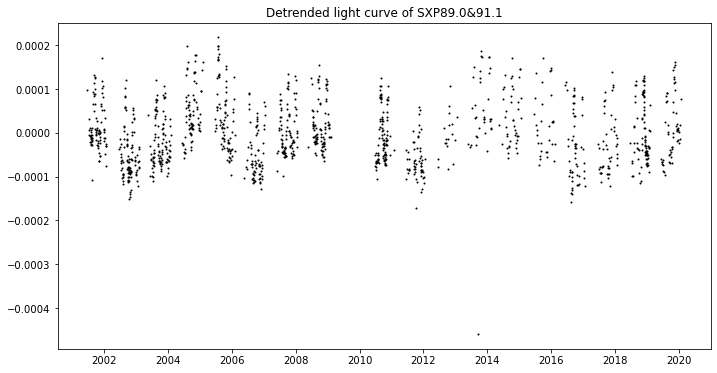

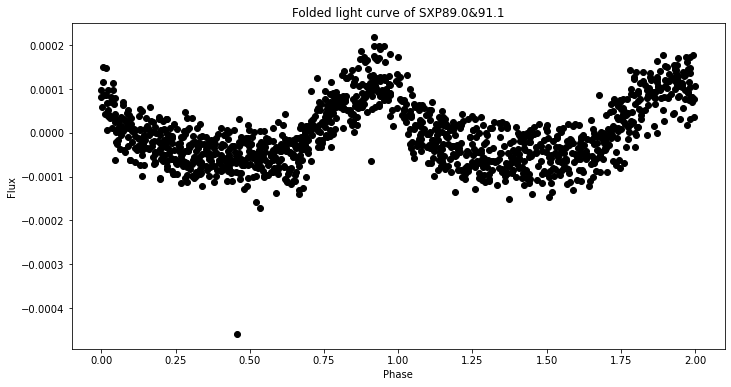

In [1004]:
plt.rcParams['figure.figsize'] = (11.7, 6.0)
source = names_period.iloc[18,:]
    
if len(source["file"])>0:
    data = np.loadtxt(data_path+"ogle_merged/"+source["file"], delimiter=",", dtype=float)
    #     plt.plot([2455081.5,2455081.5], np.array([np.min(data[:,1]), np.max(data[:,1])])*-1, color="r")
    data_df = pd.DataFrame({"ds": data[:,0],"y": data[:,1]})

    data_df = pd.DataFrame({"ds": data[:,0],"y": data[:,1]})
    data_df["ds"] = pd.to_datetime(data_df["ds"], origin="julian", unit="D")
    data_df["y"] = float(2430)*10**(-1.0*data_df["y"]/2.5)

    # fit prophet model with orbital periodicity component
    m = Prophet(
        growth='linear',
        changepoints=None,
        n_changepoints=5,
        changepoint_range=0.99,
        yearly_seasonality=False,
        weekly_seasonality=False,
        daily_seasonality=False,
        holidays=None,
        seasonality_mode='additive',
        seasonality_prior_scale=10.0,
        holidays_prior_scale=10.0,
        changepoint_prior_scale=0.05,
        mcmc_samples=0,
        interval_width=0.8,
        uncertainty_samples=1000,
        stan_backend=None,
    ) #"07-09-2009"
    m.add_seasonality(name='orbital', period=source["P_orb (d)"], fourier_order=15)
    m.add_seasonality(name='super-orbital', period=267, fourier_order=5)
    m.fit(data_df)

    forecast = m.predict(pd.DataFrame(data_df["ds"]))
    forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

    # plot data with prophet model
    print("Source: {}".format(source["Object"]) + " prophet model" + " Period: {}".format(source["P_orb (d)"]))
    fig1 = m.plot(forecast)
    fig = plt.gcf()
    fig.set_size_inches(10,5)
    plt.show()
    # plot data with trend subtracted
    detrended = data_df.copy(deep=True)
    detrended["y"] = data_df["y"].values-forecast['trend'].values
    plt.scatter(data_df["ds"].values,detrended["y"], s=1, c="black")
    plt.title("Detrended light curve of {}".format(source["Object"]))
    plt.show()

#         data_df["ds"] = pd.to_datetime(data_df["ds"], origin="julian", unit="D")
#         data_df["y"] = float(2430)*10**(-1.0*data[:,1]/2.5)
#         data_df["y"][data_df["ds"]<2455081.5] = data_df["y"][data_df["ds"]<2455081.5]- np.median(data_df["y"][data_df["ds"]<2455081.5])
#         data_df["y"][data_df["ds"]>2455081.5] = data_df["y"][data_df["ds"]>2455081.5]- np.median(data_df["y"][data_df["ds"]>2455081.5])

    # fold detrended lightcurve
    foldTimes=(data[:,0]-data[:,0][0])/source["P_orb (d)"]
    foldTimes=foldTimes%2
    plt.scatter(foldTimes, detrended["y"], color="black")
#     plt.axvline(2455081.5-data[:,0][0], color="r")
#         plt.gca().invert_yaxis()
    #     plt.ylim([10,20])
    plt.xlabel("Phase")
    plt.ylabel("Flux")
    plt.title("Folded light curve of {}".format(source["Object"]))
    # plt.ylim([-17,-13])
    plt.show()
#     break

#     foldTimes=time/period# divide by period to convert to phase
#     foldTimes=foldTimes%1# take fractional part of phase only (i.e. discard whole number part)

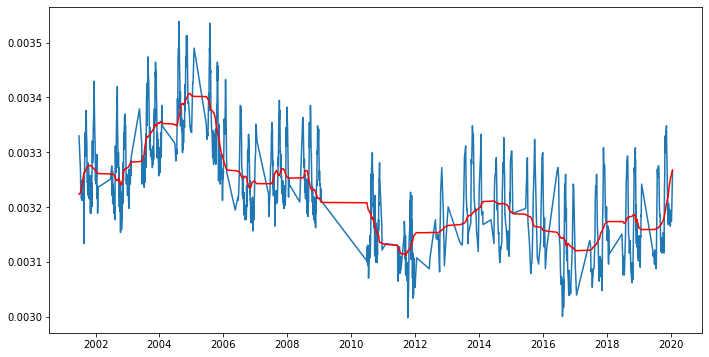

In [1024]:
import scipy.signal
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(1)
# data_df["y"] = float(2430)*10**(-1.0*data_df["y"]/2.5)

yhat = scipy.signal.savgol_filter(yss, 181, 3) # window size 51, polynomial order 3

plt.plot(xss,yss)
plt.plot(xss,yhat, color='red')
plt.show()

In [966]:
# Select the size for the newly generated timestamps (tau), it should be less than the length of the given data.
# This will also limit the minimum possible frequecny
ntau = 600

# Set the low and high frequency bounds and steps to iterate 
frequency_low = 1/20
frequency_high = 1/4
frequency_steps = np.linspace(frequency_low, frequency_high, num=100)
frequency_steps = frequency_steps[1]-frequency_steps[0]

# Set the override to False (Setting to True will ignore the low and high frequency limitations)
override = False

# gather the frequency parameters into a list [freq_low, freq_high, freq_step, override]
frequency_parameters = [frequency_low, frequency_high, frequency_steps, override]

# We will then select the decay constant for our analyzing wavelet (should be < 0.2), where c = 1/(2*w^2) 
# The analyzing wavelet decays significantly in a single cycle 2*pi/w, where w = 2*pi*f
f = 10     # we choose 4 since our signal of interest is at 4 hz
w = 2 * np.pi * f
decay_constant = 1/(2*w**2)

# Finally, we select to wether to run with parallization (recommend True)
parallel = True

In [967]:
data_df = pd.DataFrame({"ds": data[:,0],"y": data[:,1]})
data_df["y"] = float(2430)*10**(-1.0*data_df["y"]/2.5)

# Using the above settings, we will now compute the WWZ/WWA for the full timeseries and removed timeseries
wwt_sxp89 = libwwz.wwt(timestamps=data_df["ds"].values,
                     magnitudes=detrended["y"].values,
                     time_divisions=ntau,
                     freq_params=frequency_parameters,
                     decay_constant=decay_constant,
                     method='linear',
                     parallel=parallel)

*** Starting Weighted Wavelet Z-transform ***

Pseudo sample frequency (median) is  0.493
largest tau window is  11.323
35.23 seconds has passed to complete Weighted Wavelet Z-transform 



In [974]:
detrended["y"].values[921:]

array([-4.58904014e-04,  1.09132751e-05,  1.26957060e-04,  1.17940265e-04,
        1.42236379e-04,  1.88240683e-04,  1.75981015e-04,  1.73003191e-04,
        5.25857451e-05,  3.20894477e-05,  3.21164269e-05,  3.80270058e-05,
        2.63486574e-05,  1.17796080e-07, -4.00914146e-05,  7.71022063e-05,
        1.37476272e-04,  1.74148826e-04,  1.74162270e-04,  1.49735438e-04,
        3.30622481e-05,  2.72149073e-05,  3.32484670e-05,  1.27511040e-05,
        9.85841654e-06,  1.98419218e-05, -2.33063259e-05,  7.94254226e-05,
        1.00422881e-04,  1.06533970e-04,  1.33800919e-04,  3.83660245e-05,
        5.02367479e-05,  1.50472816e-05, -5.26495713e-06, -2.30894333e-06,
       -3.40445373e-05, -4.54841714e-05, -5.68424397e-05, -2.80355424e-05,
       -3.08619993e-05, -1.63196393e-05,  7.16797408e-05,  8.66287302e-05,
        1.25732290e-04,  1.07730571e-04,  1.71508153e-04,  1.31954561e-04,
        1.01898620e-04,  3.07350829e-05,  3.07745975e-05,  1.62052554e-05,
        7.56065781e-06, -

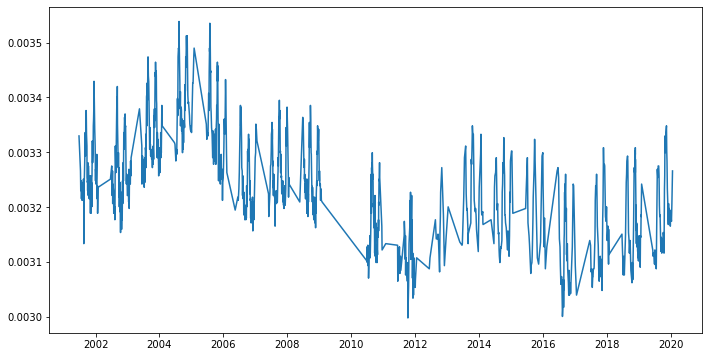

In [1018]:
yss = np.concatenate((data_df["y"][:921], data_df["y"][922:]))
xss = np.concatenate((data_df["ds"].values[:921], data_df["ds"].values[922:]))
plt.plot(xss, yss)
plt.show()

In [981]:
xss.shape

(1274,)

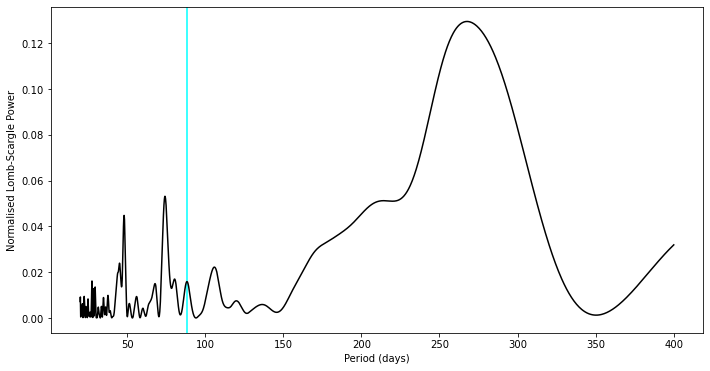

In [999]:
f = np.linspace(1/400, 1/20, 10000)

pgram = signal.lombscargle(xss, yss, f, normalize=True)

plt.subplot(1, 1, 1)
plt.axvline(x=88.37, c="cyan")
plt.plot(1/f, pgram, c="black")
plt.xlabel("Period (days)")
plt.ylabel("Normalised Lomb-Scargle Power")
plt.show()

In [1001]:
1/f[np.argmax(pgram)]

267.7287636387978

In [976]:
data_df = pd.DataFrame({"ds": data[:,0],"y": data[:,1]})
data_df["y"] = float(2430)*10**(-1.0*data_df["y"]/2.5)

# Using the above settings, we will now compute the WWZ/WWA for the full timeseries and removed timeseries
wwt_sxp89 = libwwz.wwt(timestamps=xss,
                     magnitudes=detrended["y"].values,
                     time_divisions=ntau,
                     freq_params=frequency_parameters,
                     decay_constant=decay_constant,
                     method='linear',
                     parallel=parallel)

*** Starting Weighted Wavelet Z-transform ***

Pseudo sample frequency (median) is  0.493
largest tau window is  11.323
35.45 seconds has passed to complete Weighted Wavelet Z-transform 



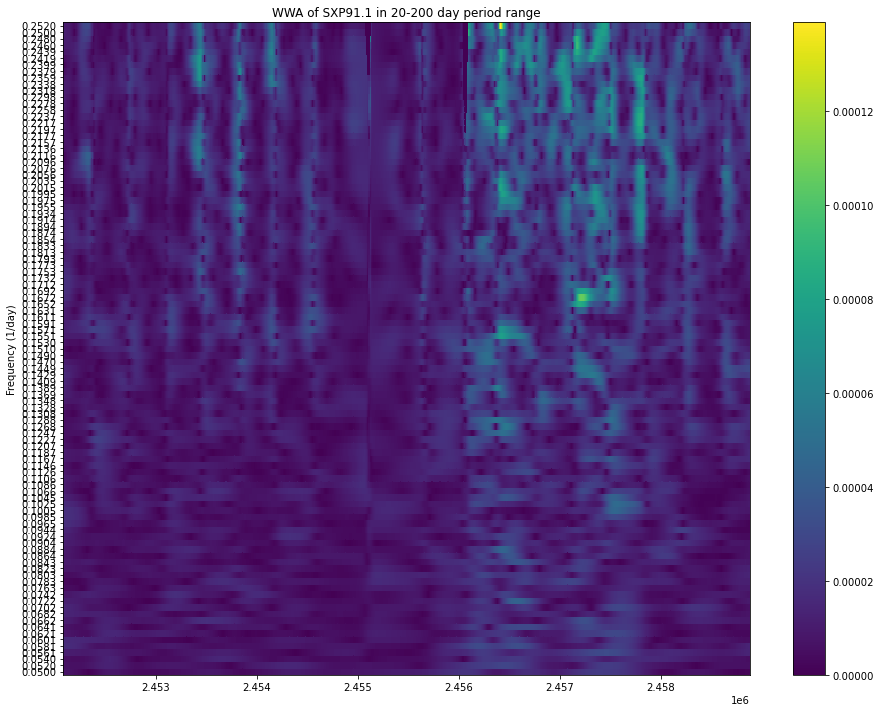

In [977]:
import libwwz.plot_methods as libplot

#1000 freq steps

# Next we will look at WWA for both full and removed data...
# WWA is better at discerning the amplitudes of the signal

fig, ax = plt.subplots(nrows=1, sharex=False, figsize=[13, 10])

libplot.linear_plotter(ax=ax,
                       TAU=wwt_sxp89[0],
                       FREQ=wwt_sxp89[1],
                       DATA=wwt_sxp89[3])
ax.set_ylabel('Frequency (1/day)')
ax.set_title('WWA of SXP91.1 in 20-200 day period range')

plt.tight_layout()

In [959]:
1/14.07

0.0710732054015636

In [862]:
data_df

ds         y
0    2001-06-26 09:30:10.080000000  0.003330
1    2001-07-13 09:39:56.736000000  0.003266
2    2001-07-15 10:23:20.832000000  0.003242
3    2001-07-16 09:33:51.263999999  0.003230
4    2001-07-22 08:25:17.760000000  0.003248
...                            ...       ...
1270 2019-12-27 01:27:08.928000000  0.003165
1271 2019-12-31 02:14:15.936000000  0.003189
1272 2020-01-09 01:52:08.832000000  0.003174
1273 2020-01-14 02:11:13.632000000  0.003206
1274 2020-01-21 01:45:21.024000000  0.003266

[1275 rows x 2 columns]

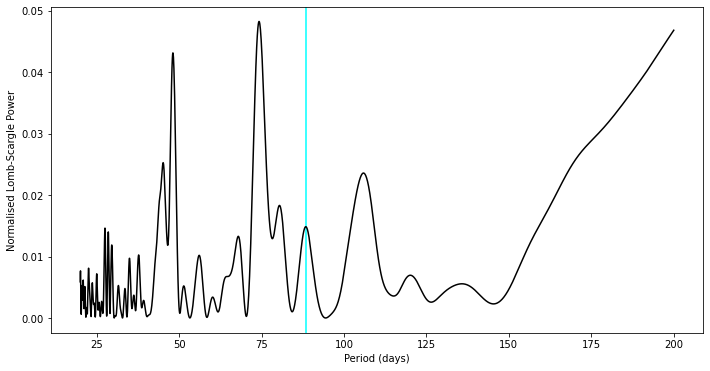

In [955]:
f = np.linspace(1/200, 1/20, 10000)

data_df = pd.DataFrame({"ds": data[:,0],"y": data[:,1]})
data_df["y"] = float(2430)*10**(-1.0*data_df["y"]/2.5)


import scipy.signal as signal
pgram = signal.lombscargle(data_df["ds"].values, detrended["y"].values, f, normalize=True)

plt.subplot(1, 1, 1)
plt.axvline(x=88.37, c="cyan")
plt.plot(1/f, pgram, c="black")
plt.xlabel("Period (days)")
plt.ylabel("Normalised Lomb-Scargle Power")
plt.show()

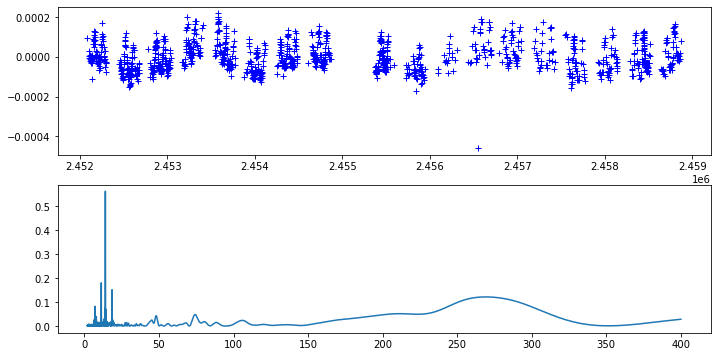

In [931]:
plt.rcParams['figure.figsize'] = (11.7, 6.0)

plt.subplot(2, 1, 1)
plt.plot(data_df["ds"].values, detrended["y"].values, 'b+')

plt.subplot(2, 1, 2)
plt.plot(1/f, pgram)
plt.show()



In [880]:
1/f[np.argsort(pgram)][-20:]

array([11.32790484, 14.15141404, 13.97430567, 14.141457  , 13.98402864,
       14.13151395, 13.99376515, 14.12158488, 14.00351523, 14.11166975,
       14.01327891, 14.10176854, 14.02305621, 14.09188121, 14.03284716,
       14.08200773, 14.0426518 , 14.05247014, 14.07214808, 14.06230223])

In [919]:
forecast['high power'].values.shape

(1275,)

In [921]:
forecast

ds     trend  yhat_lower  yhat_upper  \
0    2001-06-26 09:30:10.080000000  0.003234    0.003268    0.003373   
1    2001-07-13 09:39:56.736000000  0.003236    0.003171    0.003272   
2    2001-07-15 10:23:20.832000000  0.003237    0.003153    0.003255   
3    2001-07-16 09:33:51.263999999  0.003237    0.003158    0.003264   
4    2001-07-22 08:25:17.760000000  0.003238    0.003137    0.003244   
...                            ...       ...         ...         ...   
1270 2019-12-27 01:27:08.928000000  0.003185    0.003070    0.003177   
1271 2019-12-31 02:14:15.936000000  0.003186    0.003080    0.003181   
1272 2020-01-09 01:52:08.832000000  0.003186    0.003084    0.003184   
1273 2020-01-14 02:11:13.632000000  0.003186    0.003101    0.003207   
1274 2020-01-21 01:45:21.024000000  0.003186    0.003162    0.003266   

      trend_lower  trend_upper  additive_terms  additive_terms_lower  \
0        0.003234     0.003234        0.000087              0.000087   
1        0.003236     0.003236       -0.000017             -0.000017   
2        0.003237     0.003237       -0.000034             -0.000034   
3        0.003237     0.003237       -0.000029             -0.000029   
4        0.003238     0.003238       -0.000048             -0.000048   
...           ...          ...             ...                   ...   
1270     0.003185     0.003185       -0.000063             -0.000063   
1271     0.003186     0.003186       -0.000052             -0.000052   
1272     0.003186     0.003186       -0.000049             -0.000049   
1273     0.003186     0.003186       -0.000032             -0.000032   
1274     0.003186     0.003186        0.000029              0.000029   

      additive_terms_upper  high power  high power_lower  high power_upper  \
0                 0.000087    0.000002          0.000002          0.000002   
1                -0.000017    0.000006          0.000006          0.000006   
2                -0.000034   -0.000003         -0.000003         -0.000003   
3                -0.000029    0.000005          0.000005          0.000005   
4                -0.000048    0.000001          0.000001          0.000001   
...                    ...         ...               ...               ...   
1270             -0.000063   -0.000005         -0.000005         -0.000005   
1271             -0.000052    0.000001          0.000001          0.000001   
1272             -0.000049    0.000003          0.000003          0.000003   
1273             -0.000032    0.000001          0.000001          0.000001   
1274              0.000029   -0.000004         -0.000004         -0.000004   

       orbital  orbital_lower  orbital_upper  multiplicative_terms  \
0     0.000085       0.000085       0.000085                   0.0   
1    -0.000024      -0.000024      -0.000024                   0.0   
2    -0.000030      -0.000030      -0.000030                   0.0   
3    -0.000034      -0.000034      -0.000034                   0.0   
4    -0.000049      -0.000049      -0.000049                   0.0   
...        ...            ...            ...                   ...   
1270 -0.000058      -0.000058      -0.000058                   0.0   
1271 -0.000054      -0.000054      -0.000054                   0.0   
1272 -0.000052      -0.000052      -0.000052                   0.0   
1273 -0.000033      -0.000033      -0.000033                   0.0   
1274  0.000033       0.000033       0.000033                   0.0   

      multiplicative_terms_lower  multiplicative_terms_upper      yhat  
0                            0.0                         0.0  0.003321  
1                            0.0                         0.0  0.003219  
2                            0.0                         0.0  0.003203  
3                            0.0                         0.0  0.003208  
4                            0.0                         0.0  0.003190  
...                          ...                         ...       ...  
1270         

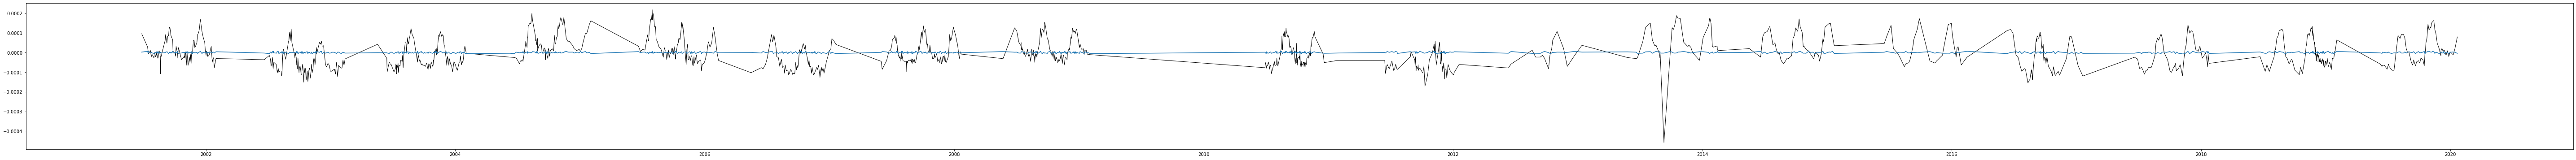

In [925]:
plt.rcParams['figure.figsize'] = (101.7, 6.0)
plt.plot(data_df["ds"].values,detrended["y"], lw=1, c="black")
plt.plot(data_df["ds"].values,forecast['high power'].values)
plt.show()

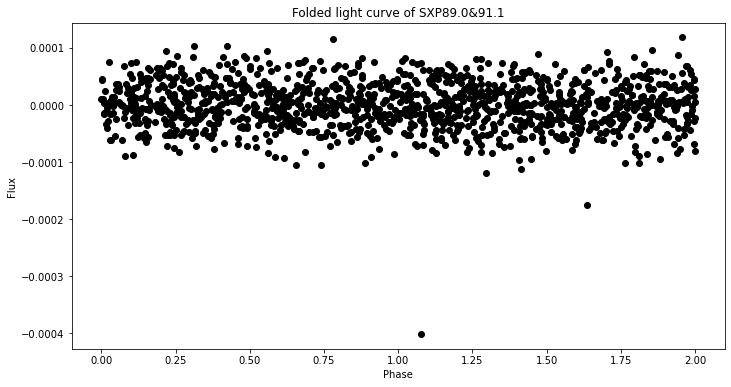

In [924]:
# fold detrended lightcurve
plt.rcParams['figure.figsize'] = (11.7, 6.0)

foldTimes=(data[:,0]-data[:,0][0])/14.06230223#source["P_orb (d)"]
foldTimes=foldTimes%2
plt.scatter(foldTimes, detrended["y"]-forecast['orbital'], color="black")
#     plt.axvline(2455081.5-data[:,0][0], color="r")
#         plt.gca().invert_yaxis()
#     plt.ylim([10,20])
plt.xlabel("Phase")
plt.ylabel("Flux")
plt.title("Folded light curve of {}".format(source["Object"]))
# plt.ylim([-17,-13])
plt.show()
#     break

#     foldTimes=time/period# divide by period to convert to phase
#     foldTimes=foldTimes%1# take fractional part of phase only (i.e. discard whole number part)

Source: SXP89.0&91.1 prophet model Period: 88.37


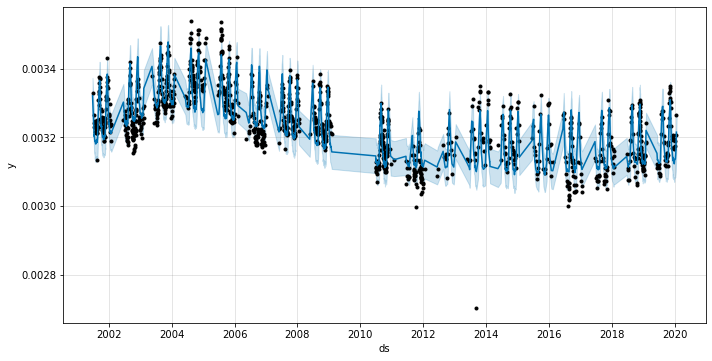

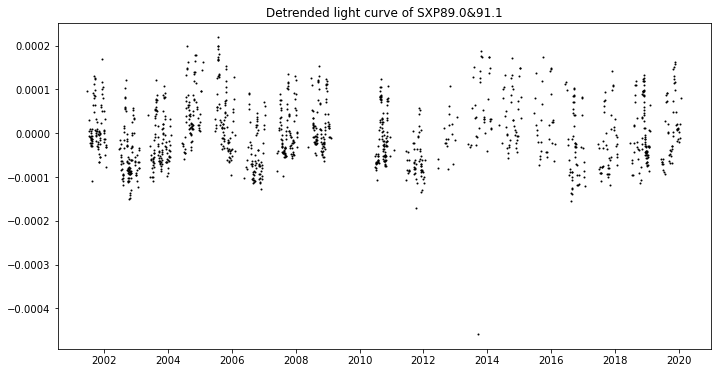

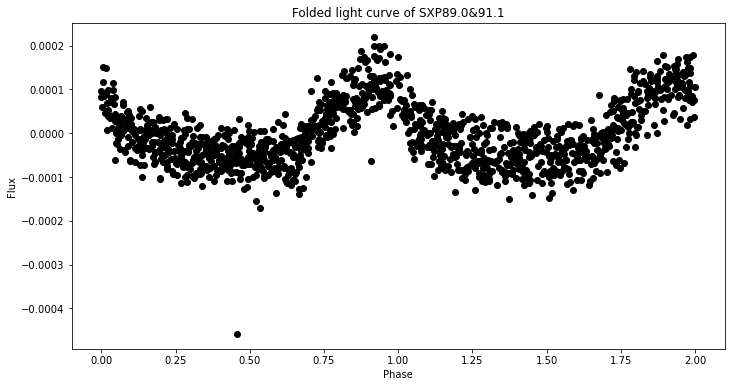

In [914]:
plt.rcParams['figure.figsize'] = (11.7, 6.0)
source = names_period.iloc[18,:]
    
if len(source["file"])>0:
    data = np.loadtxt(data_path+"ogle_merged/"+source["file"], delimiter=",", dtype=float)
    #     plt.plot([2455081.5,2455081.5], np.array([np.min(data[:,1]), np.max(data[:,1])])*-1, color="r")
    data_df = pd.DataFrame({"ds": data[:,0],"y": data[:,1]})

    data_df = pd.DataFrame({"ds": data[:,0],"y": data[:,1]})
    data_df["ds"] = pd.to_datetime(data_df["ds"], origin="julian", unit="D")
    data_df["y"] = float(2430)*10**(-1.0*data_df["y"]/2.5)

    # fit prophet model with orbital periodicity component
    m = Prophet(
        growth='linear',
        changepoints=None,
        n_changepoints=5,
        changepoint_range=0.99,
        yearly_seasonality=False,
        weekly_seasonality=False,
        daily_seasonality=False,
        holidays=None,
        seasonality_mode='additive',
        seasonality_prior_scale=10.0,
        holidays_prior_scale=10.0,
        changepoint_prior_scale=0.05,
        mcmc_samples=0,
        interval_width=0.8,
        uncertainty_samples=1000,
        stan_backend=None,
    ) #"07-09-2009"
    m.add_seasonality(name='orbital', period=source["P_orb (d)"], fourier_order=5)
    m.add_seasonality(name='high power', period=14.062, fourier_order=5)
    m.fit(data_df)

    forecast = m.predict(pd.DataFrame(data_df["ds"]))
    forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

    # plot data with prophet model
    print("Source: {}".format(source["Object"]) + " prophet model" + " Period: {}".format(source["P_orb (d)"]))
    fig1 = m.plot(forecast)
    fig = plt.gcf()
    fig.set_size_inches(10,5)
    plt.show()
    # plot data with trend subtracted
    detrended = data_df.copy(deep=True)
    detrended["y"] = data_df["y"].values-forecast['trend'].values
    plt.scatter(data_df["ds"].values,detrended["y"], s=1, c="black")
    plt.title("Detrended light curve of {}".format(source["Object"]))
    plt.show()

#         data_df["ds"] = pd.to_datetime(data_df["ds"], origin="julian", unit="D")
#         data_df["y"] = float(2430)*10**(-1.0*data[:,1]/2.5)
#         data_df["y"][data_df["ds"]<2455081.5] = data_df["y"][data_df["ds"]<2455081.5]- np.median(data_df["y"][data_df["ds"]<2455081.5])
#         data_df["y"][data_df["ds"]>2455081.5] = data_df["y"][data_df["ds"]>2455081.5]- np.median(data_df["y"][data_df["ds"]>2455081.5])

    # fold detrended lightcurve
    foldTimes=(data[:,0]-data[:,0][0])/source["P_orb (d)"]
    foldTimes=foldTimes%2
    plt.scatter(foldTimes, detrended["y"], color="black")
#     plt.axvline(2455081.5-data[:,0][0], color="r")
#         plt.gca().invert_yaxis()
    #     plt.ylim([10,20])
    plt.xlabel("Phase")
    plt.ylabel("Flux")
    plt.title("Folded light curve of {}".format(source["Object"]))
    # plt.ylim([-17,-13])
    plt.show()
#     break

#     foldTimes=time/period# divide by period to convert to phase
#     foldTimes=foldTimes%1# take fractional part of phase only (i.e. discard whole number part)

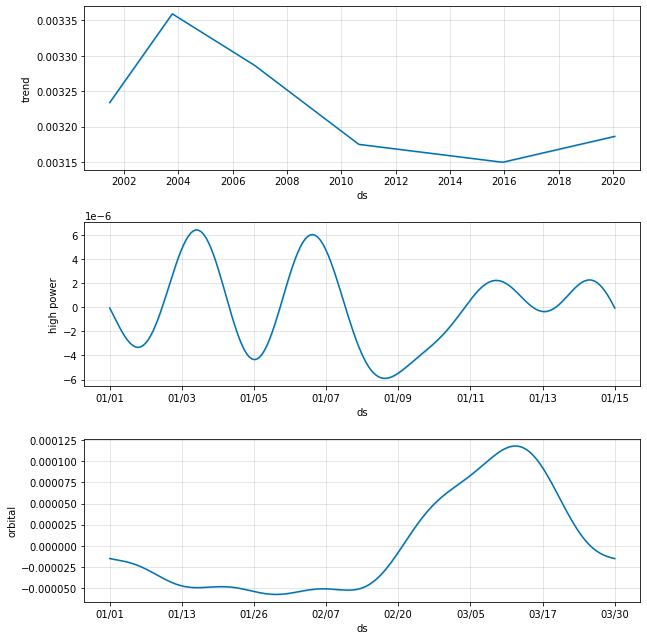

In [915]:
fig = m.plot_components(forecast)

In [893]:
1/14.06

0.07112375533428164

In [870]:
88.37/6

14.728333333333333

Source: SXP214 prophet model Period: 29.9


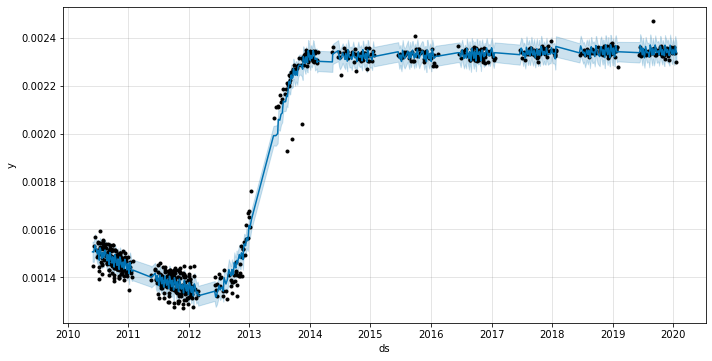

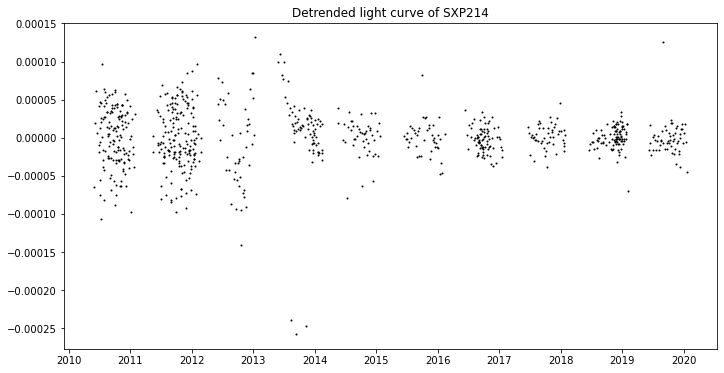

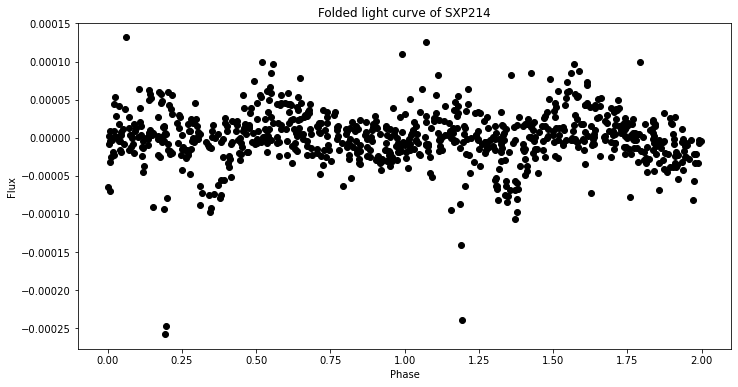

In [818]:
plt.rcParams['figure.figsize'] = (11.7, 6.0)
source = names_period.iloc[25,:]
    
if len(source["file"])>0:
    data = np.loadtxt(data_path+"ogle_merged/"+source["file"], delimiter=",", dtype=float)
    #     plt.plot([2455081.5,2455081.5], np.array([np.min(data[:,1]), np.max(data[:,1])])*-1, color="r")
    data_df = pd.DataFrame({"ds": data[:,0],"y": data[:,1]})

    data_df = pd.DataFrame({"ds": data[:,0],"y": data[:,1]})
    data_df["ds"] = pd.to_datetime(data_df["ds"], origin="julian", unit="D")
    data_df["y"] = float(2430)*10**(-1.0*data_df["y"]/2.5)

    # fit prophet model with orbital periodicity component
    m = Prophet(
        growth='linear',
        changepoints=None,
        n_changepoints=25,
        changepoint_range=0.99,
        yearly_seasonality=False,
        weekly_seasonality=False,
        daily_seasonality=False,
        holidays=None,
        seasonality_mode='additive',
        seasonality_prior_scale=10.0,
        holidays_prior_scale=10.0,
        changepoint_prior_scale=0.05,
        mcmc_samples=0,
        interval_width=0.8,
        uncertainty_samples=1000,
        stan_backend=None,
    ) #"07-09-2009"
    m.add_seasonality(name='orbital', period=source["P_orb (d)"], fourier_order=5)
    m.fit(data_df)

    forecast = m.predict(pd.DataFrame(data_df["ds"]))
    forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

    # plot data with prophet model
    print("Source: {}".format(source["Object"]) + " prophet model" + " Period: {}".format(source["P_orb (d)"]))
    fig1 = m.plot(forecast)
    fig = plt.gcf()
    fig.set_size_inches(10,5)
    plt.show()
    # plot data with trend subtracted
    detrended = data_df.copy(deep=True)
    detrended["y"] = data_df["y"].values-forecast['trend'].values
    plt.scatter(data_df["ds"].values,detrended["y"], s=1, c="black")
    plt.title("Detrended light curve of {}".format(source["Object"]))
    plt.show()

#         data_df["ds"] = pd.to_datetime(data_df["ds"], origin="julian", unit="D")
#         data_df["y"] = float(2430)*10**(-1.0*data[:,1]/2.5)
#         data_df["y"][data_df["ds"]<2455081.5] = data_df["y"][data_df["ds"]<2455081.5]- np.median(data_df["y"][data_df["ds"]<2455081.5])
#         data_df["y"][data_df["ds"]>2455081.5] = data_df["y"][data_df["ds"]>2455081.5]- np.median(data_df["y"][data_df["ds"]>2455081.5])

    # fold detrended lightcurve
    foldTimes=(data[:,0]-data[:,0][0])/source["P_orb (d)"]
    foldTimes=foldTimes%2
    plt.scatter(foldTimes, detrended["y"], color="black")
#     plt.axvline(2455081.5-data[:,0][0], color="r")
#         plt.gca().invert_yaxis()
    #     plt.ylim([10,20])
    plt.xlabel("Phase")
    plt.ylabel("Flux")
    plt.title("Folded light curve of {}".format(source["Object"]))
    # plt.ylim([-17,-13])
    plt.show()
#     break

#     foldTimes=time/period# divide by period to convert to phase
#     foldTimes=foldTimes%1# take fractional part of phase only (i.e. discard whole number part)

In [848]:
# Select the size for the newly generated timestamps (tau), it should be less than the length of the given data.
# This will also limit the minimum possible frequecny
ntau = 1000

# Set the low and high frequency bounds and steps to iterate 
frequency_low = 1/50
frequency_high = 1/2
frequency_steps = np.linspace(frequency_low, frequency_high, num=100)
frequency_steps = frequency_steps[1]-frequency_steps[0]

# Set the override to False (Setting to True will ignore the low and high frequency limitations)
override = False

# gather the frequency parameters into a list [freq_low, freq_high, freq_step, override]
frequency_parameters = [frequency_low, frequency_high, frequency_steps, override]

# We will then select the decay constant for our analyzing wavelet (should be < 0.2), where c = 1/(2*w^2) 
# The analyzing wavelet decays significantly in a single cycle 2*pi/w, where w = 2*pi*f
f = 0.5     # we choose 4 since our signal of interest is at 4 hz
w = 2 * np.pi * f
decay_constant = 1/(2*w**2)

# Finally, we select to wether to run with parallization (recommend True)
parallel = True

In [849]:
data_df = pd.DataFrame({"ds": data[:,0],"y": data[:,1]})
data_df["y"] = float(2430)*10**(-1.0*data_df["y"]/2.5)

# Using the above settings, we will now compute the WWZ/WWA for the full timeseries and removed timeseries
wwt_sxp89 = libwwz.wwt(timestamps=data_df["ds"].values,
                     magnitudes=detrended["y"].values,
                     time_divisions=ntau,
                     freq_params=frequency_parameters,
                     decay_constant=decay_constant,
                     method='linear',
                     parallel=parallel)

*** Starting Weighted Wavelet Z-transform ***

adjusted time_divisions to:  809
Pseudo sample frequency (median) is  0.499
largest tau window is  4.36
3.57 seconds has passed to complete Weighted Wavelet Z-transform 



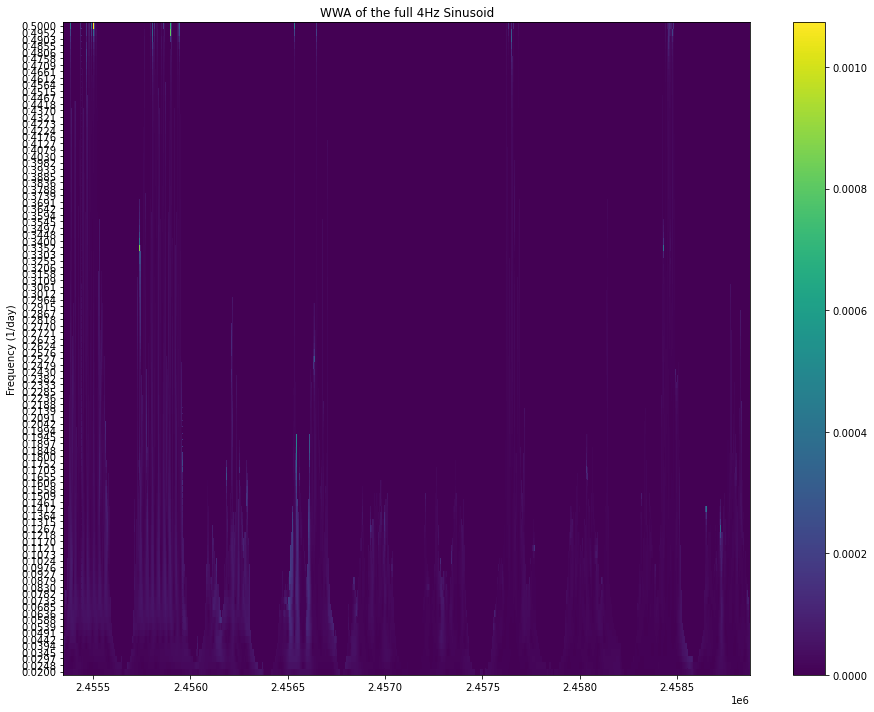

In [850]:
import libwwz.plot_methods as libplot

#1000 freq steps

# Next we will look at WWA for both full and removed data...
# WWA is better at discerning the amplitudes of the signal

fig, ax = plt.subplots(nrows=1, sharex=False, figsize=[13, 10])

libplot.linear_plotter(ax=ax,
                       TAU=wwt_sxp89[0],
                       FREQ=wwt_sxp89[1],
                       DATA=wwt_sxp89[3])
ax.set_ylabel('Frequency (1/day)')
ax.set_title('WWA of the full 4Hz Sinusoid')

plt.tight_layout()

In [826]:
1/29.9

0.033444816053511704

In [ ]:
timestamps=data_df["ds"].values,
                     magnitudes=detrended["y"].values,

In [731]:
source

Object              SXP31.0
P_orb (d)              90.5
P_orb (d) II              0
file            sxp31.0.csv
Name: 12, dtype: object

Source: SXP31.0 prophet model Period: 90.5


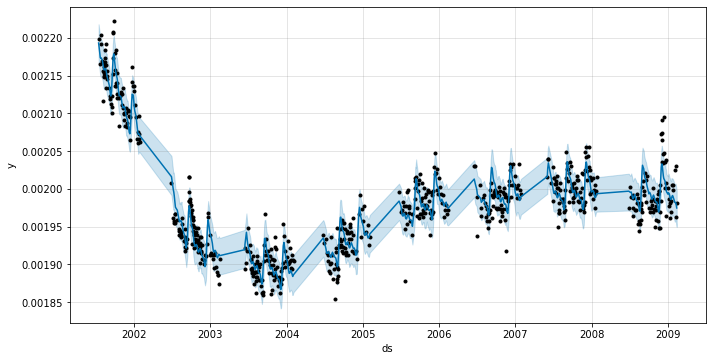

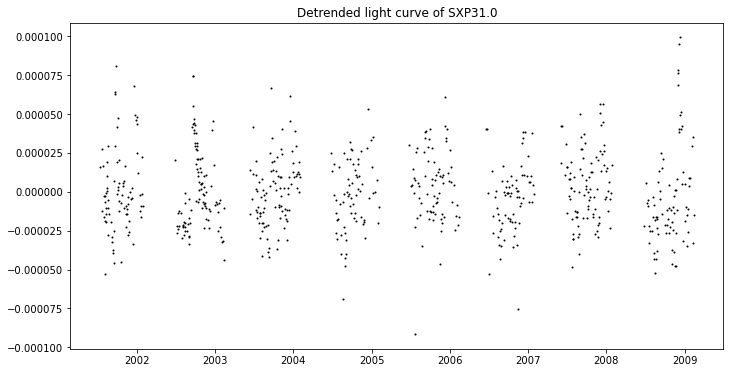

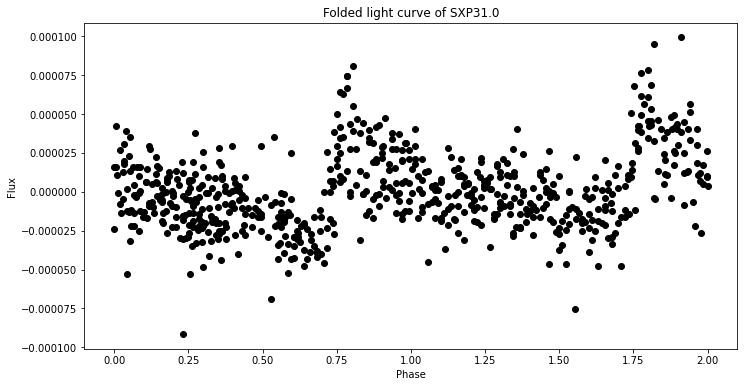

In [889]:
plt.rcParams['figure.figsize'] = (11.7, 6.0)
source = names_period.iloc[12,:]
    
if len(source["file"])>0:
    data = np.loadtxt(data_path+"ogle_merged/"+source["file"], delimiter=",", dtype=float)
    #     plt.plot([2455081.5,2455081.5], np.array([np.min(data[:,1]), np.max(data[:,1])])*-1, color="r")
    data_df = pd.DataFrame({"ds": data[:,0],"y": data[:,1]})

    data_df = pd.DataFrame({"ds": data[:,0],"y": data[:,1]})
    data_df["ds"] = pd.to_datetime(data_df["ds"], origin="julian", unit="D")
    data_df["y"] = float(2430)*10**(-1.0*data_df["y"]/2.5)

    # fit prophet model with orbital periodicity component
    m = Prophet(
        growth='linear',
        changepoints=None,
        n_changepoints=5,
        changepoint_range=0.99,
        yearly_seasonality=False,
        weekly_seasonality=False,
        daily_seasonality=False,
        holidays=None,
        seasonality_mode='additive',
        seasonality_prior_scale=10.0,
        holidays_prior_scale=10.0,
        changepoint_prior_scale=0.05,
        mcmc_samples=0,
        interval_width=0.8,
        uncertainty_samples=1000,
        stan_backend=None,
    ) #"07-09-2009"
    m.add_seasonality(name='orbital', period=source["P_orb (d)"], fourier_order=5)
    m.fit(data_df)

    forecast = m.predict(pd.DataFrame(data_df["ds"]))
    forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

    # plot data with prophet model
    print("Source: {}".format(source["Object"]) + " prophet model" + " Period: {}".format(source["P_orb (d)"]))
    fig1 = m.plot(forecast)
    fig = plt.gcf()
    fig.set_size_inches(10,5)
    plt.show()
    # plot data with trend subtracted
    detrended = data_df.copy(deep=True)
    detrended["y"] = data_df["y"].values-forecast['trend'].values
    plt.scatter(data_df["ds"].values,detrended["y"], s=1, c="black")
    plt.title("Detrended light curve of {}".format(source["Object"]))
    plt.show()

#         data_df["ds"] = pd.to_datetime(data_df["ds"], origin="julian", unit="D")
#         data_df["y"] = float(2430)*10**(-1.0*data[:,1]/2.5)
#         data_df["y"][data_df["ds"]<2455081.5] = data_df["y"][data_df["ds"]<2455081.5]- np.median(data_df["y"][data_df["ds"]<2455081.5])
#         data_df["y"][data_df["ds"]>2455081.5] = data_df["y"][data_df["ds"]>2455081.5]- np.median(data_df["y"][data_df["ds"]>2455081.5])

    # fold detrended lightcurve
    foldTimes=(data[:,0]-data[:,0][0])/source["P_orb (d)"]
    foldTimes=foldTimes%2
    plt.scatter(foldTimes, detrended["y"], color="black")
#     plt.axvline(2455081.5-data[:,0][0], color="r")
#         plt.gca().invert_yaxis()
    #     plt.ylim([10,20])
    plt.xlabel("Phase")
    plt.ylabel("Flux")
    plt.title("Folded light curve of {}".format(source["Object"]))
    # plt.ylim([-17,-13])
    plt.show()
#     break

#     foldTimes=time/period# divide by period to convert to phase
#     foldTimes=foldTimes%1# take fractional part of phase only (i.e. discard whole number part)

In [804]:
# Select the size for the newly generated timestamps (tau), it should be less than the length of the given data.
# This will also limit the minimum possible frequecny
ntau = 300

# Set the low and high frequency bounds and steps to iterate 
frequency_low = 1/200
frequency_high = 1/20
frequency_steps = np.linspace(frequency_low, frequency_high, num=100)
frequency_steps = frequency_steps[1]-frequency_steps[0]

# Set the override to False (Setting to True will ignore the low and high frequency limitations)
override = False

# gather the frequency parameters into a list [freq_low, freq_high, freq_step, override]
frequency_parameters = [frequency_low, frequency_high, frequency_steps, override]

# We will then select the decay constant for our analyzing wavelet (should be < 0.2), where c = 1/(2*w^2) 
# The analyzing wavelet decays significantly in a single cycle 2*pi/w, where w = 2*pi*f
f = 5     # we choose 4 since our signal of interest is at 4 hz
w = 2 * np.pi * f
decay_constant = 1/(2*w**2)

# Finally, we select to wether to run with parallization (recommend True)
parallel = True

In [805]:
data_df = pd.DataFrame({"ds": data[:,0],"y": data[:,1]})
data_df["y"] = float(2430)*10**(-1.0*data_df["y"]/2.5)

# Using the above settings, we will now compute the WWZ/WWA for the full timeseries and removed timeseries
wwt_sxp89 = libwwz.wwt(timestamps=data_df["ds"].values,
                     magnitudes=detrended["y"].values,
                     time_divisions=ntau,
                     freq_params=frequency_parameters,
                     decay_constant=decay_constant,
                     method='linear',
                     parallel=parallel)

*** Starting Weighted Wavelet Z-transform ***

Pseudo sample frequency (median) is  0.497
largest tau window is  9.26
43.55 seconds has passed to complete Weighted Wavelet Z-transform 



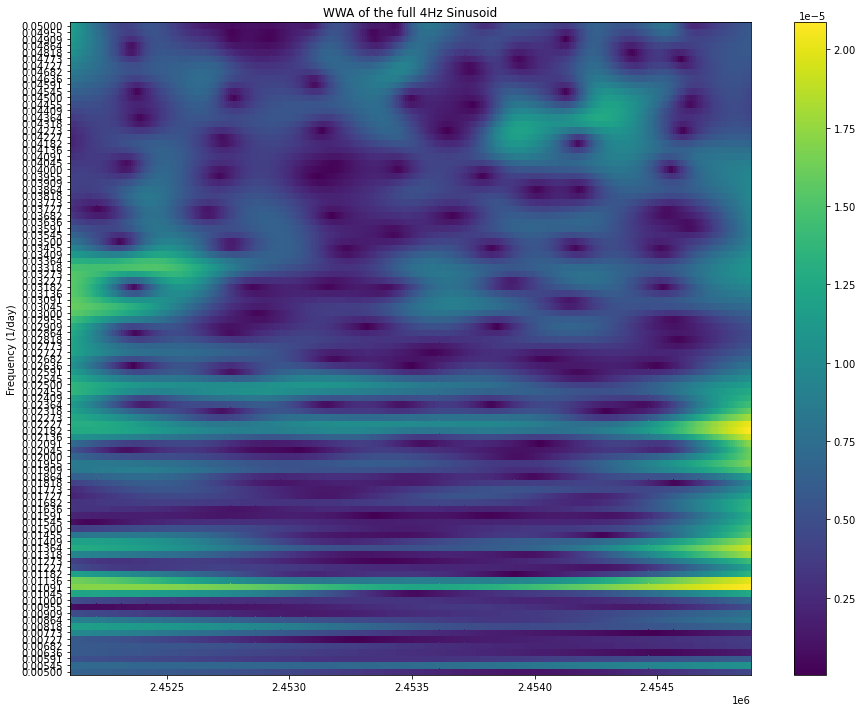

In [806]:
import libwwz.plot_methods as libplot

#1000 freq steps

# Next we will look at WWA for both full and removed data...
# WWA is better at discerning the amplitudes of the signal

fig, ax = plt.subplots(nrows=1, sharex=False, figsize=[13, 10])

libplot.linear_plotter(ax=ax,
                       TAU=wwt_sxp89[0],
                       FREQ=wwt_sxp89[1],
                       DATA=wwt_sxp89[3])
ax.set_ylabel('Frequency (1/day)')
ax.set_title('WWA of the full 4Hz Sinusoid')

plt.tight_layout()

In [892]:
1/90.5

0.011049723756906077

In [890]:
data_df = pd.DataFrame({"ds": data[:,0],"y": data[:,1]})
data_df["y"] = float(2430)*10**(-1.0*data_df["y"]/2.5)


f = np.linspace(1/400, 1/2, 100000)

import scipy.signal as signal
pgram = signal.lombscargle(data_df["ds"].values, detrended["y"].values, f, normalize=True)



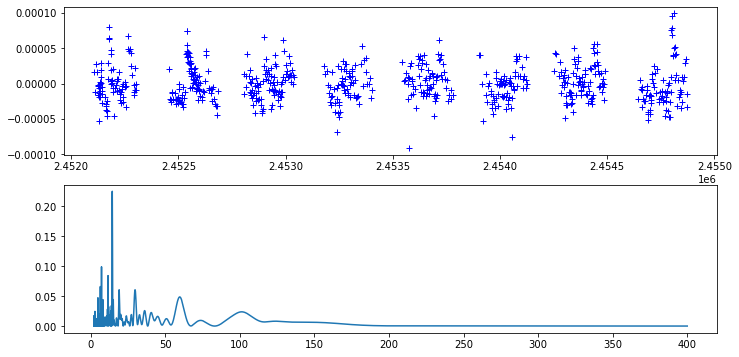

In [891]:
plt.subplot(2, 1, 1)
plt.plot(data_df["ds"].values, detrended["y"].values, 'b+')

plt.subplot(2, 1, 2)
plt.plot(1/f, pgram)
plt.show()



In [854]:
1/90.5

0.011049723756906077

Source: SXP65.8 prophet model Period: 110.6


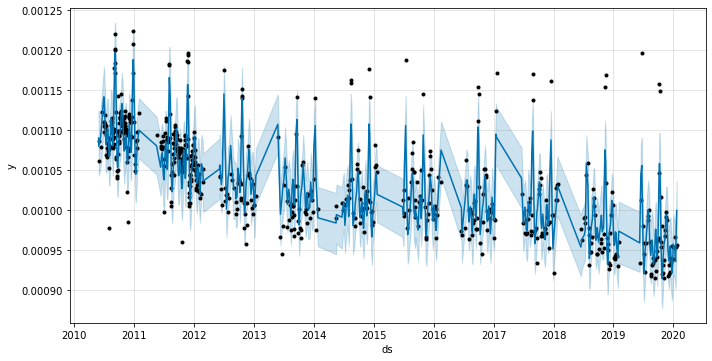

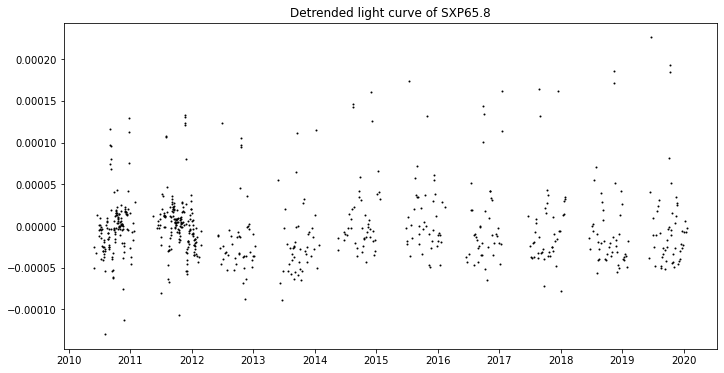

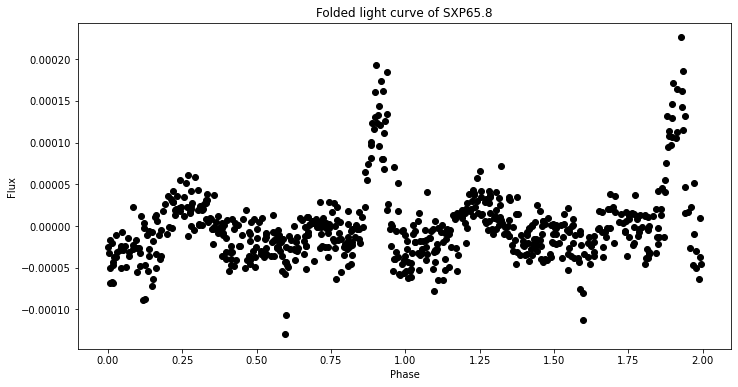

In [807]:
plt.rcParams['figure.figsize'] = (11.7, 6.0)
source = names_period.iloc[15,:]
    
if len(source["file"])>0:
    data = np.loadtxt(data_path+"ogle_merged/"+source["file"], delimiter=",", dtype=float)
    #     plt.plot([2455081.5,2455081.5], np.array([np.min(data[:,1]), np.max(data[:,1])])*-1, color="r")
    data_df = pd.DataFrame({"ds": data[:,0],"y": data[:,1]})

    data_df = pd.DataFrame({"ds": data[:,0],"y": data[:,1]})
    data_df["ds"] = pd.to_datetime(data_df["ds"], origin="julian", unit="D")
    data_df["y"] = float(2430)*10**(-1.0*data_df["y"]/2.5)

    # fit prophet model with orbital periodicity component
    m = Prophet(
        growth='linear',
        changepoints=None,
        n_changepoints=5,
        changepoint_range=0.99,
        yearly_seasonality=False,
        weekly_seasonality=False,
        daily_seasonality=False,
        holidays=None,
        seasonality_mode='additive',
        seasonality_prior_scale=10.0,
        holidays_prior_scale=10.0,
        changepoint_prior_scale=0.05,
        mcmc_samples=0,
        interval_width=0.8,
        uncertainty_samples=1000,
        stan_backend=None,
    ) #"07-09-2009"
    m.add_seasonality(name='orbital', period=source["P_orb (d)"], fourier_order=5)
    m.fit(data_df)

    forecast = m.predict(pd.DataFrame(data_df["ds"]))
    forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

    # plot data with prophet model
    print("Source: {}".format(source["Object"]) + " prophet model" + " Period: {}".format(source["P_orb (d)"]))
    fig1 = m.plot(forecast)
    fig = plt.gcf()
    fig.set_size_inches(10,5)
    plt.show()
    # plot data with trend subtracted
    detrended = data_df.copy(deep=True)
    detrended["y"] = data_df["y"].values-forecast['trend'].values
    plt.scatter(data_df["ds"].values,detrended["y"], s=1, c="black")
    plt.title("Detrended light curve of {}".format(source["Object"]))
    plt.show()

#         data_df["ds"] = pd.to_datetime(data_df["ds"], origin="julian", unit="D")
#         data_df["y"] = float(2430)*10**(-1.0*data[:,1]/2.5)
#         data_df["y"][data_df["ds"]<2455081.5] = data_df["y"][data_df["ds"]<2455081.5]- np.median(data_df["y"][data_df["ds"]<2455081.5])
#         data_df["y"][data_df["ds"]>2455081.5] = data_df["y"][data_df["ds"]>2455081.5]- np.median(data_df["y"][data_df["ds"]>2455081.5])

    # fold detrended lightcurve
    foldTimes=(data[:,0]-data[:,0][0])/source["P_orb (d)"]
    foldTimes=foldTimes%2
    plt.scatter(foldTimes, detrended["y"], color="black")
#     plt.axvline(2455081.5-data[:,0][0], color="r")
#         plt.gca().invert_yaxis()
    #     plt.ylim([10,20])
    plt.xlabel("Phase")
    plt.ylabel("Flux")
    plt.title("Folded light curve of {}".format(source["Object"]))
    # plt.ylim([-17,-13])
    plt.show()
#     break

#     foldTimes=time/period# divide by period to convert to phase
#     foldTimes=foldTimes%1# take fractional part of phase only (i.e. discard whole number part)

In [799]:
# Select the size for the newly generated timestamps (tau), it should be less than the length of the given data.
# This will also limit the minimum possible frequecny
ntau = 300

# Set the low and high frequency bounds and steps to iterate 
frequency_low = 1/200
frequency_high = 1/20
frequency_steps = np.linspace(frequency_low, frequency_high, num=100)
frequency_steps = frequency_steps[1]-frequency_steps[0]

# Set the override to False (Setting to True will ignore the low and high frequency limitations)
override = False

# gather the frequency parameters into a list [freq_low, freq_high, freq_step, override]
frequency_parameters = [frequency_low, frequency_high, frequency_steps, override]

# We will then select the decay constant for our analyzing wavelet (should be < 0.2), where c = 1/(2*w^2) 
# The analyzing wavelet decays significantly in a single cycle 2*pi/w, where w = 2*pi*f
f = 5     # we choose 4 since our signal of interest is at 4 hz
w = 2 * np.pi * f
decay_constant = 1/(2*w**2)

# Finally, we select to wether to run with parallization (recommend True)
parallel = True

In [800]:
data_df = pd.DataFrame({"ds": data[:,0],"y": data[:,1]})
data_df["y"] = float(2430)*10**(-1.0*data_df["y"]/2.5)

# Using the above settings, we will now compute the WWZ/WWA for the full timeseries and removed timeseries
wwt_sxp89 = libwwz.wwt(timestamps=data_df["ds"].values,
                     magnitudes=detrended["y"].values,
                     time_divisions=ntau,
                     freq_params=frequency_parameters,
                     decay_constant=decay_constant,
                     method='linear',
                     parallel=parallel)

*** Starting Weighted Wavelet Z-transform ***

Pseudo sample frequency (median) is  0.334
largest tau window is  11.781
36.74 seconds has passed to complete Weighted Wavelet Z-transform 



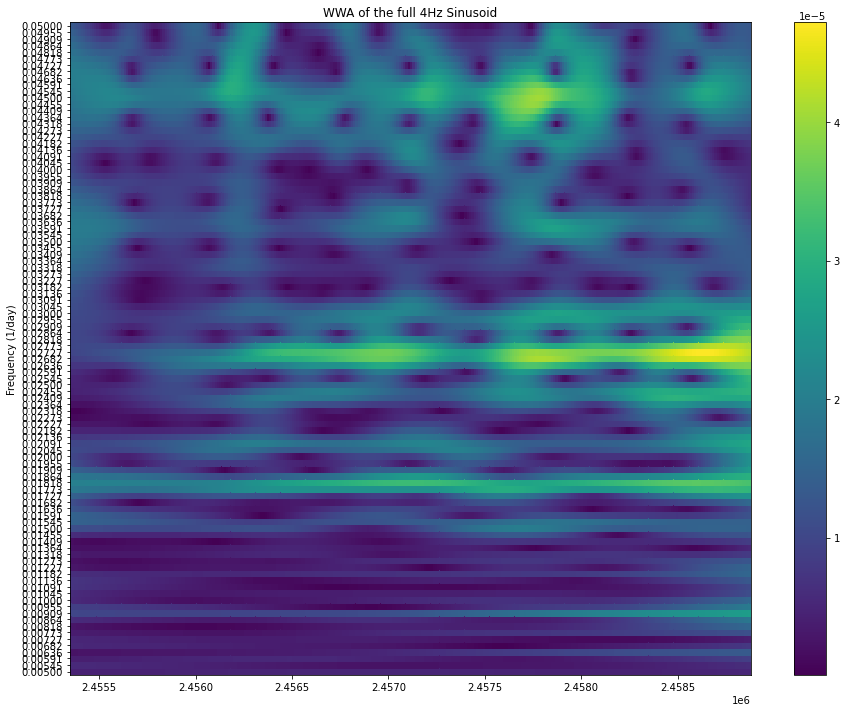

In [801]:
import libwwz.plot_methods as libplot

#1000 freq steps

# Next we will look at WWA for both full and removed data...
# WWA is better at discerning the amplitudes of the signal

fig, ax = plt.subplots(nrows=1, sharex=False, figsize=[13, 10])

libplot.linear_plotter(ax=ax,
                       TAU=wwt_sxp89[0],
                       FREQ=wwt_sxp89[1],
                       DATA=wwt_sxp89[3])
ax.set_ylabel('Frequency (1/day)')
ax.set_title('WWA of the full 4Hz Sinusoid')

plt.tight_layout()

In [798]:
1/0.04545

110.01100110011002

In [785]:
source

Object              SXP65.8
P_orb (d)             110.6
P_orb (d) II              0
file            sxp65.8.csv
Name: 15, dtype: object

Source: SXP293 prophet model Period: 59.726000000000006


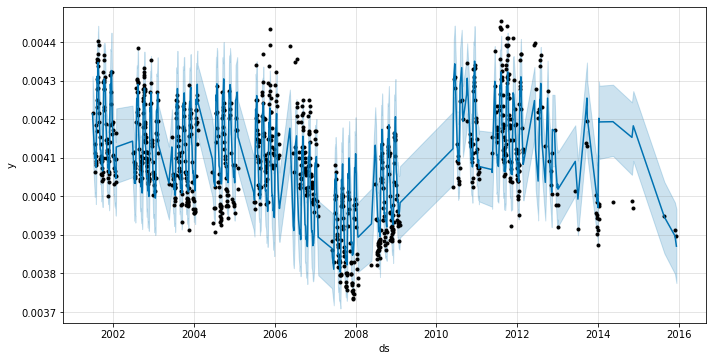

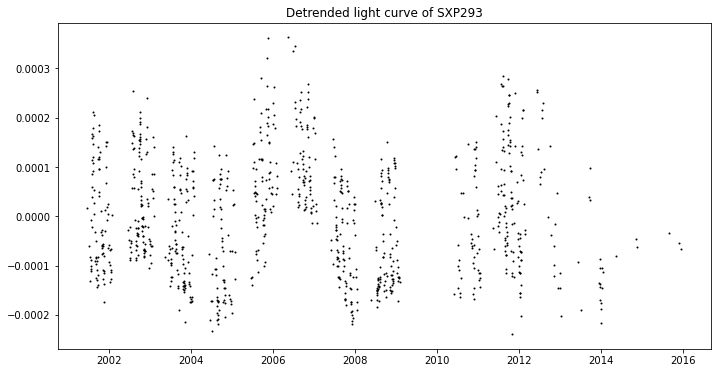

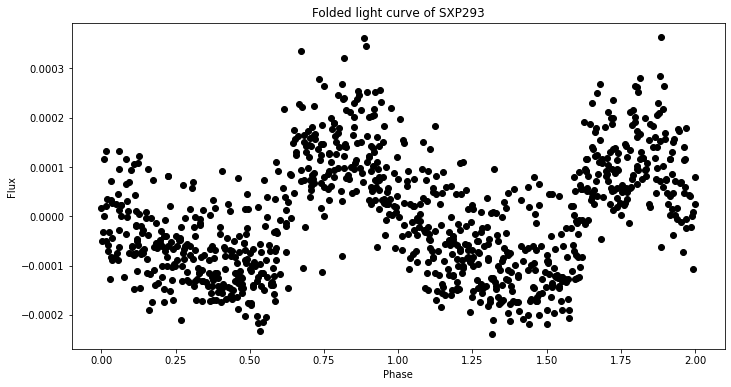

In [855]:
plt.rcParams['figure.figsize'] = (11.7, 6.0)
source = names_period.iloc[28,:]
    
if len(source["file"])>0:
    data = np.loadtxt(data_path+"ogle_merged/"+source["file"], delimiter=",", dtype=float)
    #     plt.plot([2455081.5,2455081.5], np.array([np.min(data[:,1]), np.max(data[:,1])])*-1, color="r")
    data_df = pd.DataFrame({"ds": data[:,0],"y": data[:,1]})

    data_df = pd.DataFrame({"ds": data[:,0],"y": data[:,1]})
    data_df["ds"] = pd.to_datetime(data_df["ds"], origin="julian", unit="D")
    data_df["y"] = float(2430)*10**(-1.0*data_df["y"]/2.5)

    # fit prophet model with orbital periodicity component
    m = Prophet(
        growth='linear',
        changepoints=None,
        n_changepoints=5,
        changepoint_range=0.99,
        yearly_seasonality=False,
        weekly_seasonality=False,
        daily_seasonality=False,
        holidays=None,
        seasonality_mode='additive',
        seasonality_prior_scale=10.0,
        holidays_prior_scale=10.0,
        changepoint_prior_scale=0.05,
        mcmc_samples=0,
        interval_width=0.8,
        uncertainty_samples=1000,
        stan_backend=None,
    ) #"07-09-2009"
    m.add_seasonality(name='orbital', period=source["P_orb (d)"], fourier_order=5)
    m.fit(data_df)

    forecast = m.predict(pd.DataFrame(data_df["ds"]))
    forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

    # plot data with prophet model
    print("Source: {}".format(source["Object"]) + " prophet model" + " Period: {}".format(source["P_orb (d)"]))
    fig1 = m.plot(forecast)
    fig = plt.gcf()
    fig.set_size_inches(10,5)
    plt.show()
    # plot data with trend subtracted
    detrended = data_df.copy(deep=True)
    detrended["y"] = data_df["y"].values-forecast['trend'].values
    plt.scatter(data_df["ds"].values,detrended["y"], s=1, c="black")
    plt.title("Detrended light curve of {}".format(source["Object"]))
    plt.show()

#         data_df["ds"] = pd.to_datetime(data_df["ds"], origin="julian", unit="D")
#         data_df["y"] = float(2430)*10**(-1.0*data[:,1]/2.5)
#         data_df["y"][data_df["ds"]<2455081.5] = data_df["y"][data_df["ds"]<2455081.5]- np.median(data_df["y"][data_df["ds"]<2455081.5])
#         data_df["y"][data_df["ds"]>2455081.5] = data_df["y"][data_df["ds"]>2455081.5]- np.median(data_df["y"][data_df["ds"]>2455081.5])

    # fold detrended lightcurve
    foldTimes=(data[:,0]-data[:,0][0])/source["P_orb (d)"]
    foldTimes=foldTimes%2
    plt.scatter(foldTimes, detrended["y"], color="black")
#     plt.axvline(2455081.5-data[:,0][0], color="r")
#         plt.gca().invert_yaxis()
    #     plt.ylim([10,20])
    plt.xlabel("Phase")
    plt.ylabel("Flux")
    plt.title("Folded light curve of {}".format(source["Object"]))
    # plt.ylim([-17,-13])
    plt.show()
#     break

#     foldTimes=time/period# divide by period to convert to phase
#     foldTimes=foldTimes%1# take fractional part of phase only (i.e. discard whole number part)

In [770]:
# Select the size for the newly generated timestamps (tau), it should be less than the length of the given data.
# This will also limit the minimum possible frequecny
ntau = 600

# Set the low and high frequency bounds and steps to iterate 
frequency_low = 1/200
frequency_high = 1/20
frequency_steps = np.linspace(frequency_low, frequency_high, num=100)
frequency_steps = frequency_steps[1]-frequency_steps[0]

# Set the override to False (Setting to True will ignore the low and high frequency limitations)
override = False

# gather the frequency parameters into a list [freq_low, freq_high, freq_step, override]
frequency_parameters = [frequency_low, frequency_high, frequency_steps, override]

# We will then select the decay constant for our analyzing wavelet (should be < 0.2), where c = 1/(2*w^2) 
# The analyzing wavelet decays significantly in a single cycle 2*pi/w, where w = 2*pi*f
f = 5     # we choose 4 since our signal of interest is at 4 hz
w = 2 * np.pi * f
decay_constant = 1/(2*w**2)

# Finally, we select to wether to run with parallization (recommend True)
parallel = True

In [772]:
data_df = pd.DataFrame({"ds": data[:,0],"y": data[:,1]})
data_df["y"] = float(2430)*10**(-1.0*data_df["y"]/2.5)

# Using the above settings, we will now compute the WWZ/WWA for the full timeseries and removed timeseries
wwt_sxp89 = libwwz.wwt(timestamps=data_df["ds"].values,
                     magnitudes=detrended["y"].values,
                     time_divisions=ntau,
                     freq_params=frequency_parameters,
                     decay_constant=decay_constant,
                     method='linear',
                     parallel=parallel)

*** Starting Weighted Wavelet Z-transform ***

Pseudo sample frequency (median) is  0.499
largest tau window is  8.816
86.39 seconds has passed to complete Weighted Wavelet Z-transform 



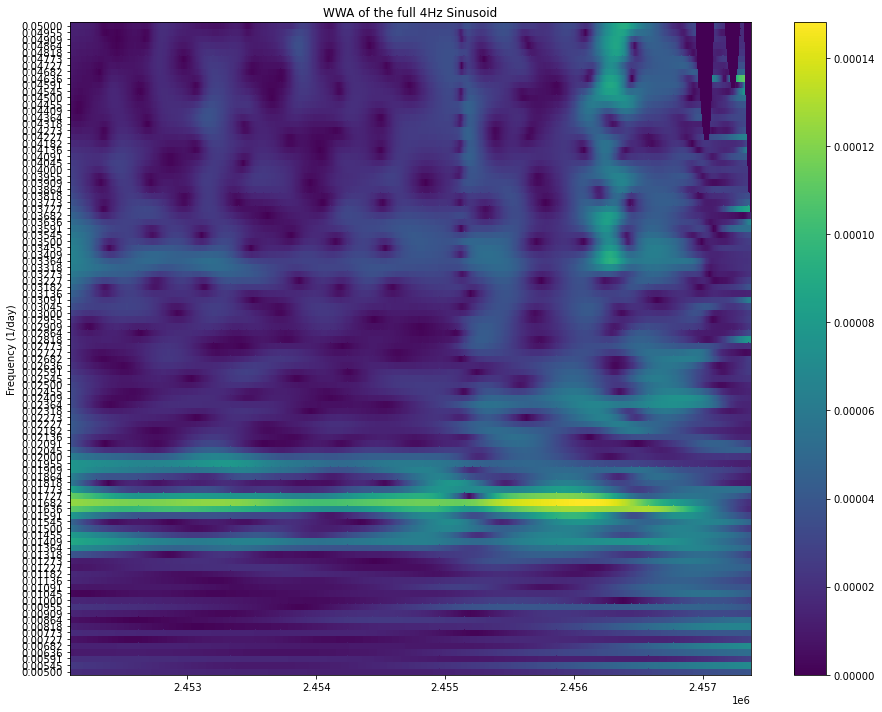

In [773]:
import libwwz.plot_methods as libplot

#1000 freq steps

# Next we will look at WWA for both full and removed data...
# WWA is better at discerning the amplitudes of the signal

fig, ax = plt.subplots(nrows=1, sharex=False, figsize=[13, 10])

libplot.linear_plotter(ax=ax,
                       TAU=wwt_sxp89[0],
                       FREQ=wwt_sxp89[1],
                       DATA=wwt_sxp89[3])
ax.set_ylabel('Frequency (1/day)')
ax.set_title('WWA of the full 4Hz Sinusoid')

plt.tight_layout()

In [858]:
1/59.7

0.01675041876046901

In [856]:
f = np.linspace(1/400, 1/2, 100000)

import scipy.signal as signal
pgram = signal.lombscargle(data_df["ds"].values, detrended["y"].values, f, normalize=True)



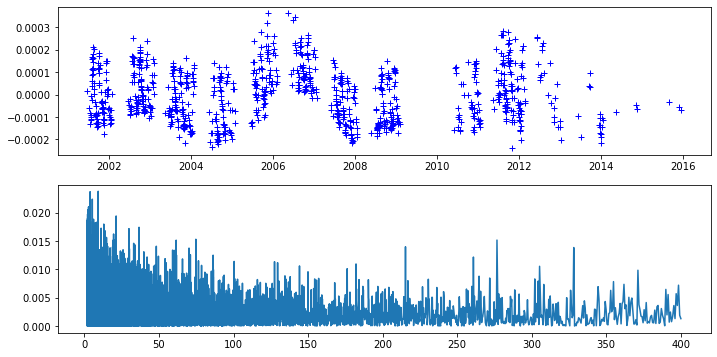

In [857]:
plt.subplot(2, 1, 1)
plt.plot(data_df["ds"].values, detrended["y"].values, 'b+')

plt.subplot(2, 1, 2)
plt.plot(1/f, pgram)
plt.show()



In [769]:
1/0.01409

70.97232079489

In [776]:
0.01682*2

0.03364

In [742]:
1/f[np.argsort(pgram)[-10:]]

TypeError: 'float' object is not subscriptable

In [705]:
88.37/14.06253955

6.284071215287711

In [674]:
1/f[np.argmax(pgram)]

14.023020774845593

In [708]:
names_period

Object  P_orb (d) P_orb (d) II         file
0        SXP2.37     18.600            0  sxp2.37.csv
1        SXP2.76     82.400            0             
2        SXP3.34     10.720            0  sxp3.34.csv
3        SXP5.05     17.200            0             
4        SXP6.85     21.900            0  sxp6.85.csv
5        SXP7.78     44.900            0  sxp7.78.csv
6   SXP8.80-8.88     28.500            0  sxp8.80.csv
7        SXP9.13     77.200            0  sxp9.13.csv
8        SXP11.5     36.300            0  sxp11.5.csv
9        SXP15.3     74.300            0  sxp15.3.csv
10       SXP22.1     75.970            0             
11       SXP25.5     22.500            0  sxp25.5.csv
12       SXP31.0     90.500            0  sxp31.0.csv
13       SXP46.6    137.360     (143.29)  sxp46.6.csv
14       SXP59.0     62.150            0  sxp59.0.csv
15       SXP65.8    110.600            0  sxp65.8.csv
16       SXP74.7     33.400            0  sxp74.7.csv
17       SXP82.4    362.300            0  sxp82.4.csv
18  SXP89.0&91.1     88.370         88.4  sxp91.1.csv
19        SXP138    125.100            0   sxp138.csv
20        SXP140    197.000            0   sxp140.csv
21        SXP153    100.300            0             
22        SXP169     68.600            0             
23        SXP172     67.900            0   sxp172.csv
24       SXP202A     71.900            0             
25        SXP214     29.900            0   sxp214.csv
26        SXP264     49.200            0   sxp264.csv
27        SXP280    127.500            0             
28        SXP293     59.726      (59.62)   sxp293.csv
29        SXP323    116.600            0   sxp323.csv
30        SXP343     94.400            0             
31        SXP455     75.000            0   sxp455.csv
32        SXP504    272.000            0   sxp504.csv
33        SXP565    152.400            0   sxp565.csv
34        SXP701    412.000            0   sxp701.csv
35        SXP756    393.100          390   sxp756.csv
36        SXP967    101.900            0   sxp967.csv
37       SXP1062    668.000        (656)  sxp1062.csv
38       SXP1323     26.188            0  sxp1323.csv

In [577]:
names_period.iloc[18,:]

Object          SXP89.0&91.1
P_orb (d)              88.37
P_orb (d) II            88.4
file             sxp91.1.csv
Name: 18, dtype: object